In [102]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.family']='Malgun Gothic'

In [104]:
os.chdir('./data/test')
os.getcwd()

'C:\\Users\\samsung\\Desktop\\ml_team\\data\\test'

In [105]:
os.listdir()

['2030여성',
 '2030여성.zip',
 'ALL_chol',
 'cho_test_결과있는사람',
 'cluster_result.csv',
 'cluster_result_not_cholesterol.csv',
 'data.CSV',
 'data2021.CSV',
 'data2022.CSV',
 'df_ord_gpt.csv',
 'df_ord_KPrototypes.csv',
 'kmeans_2030female_pipeline.pkl',
 'my_model.pkl',
 'new_new_cluster_pipeline4.pkl',
 'new_new_cluster_pipeline5.pkl',
 'new_new_new_콜레스테롤_결과있는사람2.pkl',
 'new_new_new_콜레스테롤_결과있는사람3.pkl',
 'new_콜레스테롤_결과있는사람.pkl',
 'not_chol_model.pkl',
 'real_chol_model.pkl',
 'real_cluster.csv',
 'X.csv',
 '국민건강보험공단_건강검진정보 사용자 매뉴얼_2023.hwpx',
 '생활패턴유형_소비지표.xlsx',
 '이상지질검사미수검자건강군집해석.csv',
 '이상지질검사미수검자군집분석_last.csv',
 '이상지질검사수검자군집결과마지막결과.csv',
 '지질검사대상인데기록없는사람',
 '콜레스테롤검사한사람.csv',
 '콜레스테롤측정안한데이터.csv',
 '콜레스테롤측정안한사람.csv',
 '클러스터링_모델_dict.pkl',
 '클러스터링_파이프라인.pkl']

# 이상지질혈증 대상군(검사기록X)

In [106]:
df = pd.read_csv( '이상지질검사미수검자군집분석_last.csv',)
df.columns

Index(['Unnamed: 0', '성별', '연령대', '키', '체중', '허리둘레', '수축기혈압', '이완기혈압', '공복혈당',
       '혈색소', '요단백', '혈청크레아티닌', '혈청지오티(AST)', '혈청지피티(ALT)', '감마지티피', '흡연상태',
       '음주여부', 'BMI', 'BMI구분', '사구체여과율', '신장질환군', '간질환군', '고혈압군', '빈혈군', '당뇨군',
       'cluster'],
      dtype='object')

In [125]:
df['연령대']

0         60대이상
1           50대
2           30대
3           20대
4         60대이상
          ...  
527677      40대
527678      20대
527679      30대
527680      50대
527681      50대
Name: 연령대, Length: 527682, dtype: category
Categories (5, object): ['20대', '30대', '40대', '50대', '60대이상']

In [107]:
연령대_중앙값 = {
    1: 2, 2: 7, 3: 12, 4: 17, 5: 22,
    6: 27, 7: 32, 8: 37, 9: 42,
    10: 47, 11: 52, 12: 57, 13: 62,
    14: 67, 15: 72, 16: 77, 17: 82, 18: 87
}


def 사구체여과율(row):
    creatinine = row['혈청크레아티닌']
    group_code = row['연령대']

    # 연령대 매핑 확인
    if group_code not in 연령대_중앙값:
        return np.nan  # 알 수 없는 연령대면 NaN

    age = 연령대_중앙값[group_code]
    sex_factor = 0.742 if row['성별'] == 1 else 1  # 여성=1, 남성=0

    # MDRD 공식 계산
    egfr = 186 * (creatinine ** -1.154) * (age ** -0.203) * sex_factor
    return egfr

df['사구체여과율']= df.apply(사구체여과율, axis=1)

In [108]:
df.columns

Index(['Unnamed: 0', '성별', '연령대', '키', '체중', '허리둘레', '수축기혈압', '이완기혈압', '공복혈당',
       '혈색소', '요단백', '혈청크레아티닌', '혈청지오티(AST)', '혈청지피티(ALT)', '감마지티피', '흡연상태',
       '음주여부', 'BMI', 'BMI구분', '사구체여과율', '신장질환군', '간질환군', '고혈압군', '빈혈군', '당뇨군',
       'cluster'],
      dtype='object')

In [109]:
df=df[['성별', '연령대', '키', '체중', '허리둘레', '수축기혈압', '이완기혈압', '공복혈당',
       '혈색소', '요단백', '혈청크레아티닌', '혈청지오티(AST)', '혈청지피티(ALT)', '감마지티피', '흡연상태',
       '음주여부', 'BMI', 'BMI구분', '사구체여과율', '신장질환군', '간질환군', '고혈압군', '빈혈군', '당뇨군',
       'cluster']]

In [110]:
df.head(2)

성별    연령대    키  체중  허리둘레  수축기혈압  이완기혈압   공복혈당   혈색소  요단백  ...  음주여부  \
0   0  60대이상  160  55  86.0  123.0   52.0   87.0  15.5  1.0  ...   1.0   
1   0    50대  165  65  84.5  137.0   86.0  105.0  14.9  1.0  ...   1.0   

         BMI  BMI구분  사구체여과율        신장질환군  간질환군     고혈압군  빈혈군        당뇨군  \
0  21.484375      2     NaN  신장기능이 더욱 감소     0  고혈압 전단계    0       정상혈당   
1  23.875115      3     NaN           정상     0  고혈압 전단계    0  공복혈당장애 의심   

  cluster  
0       0  
1       1  

[2 rows x 25 columns]

In [111]:
def 신장질환판단(row):
    gap = row['사구체여과율']
    if gap>=90: return '정상'
    elif gap>=60: return '신장기능 감소 시작'
    elif gap>=30: return '신장기능이 더욱 감소' 
    elif gap>=15: return '생명만 유지할 수준' 
    else : return '신장 이식 필요'
df['신장질환군']=df.apply(신장질환판단, axis=1)

def 간질환판단(row):
    ast = row['혈청지오티(AST)']
    alt = row['혈청지피티(ALT)']
    gtp = row['감마지티피']

    # 간 효소 중 1개라도 정상 범위 초과 시 간기능 이상 의심
    if ast >= 40 or alt >= 40 or gtp > (63 if row['성별'] == 0 else 35):
        return 1  # 이상
    else:
        return 0  # 정상
        
df['간질환군']=df.apply(간질환판단, axis=1)

def 혈압판단(row):
    수축기 = row['수축기혈압']
    이완기 = row['이완기혈압']

    if 수축기 >= 140 or 이완기 >= 90:
        return '고혈압 의심'
    elif 수축기 >= 120 or 이완기 >= 80:
        return '고혈압 전단계'
    else:
        return '정상 혈압'

df['고혈압군'] = df.apply(혈압판단, axis=1)

def 빈혈판단(row):
    hb = row['혈색소']
    gender = row['성별']

    if gender == 0:
        return 0 if 16.5>=hb >= 13 else 1
    elif gender == 1:
        return 0 if 15.5>=hb >= 12 else 1
    else:
        return '성별 오류'
df['빈혈군'] = df.apply(빈혈판단, axis=1)

def 당뇨판단(row):
    혈당 = row['공복혈당']
    if 혈당>=126: return '당뇨병 의심'
    if 혈당 >= 100: return '공복혈당장애 의심'
    else : return '정상혈당'

df['당뇨군'] = df.apply(당뇨판단, axis=1)

In [112]:
df['성별'] = df['성별'].map({0: '남성', 1: '여성'})
df['성별연령대'] = df['성별'].astype(str) + "_" + df['연령대'].astype(str)

In [113]:
two=[]
two_up=[]
cont_col=[]
for col in df.columns:
    if df[col].nunique()==2: two.append(col)
    if df[col].nunique()<20: print(col,df[col].unique()); two_up.append(col)
    else: cont_col.append(col)

성별 ['남성' '여성']
연령대 ['60대이상' '50대' '30대' '20대' '40대']
키 [160 165 180 170 175 150 155 145 185 140 190 135 130 195]
요단백 [1. 5. 2. 3. 4. 6.]
흡연상태 [1. 3. 2.]
음주여부 [1. 0.]
BMI구분 [2 3 4 5 1 6]
사구체여과율 [nan]
신장질환군 ['신장 이식 필요']
간질환군 [0 1]
고혈압군 ['고혈압 전단계' '정상 혈압' '고혈압 의심']
빈혈군 [0 1]
당뇨군 ['정상혈당' '공복혈당장애 의심' '당뇨병 의심']
cluster [0 1]
성별연령대 ['남성_60대이상' '남성_50대' '남성_30대' '남성_20대' '남성_40대' '여성_60대이상' '여성_40대'
 '여성_50대']


In [114]:
df['흡연상태']= df['흡연상태'].map({1.0:'비흡연', 2.0:'과거에흡연', 3.0:'흡연'})

In [115]:
cont_col=['허리둘레', '수축기혈압', '이완기혈압', '공복혈당', '혈색소', '혈청크레아티닌', '혈청지오티(AST)', '혈청지피티(ALT)', '감마지티피', 'BMI', '사구체여과율']
cat_col = set(df.columns)-set(cont_col)
cat_col=list(cat_col)
for col in cat_col:
    df[col]= pd.Categorical(df[col])

from IPython.display import display

for col in cat_col:
    print(f"\n[ {col} vs 성별연령대 교차비율 (%)]")
    ctab = pd.crosstab(index=df[col], columns=df['성별연령대'], normalize='columns') * 100
    styled = ctab.style.background_gradient(axis=0, cmap='Blues').format("{:.1f}%")
    display(styled)


[ cluster vs 성별연령대 교차비율 (%)]



[ 성별 vs 성별연령대 교차비율 (%)]



[ 체중 vs 성별연령대 교차비율 (%)]



[ 키 vs 성별연령대 교차비율 (%)]



[ 당뇨군 vs 성별연령대 교차비율 (%)]



[ 간질환군 vs 성별연령대 교차비율 (%)]



[ BMI구분 vs 성별연령대 교차비율 (%)]



[ 신장질환군 vs 성별연령대 교차비율 (%)]



[ 흡연상태 vs 성별연령대 교차비율 (%)]



[ 연령대 vs 성별연령대 교차비율 (%)]



[ 빈혈군 vs 성별연령대 교차비율 (%)]



[ 성별연령대 vs 성별연령대 교차비율 (%)]



[ 고혈압군 vs 성별연령대 교차비율 (%)]



[ 음주여부 vs 성별연령대 교차비율 (%)]



[ 요단백 vs 성별연령대 교차비율 (%)]


cluster


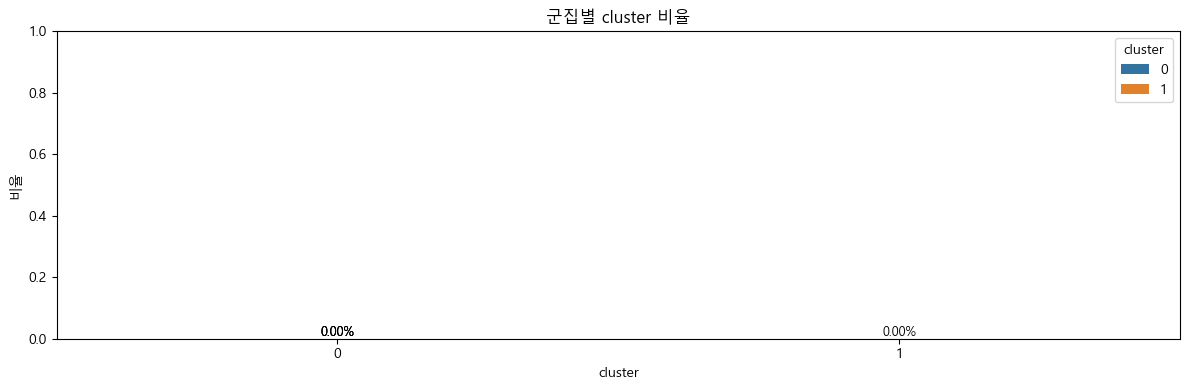

성별


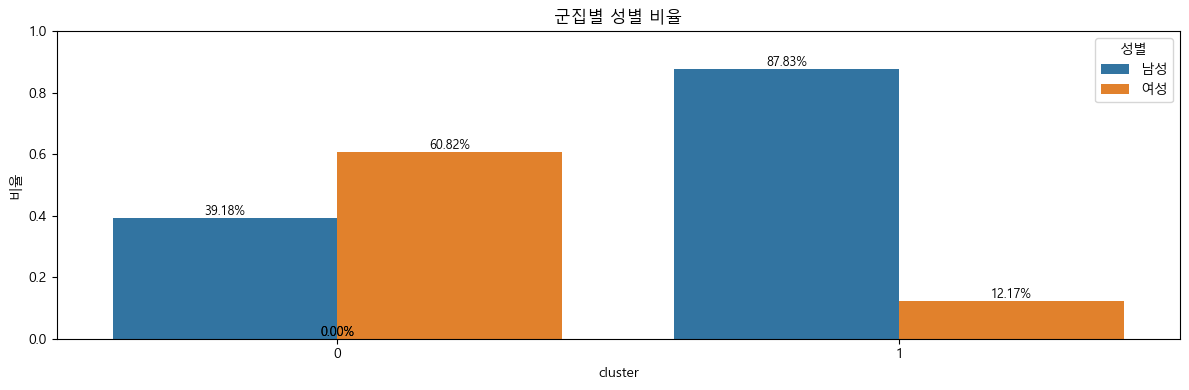

체중


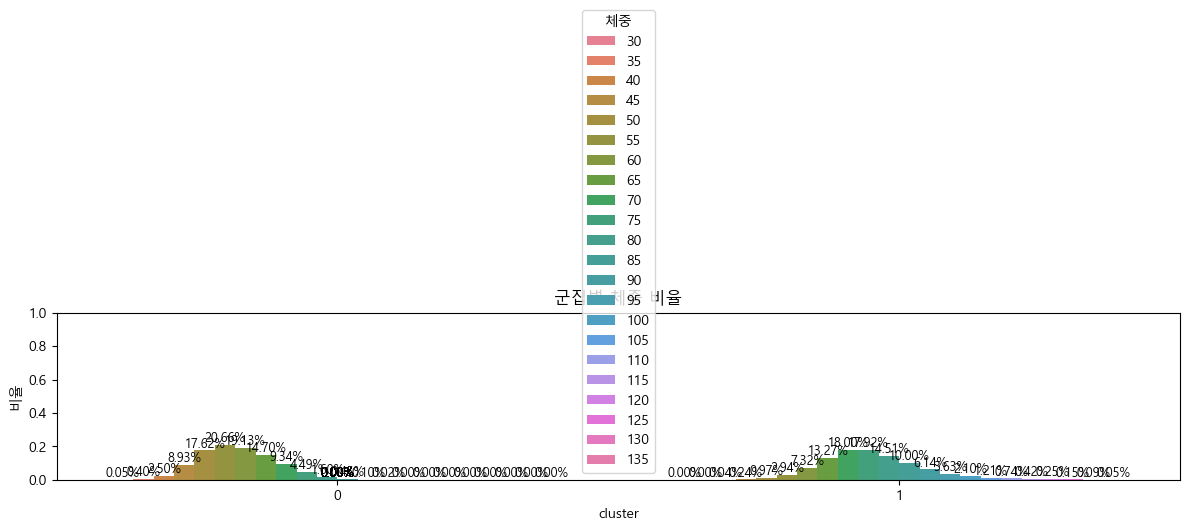

키


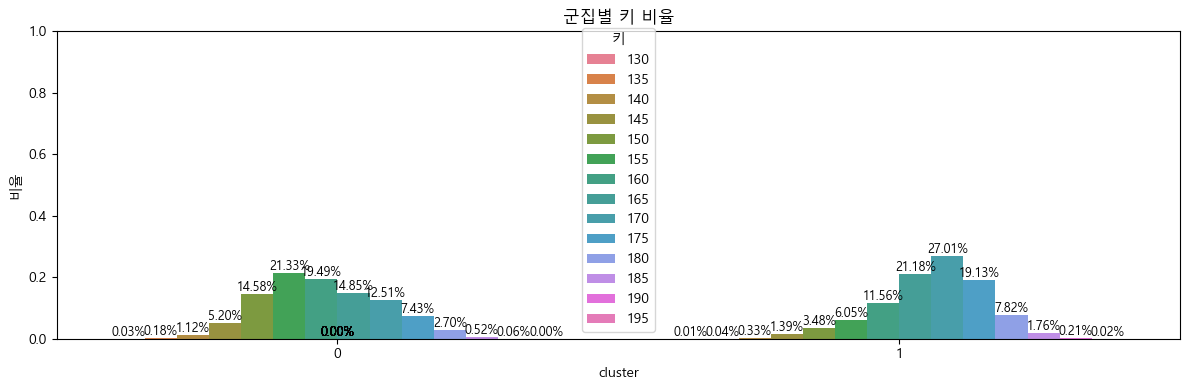

당뇨군


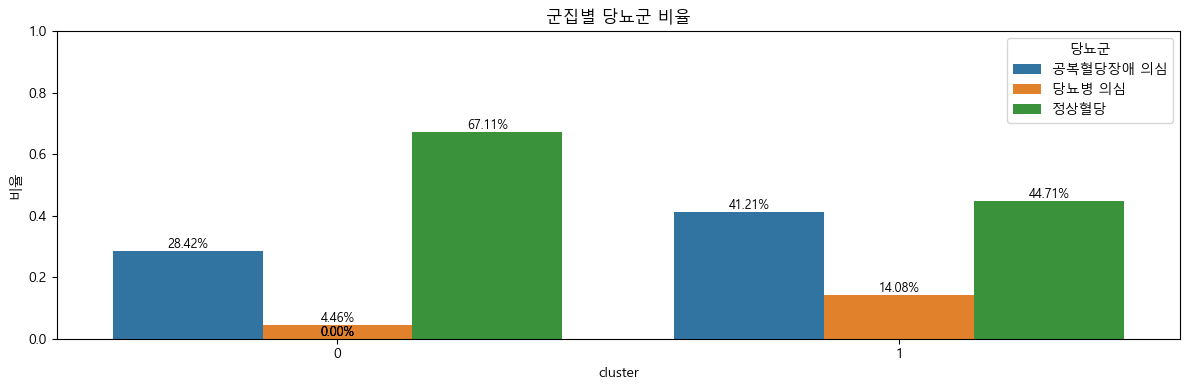

간질환군


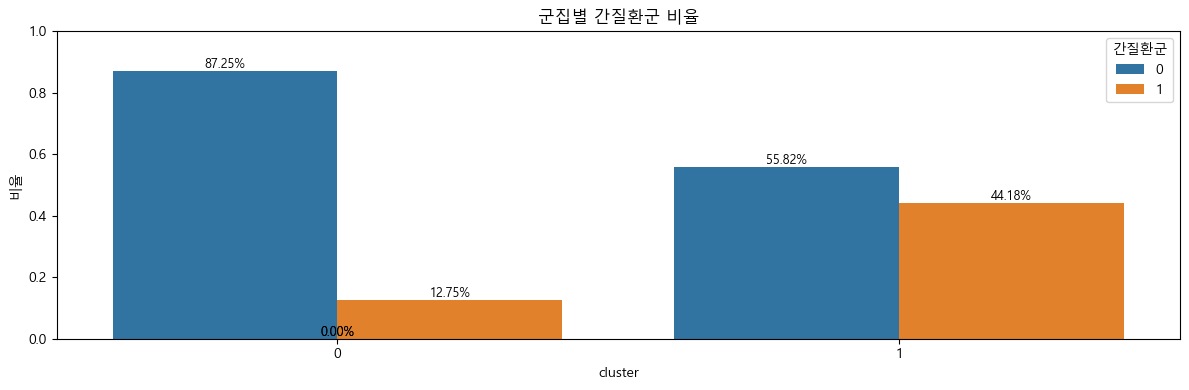

BMI구분


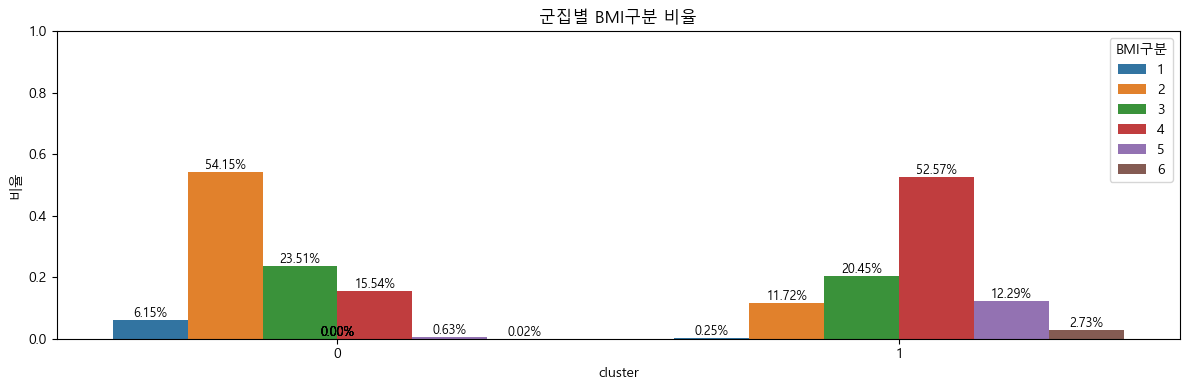

신장질환군


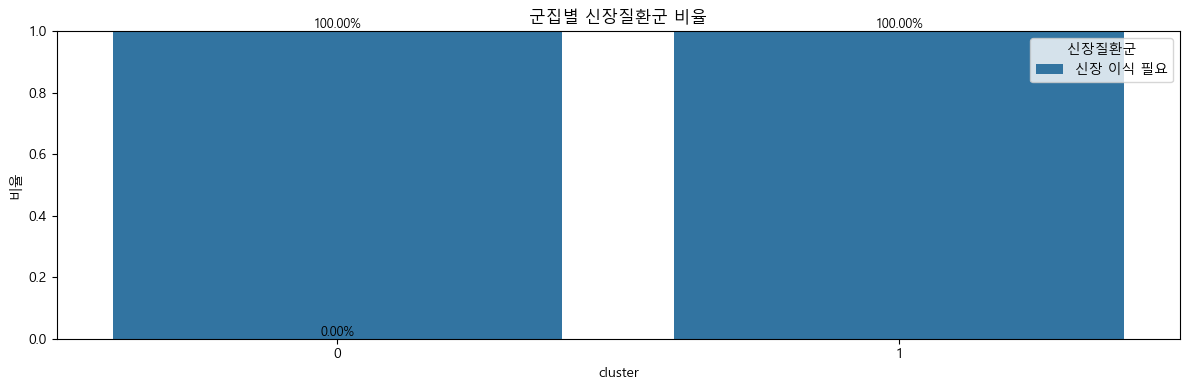

흡연상태


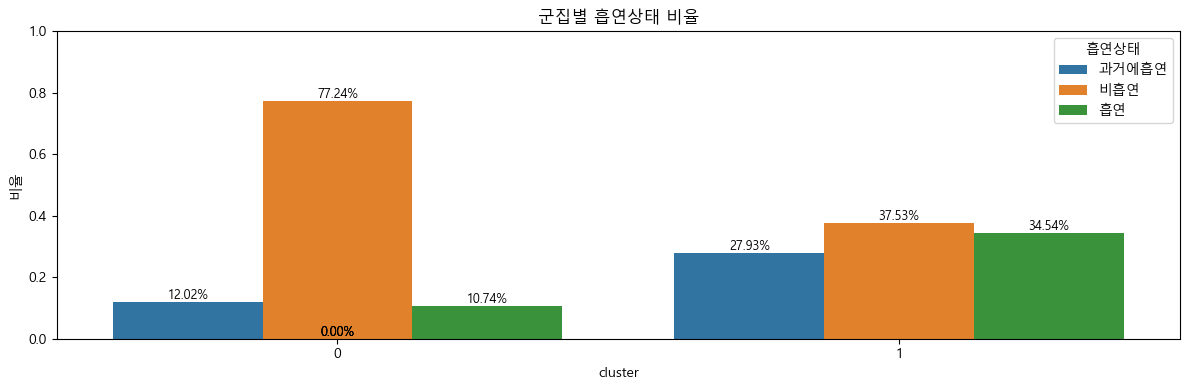

연령대


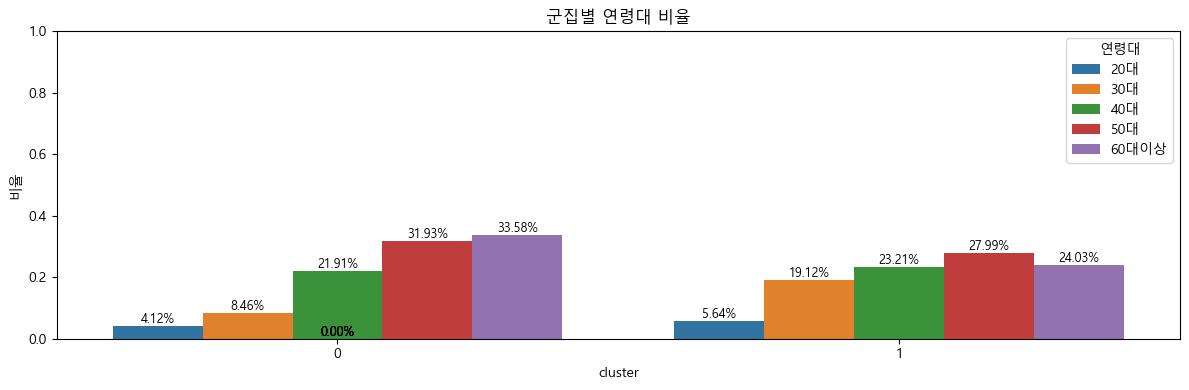

빈혈군


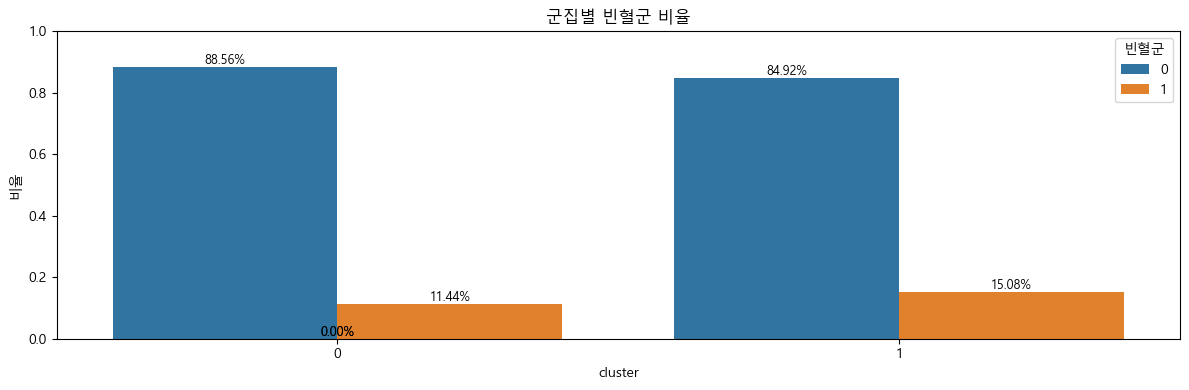

성별연령대


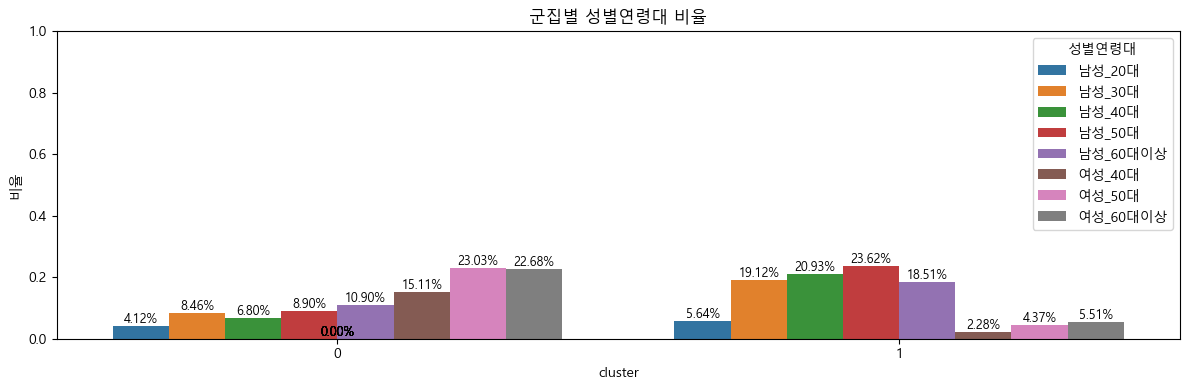

고혈압군


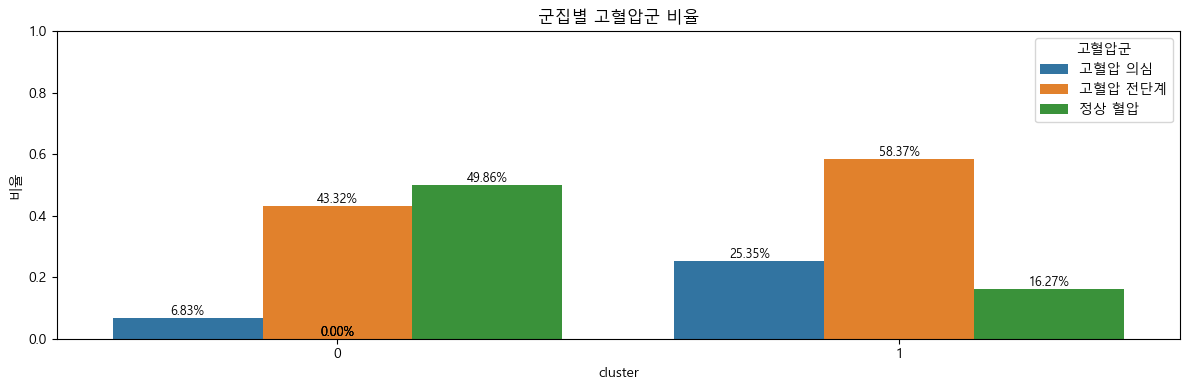

음주여부


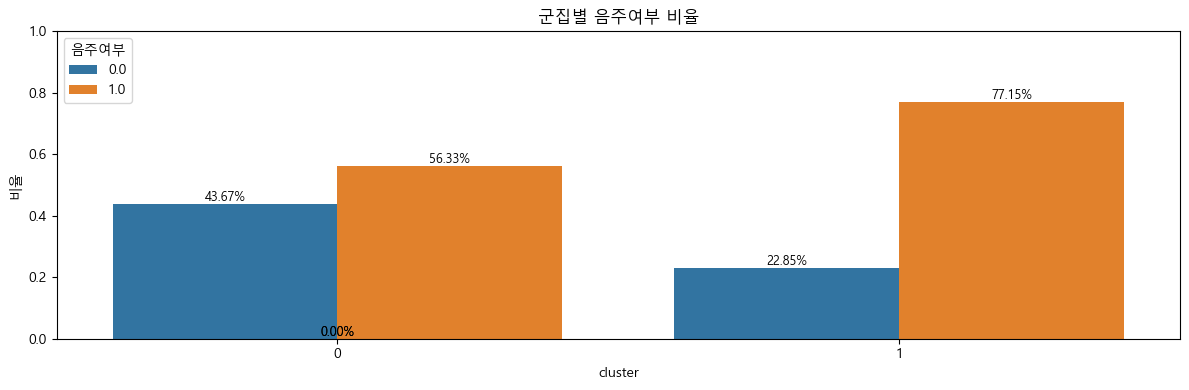

요단백


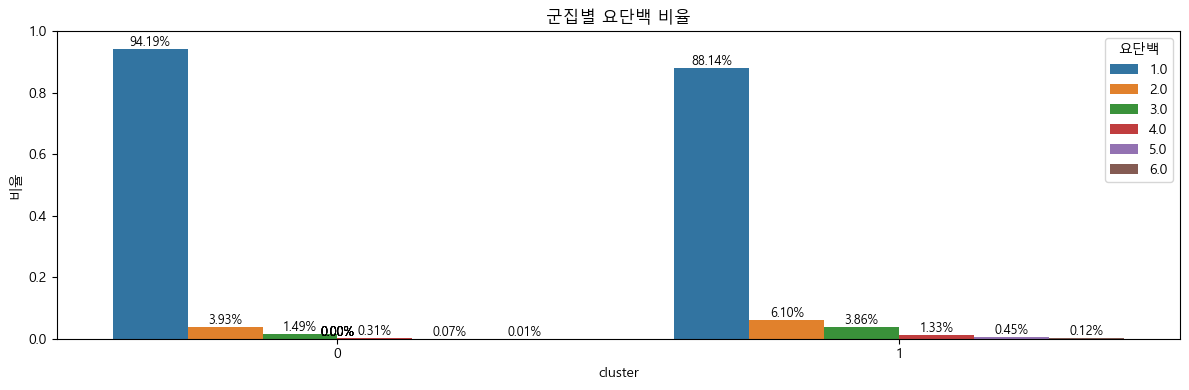

In [116]:
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.family']='Malgun Gothic'

for col in cat_col:
    print(col)
    
    # 군집별 범주 비율 테이블 생성
    ratio = (
        df.groupby('cluster')[col]
        .value_counts(normalize=True)
        .rename('비율')
        .reset_index()
    )

    # 시각화
    plt.figure(figsize=(12, 4))
    ax = sns.barplot(data=ratio, x='cluster', y='비율', hue=col)
    plt.title(f'군집별 {col} 비율')
    
    # 막대 위에 비율 표시
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2., height,
                f'{height:.2%}', ha='center', va='bottom', fontsize=9)
    
    plt.legend(title=col)
    plt.ylim(0, 1)  # 비율은 0~1
    plt.tight_layout()
    plt.show()

In [117]:
from IPython.display import display

for col in cat_col:
    if col=='cluster':continue
    print(f"\n[ 군집별 {col} 비율 테이블 ]")
    
    ratio = (
        df.groupby('cluster')[col]
        .value_counts(normalize=True)
        .rename('비율')
        .reset_index()
        .pivot(index=col, columns='cluster', values='비율')
        .fillna(0)  # 비어 있는 값은 0으로
    )
    
    # 퍼센트 형식으로 표시
    styled_ratio = ratio.style.format("{:.1%}").background_gradient(axis=0, cmap='Blues')
    display(styled_ratio)


[ 군집별 성별 비율 테이블 ]



[ 군집별 체중 비율 테이블 ]



[ 군집별 키 비율 테이블 ]



[ 군집별 당뇨군 비율 테이블 ]



[ 군집별 간질환군 비율 테이블 ]



[ 군집별 BMI구분 비율 테이블 ]



[ 군집별 신장질환군 비율 테이블 ]



[ 군집별 흡연상태 비율 테이블 ]



[ 군집별 연령대 비율 테이블 ]



[ 군집별 빈혈군 비율 테이블 ]



[ 군집별 성별연령대 비율 테이블 ]



[ 군집별 고혈압군 비율 테이블 ]



[ 군집별 음주여부 비율 테이블 ]



[ 군집별 요단백 비율 테이블 ]


In [118]:
use_col = ['허리둘레',
 '수축기혈압',
 '이완기혈압',
 '공복혈당',]

In [119]:
from IPython.display import display
import pandas as pd

for col in use_col:
    if col == 'cluster':
        continue

    print(f"\n[ 군집별 {col} 분포 테이블 (최소~최대 기준 5구간) ]")

    # 최소~최대 기준 5개 구간으로 나누기 (등간격 구간화)
    df[f'{col}_bin'] = pd.cut(df[col], bins=10)

    ratio = (
        df.groupby('cluster')[f'{col}_bin']
        .value_counts(normalize=True)
        .rename('비율')
        .reset_index()
        .pivot(index=f'{col}_bin', columns='cluster', values='비율')
        .fillna(0)
    )

    styled_ratio = ratio.style.format("{:.1%}").background_gradient(axis=0, cmap='Blues')
    display(styled_ratio)


[ 군집별 허리둘레 분포 테이블 (최소~최대 기준 5구간) ]



[ 군집별 수축기혈압 분포 테이블 (최소~최대 기준 5구간) ]



[ 군집별 이완기혈압 분포 테이블 (최소~최대 기준 5구간) ]



[ 군집별 공복혈당 분포 테이블 (최소~최대 기준 5구간) ]


In [120]:
for col in cont_col:
    print(col)
    print(df.groupby('cluster')[col].mean())

허리둘레
cluster
0    77.040361
1    89.838498
Name: 허리둘레, dtype: float64
수축기혈압
cluster
0    119.336402
1    130.644516
Name: 수축기혈압, dtype: float64
이완기혈압
cluster
0    72.280816
1    81.476452
Name: 이완기혈압, dtype: float64
공복혈당
cluster
0     97.185579
1    108.454856
Name: 공복혈당, dtype: float64
혈색소
cluster
0    13.699044
1    15.242701
Name: 혈색소, dtype: float64
혈청크레아티닌
cluster
0    0.785523
1    0.949824
Name: 혈청크레아티닌, dtype: float64
혈청지오티(AST)
cluster
0    24.125868
1    32.094870
Name: 혈청지오티(AST), dtype: float64
혈청지피티(ALT)
cluster
0    20.479266
1    37.321777
Name: 혈청지피티(ALT), dtype: float64
감마지티피
cluster
0    23.904565
1    56.937783
Name: 감마지티피, dtype: float64
BMI
cluster
0    22.575961
1    26.855804
Name: BMI, dtype: float64
사구체여과율
cluster
0   NaN
1   NaN
Name: 사구체여과율, dtype: float64


In [124]:
for col in cont_col:
    if col=='공복혈당'or col=='BMI':continue
    print(col)
    print(df1.groupby('cluster')[col].median())

허리둘레
cluster
0    68.0
1    69.4
2    86.0
Name: 허리둘레, dtype: float64
수축기혈압
cluster
0    110.0
1    110.0
2    125.0
Name: 수축기혈압, dtype: float64
이완기혈압
cluster
0    68.0
1    68.0
2    80.0
Name: 이완기혈압, dtype: float64
혈색소
cluster
0    13.2
1    13.1
2    13.6
Name: 혈색소, dtype: float64
혈청크레아티닌
cluster
0    0.7
1    0.7
2    0.7
Name: 혈청크레아티닌, dtype: float64
혈청지오티(AST)
cluster
0    18.0
1    18.0
2    21.0
Name: 혈청지오티(AST), dtype: float64
혈청지피티(ALT)
cluster
0    12.0
1    13.0
2    20.0
Name: 혈청지피티(ALT), dtype: float64
감마지티피
cluster
0    13.0
1    13.0
2    23.0
Name: 감마지티피, dtype: float64
사구체여과율
cluster
0   NaN
1   NaN
2   NaN
Name: 사구체여과율, dtype: float64


# 20대남성(비검사)

In [126]:
os.listdir()

['2030여성',
 '2030여성.zip',
 '20대초반남성.csv',
 'ALL_chol',
 'cho_test_결과있는사람',
 'cluster_result.csv',
 'cluster_result_not_cholesterol.csv',
 'data.CSV',
 'data2021.CSV',
 'data2022.CSV',
 'df_ord_gpt.csv',
 'df_ord_KPrototypes.csv',
 'kmeans_2030female_pipeline.pkl',
 'my_model.pkl',
 'new_new_cluster_pipeline4.pkl',
 'new_new_cluster_pipeline5.pkl',
 'new_new_new_콜레스테롤_결과있는사람2.pkl',
 'new_new_new_콜레스테롤_결과있는사람3.pkl',
 'new_콜레스테롤_결과있는사람.pkl',
 'not_chol_model.pkl',
 'real_chol_model.pkl',
 'real_cluster.csv',
 'X.csv',
 '국민건강보험공단_건강검진정보 사용자 매뉴얼_2023.hwpx',
 '생활패턴유형_소비지표.xlsx',
 '이상지질검사미수검자건강군집해석.csv',
 '이상지질검사미수검자군집분석_last.csv',
 '이상지질검사수검자군집결과마지막결과.csv',
 '지질검사대상인데기록없는사람',
 '콜레스테롤검사한사람.csv',
 '콜레스테롤측정안한데이터.csv',
 '콜레스테롤측정안한사람.csv',
 '클러스터링_모델_dict.pkl',
 '클러스터링_파이프라인.pkl']

In [127]:
df = pd.read_csv('20대초반남성.csv')
df.columns

Index(['Unnamed: 0', '연령대', '키', '체중', '허리둘레', '수축기혈압', '이완기혈압', '공복혈당', '혈색소',
       '요단백', '혈청크레아티닌', '혈청지오티(AST)', '혈청지피티(ALT)', '감마지티피', '흡연상태', '음주여부',
       'BMI', 'BMI구분', '사구체여과율', '신장질환군', '간질환군', '고혈압군', '빈혈군', '당뇨군',
       'cluster'],
      dtype='object')

In [129]:
df=df[['연령대', '키', '체중', '허리둘레', '수축기혈압', '이완기혈압', '공복혈당', '혈색소',
       '요단백', '혈청크레아티닌', '혈청지오티(AST)', '혈청지피티(ALT)', '감마지티피', '흡연상태', '음주여부',
       'BMI', 'BMI구분', '사구체여과율', '신장질환군', '간질환군', '고혈압군', '빈혈군', '당뇨군',
       'cluster']]

cluster


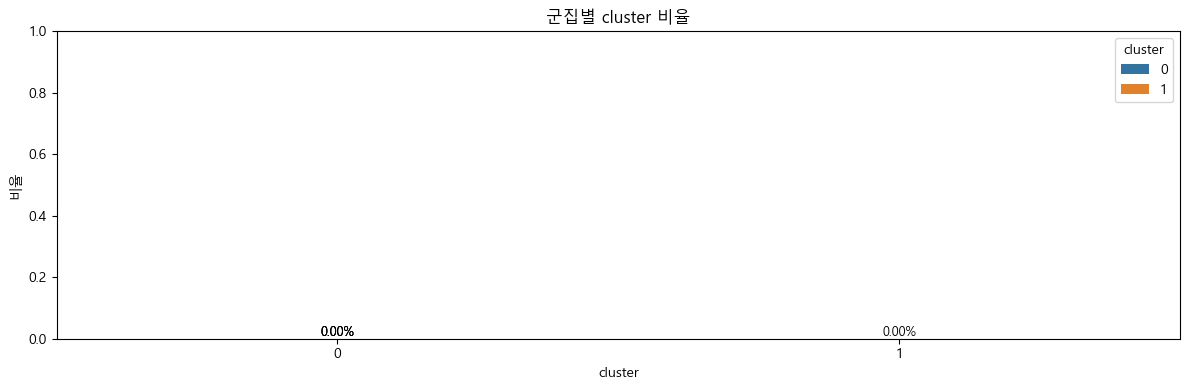

간질환군


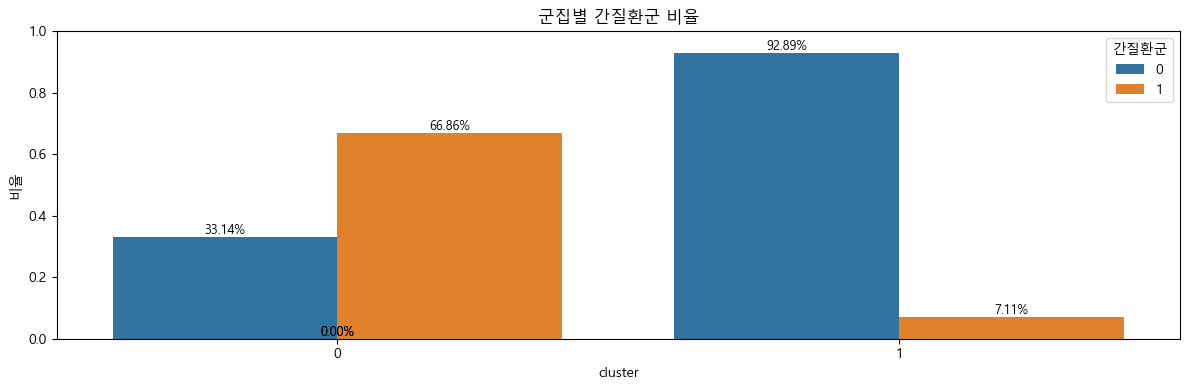

당뇨군


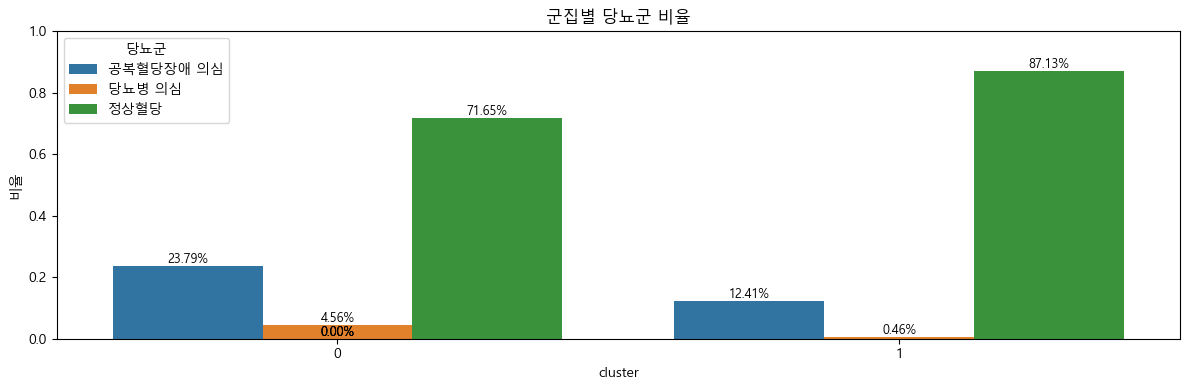

BMI구분


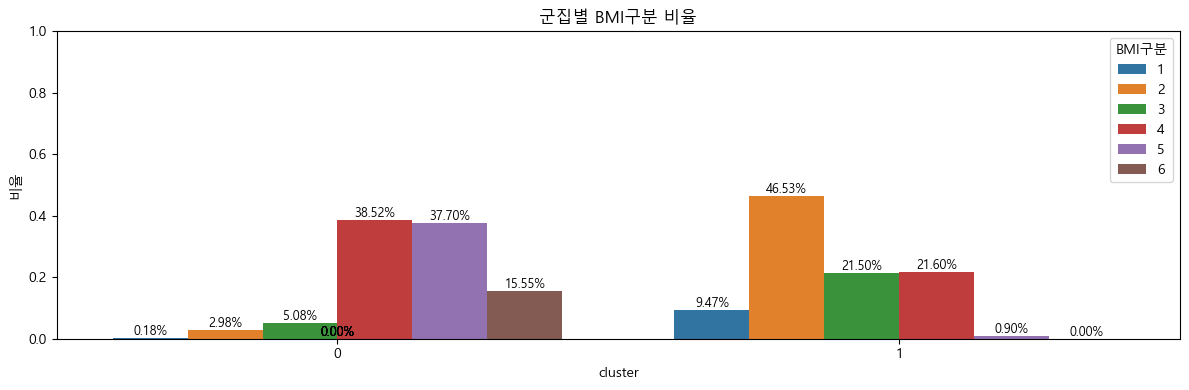

신장질환군


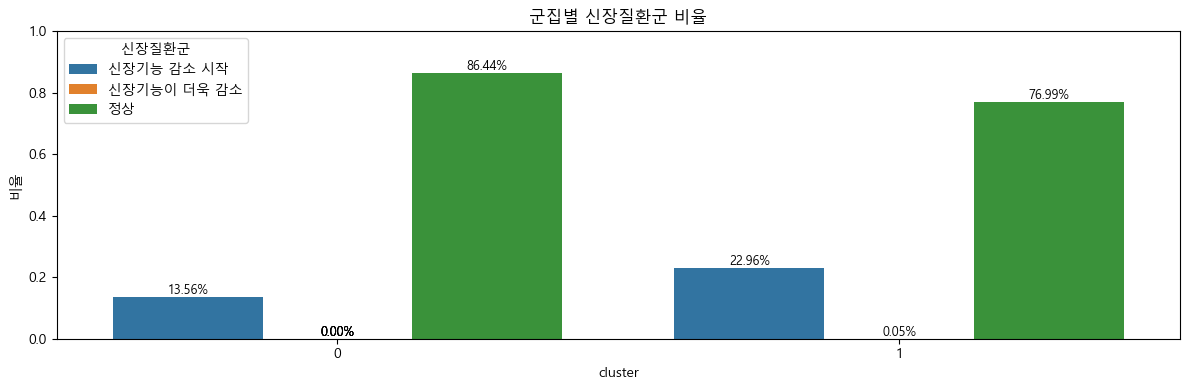

BMI


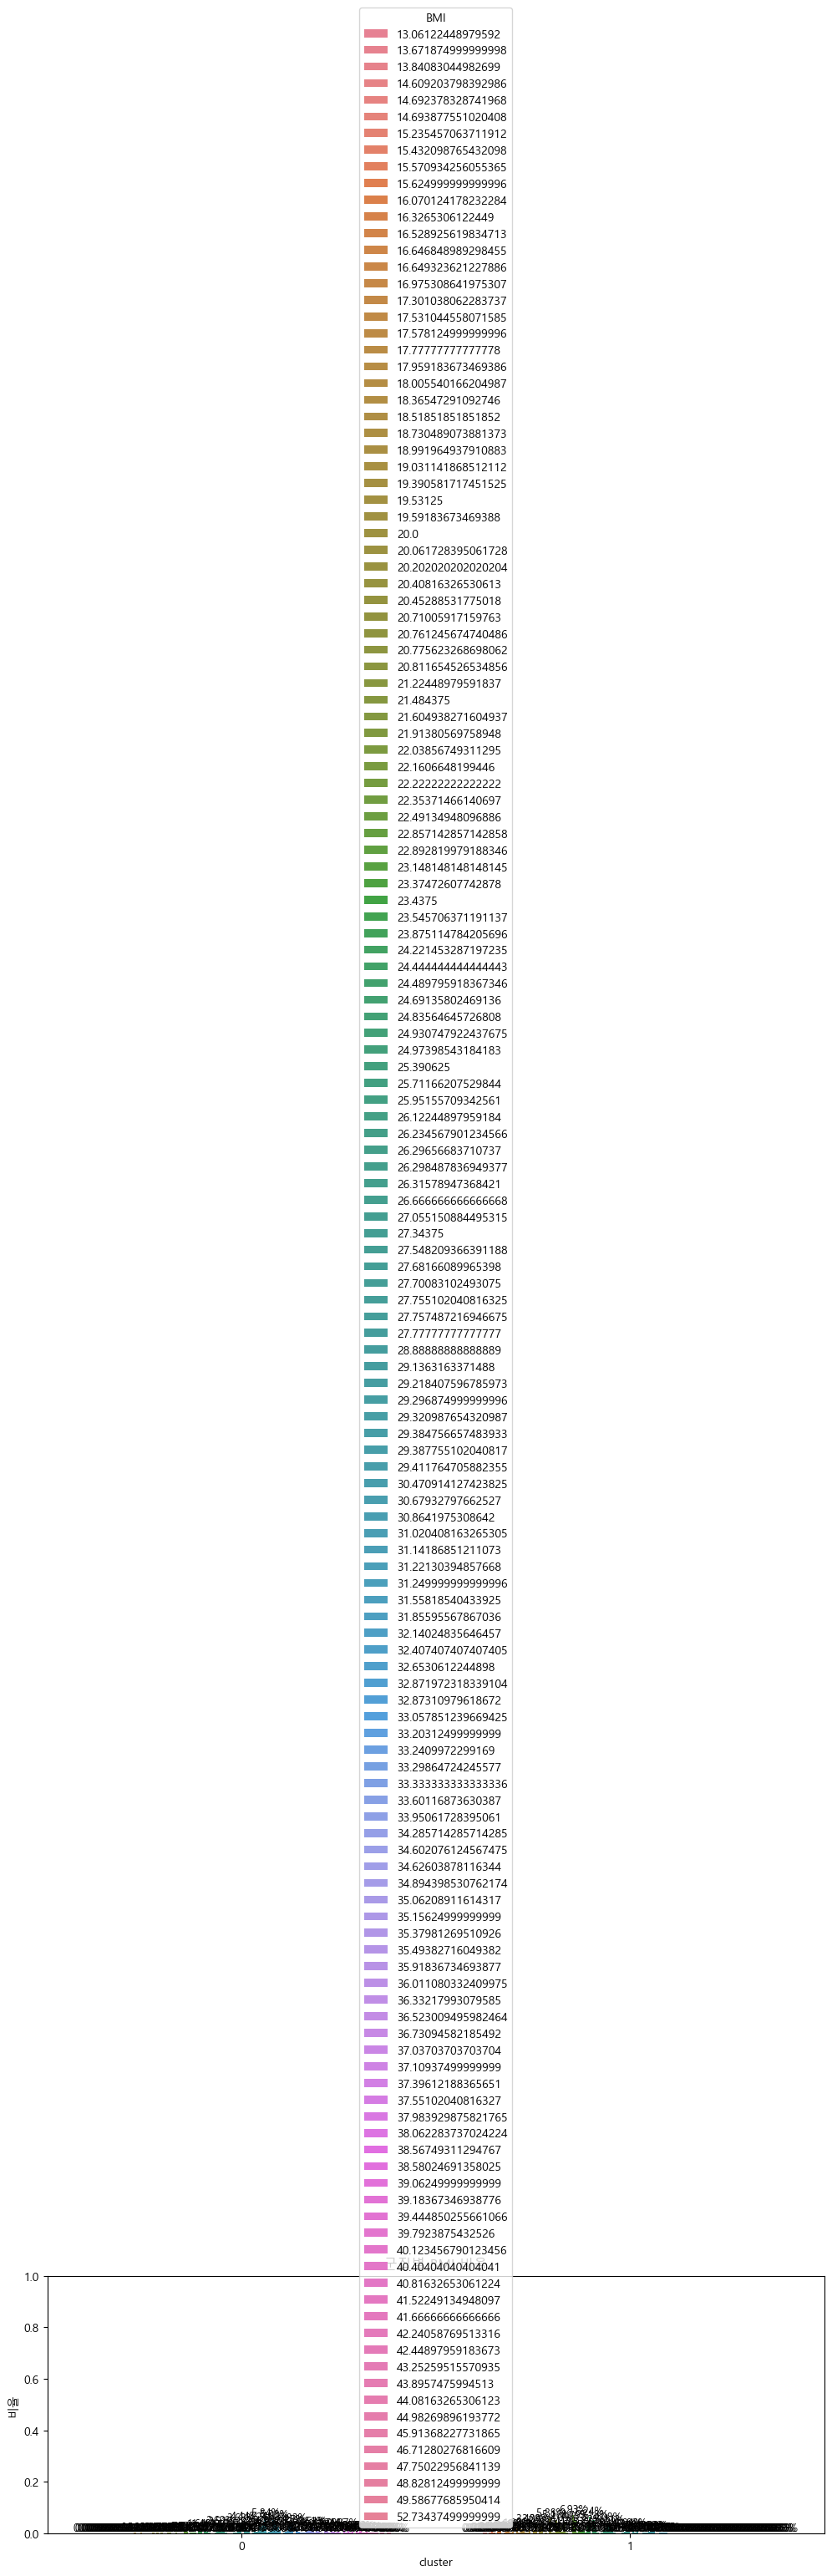

흡연상태


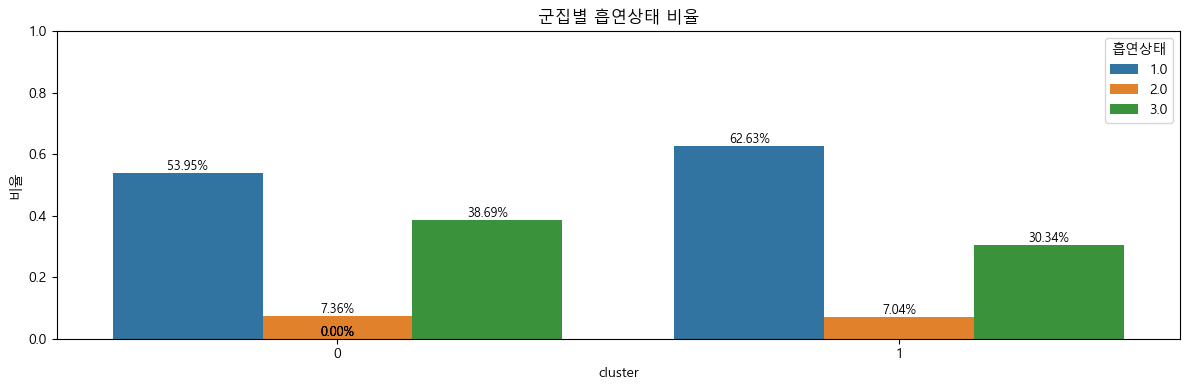

연령대


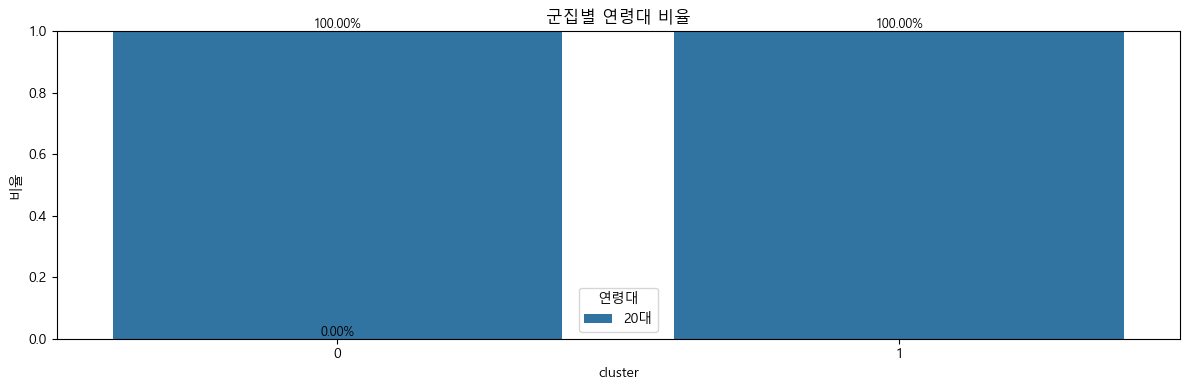

빈혈군


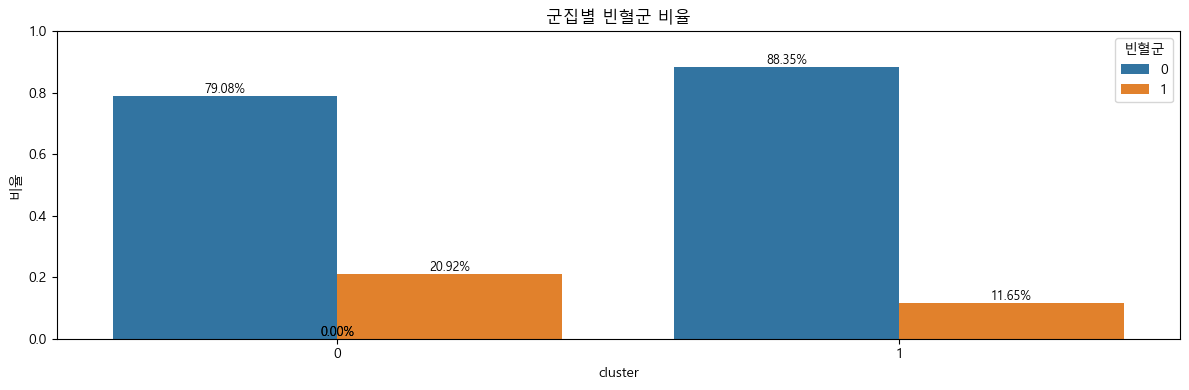

고혈압군


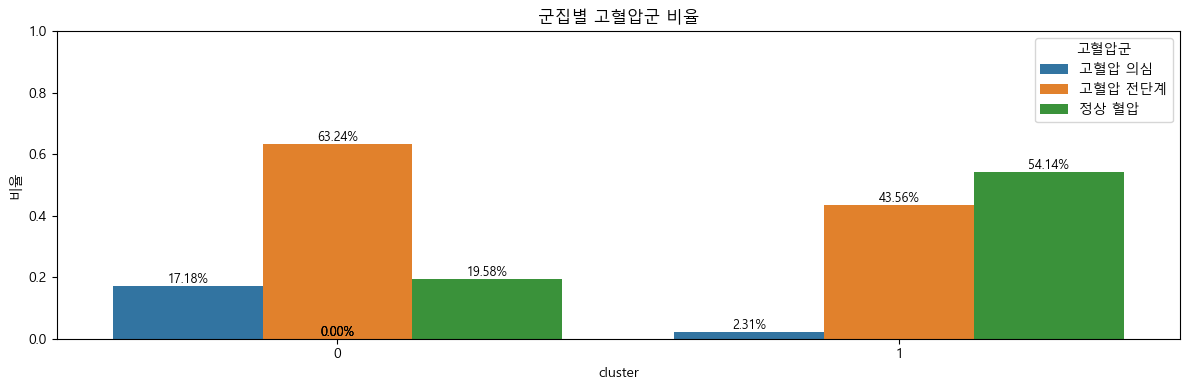

음주여부


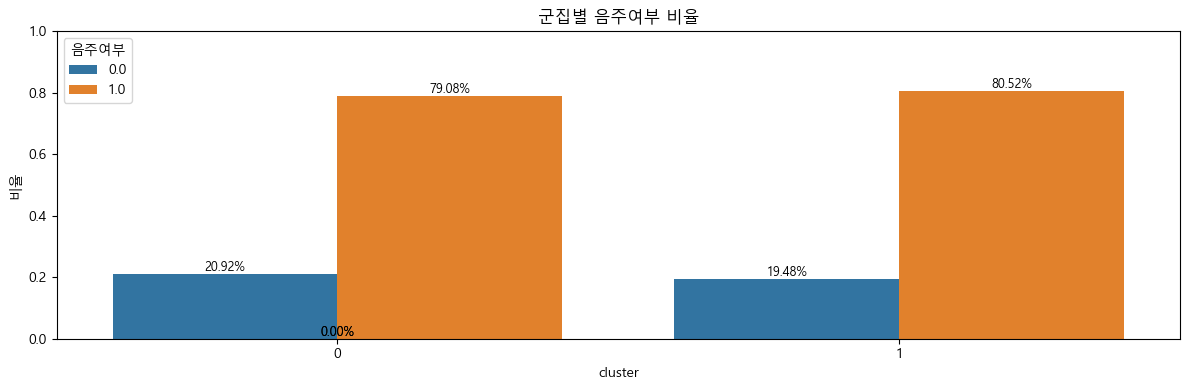

요단백


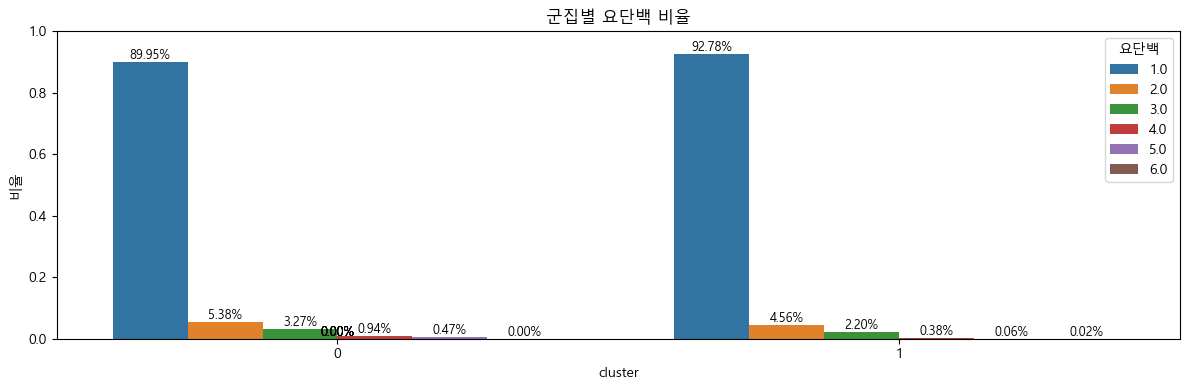

In [131]:
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.family']='Malgun Gothic'

for col in cat_col:
    print(col)
    
    # 군집별 범주 비율 테이블 생성
    ratio = (
        df.groupby('cluster')[col]
        .value_counts(normalize=True)
        .rename('비율')
        .reset_index()
    )

    # 시각화
    plt.figure(figsize=(12, 4))
    ax = sns.barplot(data=ratio, x='cluster', y='비율', hue=col)
    plt.title(f'군집별 {col} 비율')
    
    # 막대 위에 비율 표시
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2., height,
                f'{height:.2%}', ha='center', va='bottom', fontsize=9)
    
    plt.legend(title=col)
    plt.ylim(0, 1)  # 비율은 0~1
    plt.tight_layout()
    plt.show()

In [112]:
from IPython.display import display

for col in cat_col:
    if col=='cluster':continue
    print(f"\n[ 군집별 {col} 비율 테이블 ]")
    
    ratio = (
        df.groupby('cluster')[col]
        .value_counts(normalize=True)
        .rename('비율')
        .reset_index()
        .pivot(index=col, columns='cluster', values='비율')
        .fillna(0)  # 비어 있는 값은 0으로
    )
    
    # 퍼센트 형식으로 표시
    styled_ratio = ratio.style.format("{:.1%}").background_gradient(axis=0, cmap='Blues')
    display(styled_ratio)


[ 군집별 신장질환군 비율 테이블 ]



[ 군집별 성별연령대 비율 테이블 ]



[ 군집별 고혈압군 비율 테이블 ]



[ 군집별 성별 비율 테이블 ]



[ 군집별 당뇨군 비율 테이블 ]



[ 군집별 흡연상태 비율 테이블 ]



[ 군집별 음주여부 비율 테이블 ]



[ 군집별 빈혈군 비율 테이블 ]



[ 군집별 연령대 비율 테이블 ]



[ 군집별 BMI구분 비율 테이블 ]



[ 군집별 간질환군 비율 테이블 ]



[ 군집별 요단백 비율 테이블 ]


In [113]:
use_col = ['허리둘레',
 '수축기혈압',
 '이완기혈압',
 '공복혈당']

In [114]:
from IPython.display import display
import pandas as pd

for col in use_col:
    if col == 'cluster':
        continue

    print(f"\n[ 군집별 {col} 분포 테이블 (최소~최대 기준 5구간) ]")

    # 최소~최대 기준 5개 구간으로 나누기 (등간격 구간화)
    df[f'{col}_bin'] = pd.cut(df[col], bins=10)

    ratio = (
        df.groupby('cluster')[f'{col}_bin']
        .value_counts(normalize=True)
        .rename('비율')
        .reset_index()
        .pivot(index=f'{col}_bin', columns='cluster', values='비율')
        .fillna(0)
    )

    styled_ratio = ratio.style.format("{:.1%}").background_gradient(axis=0, cmap='Blues')
    display(styled_ratio)


[ 군집별 허리둘레 분포 테이블 (최소~최대 기준 5구간) ]



[ 군집별 수축기혈압 분포 테이블 (최소~최대 기준 5구간) ]



[ 군집별 이완기혈압 분포 테이블 (최소~최대 기준 5구간) ]



[ 군집별 공복혈당 분포 테이블 (최소~최대 기준 5구간) ]


In [115]:
for col in cont_col:
    print(col)
    print(df.groupby('cluster')[col].mean())

키
cluster
0    173.051432
1    171.596078
Name: 키, dtype: float64
체중
cluster
0    91.166490
1    66.803137
Name: 체중, dtype: float64
허리둘레
cluster
0    95.806946
1    77.048847
Name: 허리둘레, dtype: float64
수축기혈압
cluster
0    130.015907
1    117.591059
Name: 수축기혈압, dtype: float64
이완기혈압
cluster
0    79.178155
1    70.327373
Name: 이완기혈압, dtype: float64
공복혈당
cluster
0    97.535525
1    90.127843
Name: 공복혈당, dtype: float64
혈색소
cluster
0    15.878049
1    15.395231
Name: 혈색소, dtype: float64
혈청크레아티닌
cluster
0    0.901060
1    0.943451
Name: 혈청크레아티닌, dtype: float64
혈청지오티(AST)
cluster
0    39.389714
1    21.906353
Name: 혈청지오티(AST), dtype: float64
혈청지피티(ALT)
cluster
0    59.508484
1    19.727059
Name: 혈청지피티(ALT), dtype: float64
감마지티피
cluster
0    49.693531
1    21.102902
Name: 감마지티피, dtype: float64
사구체여과율
cluster
0    116.142225
1    109.769808
Name: 사구체여과율, dtype: float64


# 함수&데이터 불러오기

In [91]:
os.chdir('../')
os.getcwd()

'C:\\Users\\samsung\\Desktop\\ml_team'

In [92]:
os.chdir('./data/test')
os.listdir()

['2030여성',
 '2030여성.zip',
 'ALL_chol',
 'cho_test_결과있는사람',
 'cluster_result.csv',
 'cluster_result_not_cholesterol.csv',
 'data.CSV',
 'data2021.CSV',
 'data2022.CSV',
 'df_ord_gpt.csv',
 'df_ord_KPrototypes.csv',
 'not_chol_model.pkl',
 'real_chol_model.pkl',
 'real_cluster.csv',
 'X.csv',
 '국민건강보험공단_건강검진정보 사용자 매뉴얼_2023.hwpx',
 '생활패턴유형_소비지표.xlsx',
 '지질검사대상인데기록없는사람',
 '콜레스테롤검사한사람.csv',
 '콜레스테롤측정안한데이터.csv',
 '콜레스테롤측정안한사람.csv']

In [41]:
df1 = pd.read_csv('이상지질검사수검자군집결과마지막결과.csv', index_col=0)
df1.head()

df2 = pd.read_csv('cluster_result_not_cholesterol.csv', index_col=0)
df2.head()

성별  연령대  허리둘레  수축기혈압  이완기혈압  식전혈당(공복혈당)   혈색소  요단백  혈청크레아티닌  혈청지오티(AST)  \
0   1    5  69.2   92.0   60.0        93.0  12.2  1.0      0.6        16.0   
1   1    6  74.4  109.0   67.0        90.0  13.7  1.0      0.6        12.0   
2   1    8  93.0  119.0   82.0        88.0  12.3  1.0      0.6        16.0   
3   1    5  79.0  152.0   91.0       114.0  13.7  1.0      0.7        21.0   
4   1    7  64.0  102.0   68.0        93.0  12.7  2.0      0.6        19.0   

   혈청지피티(ALT)  감마지티피  흡연상태  음주여부  BMI구분  청력  평균시력 new_연령대  cluster  
0        11.0   12.0   1.0   1.0      1   1   1.1     20대        0  
1         8.0   12.0   1.0   1.0      2   1   1.2     20대        0  
2        16.0   16.0   1.0   1.0      4   1   0.8     30대        2  
3        25.0   19.0   1.0   1.0      4   1   1.0     20대        2  
4         8.0    9.0   1.0   0.0      2   1   1.0     30대        1

In [6]:
df1.columns

Index(['성별', '연령대', '키', '체중', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)',
       '수축기혈압', '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤',
       'LDL콜레스테롤', '혈색소', '혈청크레아티닌', '혈청지오티(AST)', '혈청지피티(ALT)', '감마지티피',
       '흡연상태', '음주여부', '구강검진수검여부', '치아우식증유무', '치석', 'BMI', '사구체여과율', '청력',
       '평균시력', 'cluster'],
      dtype='object')

In [42]:
# # 연령대 그룹 코드별 중앙 나이 추정값 매핑
연령대_중앙값 = {
    1: 2, 2: 7, 3: 12, 4: 17, 5: 22,
    6: 27, 7: 32, 8: 37, 9: 42,
    10: 47, 11: 52, 12: 57, 13: 62,
    14: 67, 15: 72, 16: 77, 17: 82, 18: 87
}


def 사구체여과율(row):
    creatinine = row['혈청크레아티닌']
    group_code = row['연령대']

    # 연령대 매핑 확인
    if group_code not in 연령대_중앙값:
        return np.nan  # 알 수 없는 연령대면 NaN

    age = 연령대_중앙값[group_code]
    sex_factor = 0.742 if row['성별'] == 1 else 1  # 여성=1, 남성=0

    # MDRD 공식 계산
    egfr = 186 * (creatinine ** -1.154) * (age ** -0.203) * sex_factor
    return egfr

df2['사구체여과율']= df2.apply(사구체여과율, axis=1)
df1['사구체여과율']= df1.apply(사구체여과율, axis=1)

def 신장질환판단(row):
    gap = row['사구체여과율']
    if gap>=90: return '정상'
    elif gap>=60: return '신장기능 감소 시작'
    elif gap>=30: return '신장기능이 더욱 감소' 
    elif gap>=15: return '생명만 유지할 수준' 
    else : return '신장 이식 필요'
df2['신장질환군']=df2.apply(신장질환판단, axis=1)
df1['신장질환군']=df1.apply(신장질환판단, axis=1)

def 간질환판단(row):
    ast = row['혈청지오티(AST)']
    alt = row['혈청지피티(ALT)']
    gtp = row['감마지티피']

    # 간 효소 중 1개라도 정상 범위 초과 시 간기능 이상 의심
    if ast >= 40 or alt >= 40 or gtp > (63 if row['성별'] == 0 else 35):
        return 1  # 이상
    else:
        return 0  # 정상
        
df2['간질환군']=df2.apply(간질환판단, axis=1)
df1['간질환군']=df1.apply(간질환판단, axis=1)

def 혈압판단(row):
    수축기 = row['수축기혈압']
    이완기 = row['이완기혈압']

    if 수축기 >= 140 or 이완기 >= 90:
        return '고혈압 의심'
    elif 수축기 >= 120 or 이완기 >= 80:
        return '고혈압 전단계'
    else:
        return '정상 혈압'

df2['고혈압군'] = df2.apply(혈압판단, axis=1)
df1['고혈압군'] = df1.apply(혈압판단, axis=1)

def 빈혈판단(row):
    hb = row['혈색소']
    gender = row['성별']

    if gender == 0:
        return 0 if 16.5>=hb >= 13 else 1
    elif gender == 1:
        return 0 if 15.5>=hb >= 12 else 1
    else:
        return '성별 오류'
df2['빈혈군'] = df2.apply(빈혈판단, axis=1)
df1['빈혈군'] = df1.apply(빈혈판단, axis=1)

def 당뇨판단(row):
    혈당 = row['식전혈당(공복혈당)']
    if 혈당>=126: return '당뇨병 의심'
    if 혈당 >= 100: return '공복혈당장애 의심'
    else : return '정상혈당'

df2['당뇨군'] = df2.apply(당뇨판단, axis=1)
df1['당뇨군'] = df1.apply(당뇨판단, axis=1)
def categorize_age(age):
    if age in [5, 6]:
        return '20대'
    elif age in [7, 8]:
        return '30대'
    elif age in [9, 10]:
        return '40대'
    elif age in [11, 12]:
        return '50대'
    elif age in [1, 2, 3, 4]:
        return '미성년자'
    else:
        return '60대이상'

df1['연령대'] = df1['연령대'].map(categorize_age)
df2['연령대'] = df2['연령대'].map(categorize_age)

In [31]:
df1.columns

Index(['성별', '연령대', '키', '체중', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)',
       '수축기혈압', '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤',
       'LDL콜레스테롤', '혈색소', '혈청크레아티닌', '혈청지오티(AST)', '혈청지피티(ALT)', '감마지티피',
       '흡연상태', '음주여부', '구강검진수검여부', '치아우식증유무', '치석', 'BMI', '사구체여과율', '청력',
       '평균시력', 'cluster', '성별연령대', '신장질환군', '간질환군', '고혈압군', '빈혈군', '당뇨군'],
      dtype='object')

In [ ]:
df2=df2[['성별', '연령대', '허리둘레', '수축기혈압', '이완기혈압', '식전혈당(공복혈당)', '혈색소', '요단백',
       '혈청크레아티닌', '혈청지오티(AST)', '혈청지피티(ALT)', '감마지티피', '흡연상태', '음주여부', 'BMI구분',
       '청력', '평균시력', '사구체여과율', '신장질환군', '간질환군', '고혈압군', '빈혈군',
       '당뇨군','cluster']]

In [12]:
df1.shape

(100328, 31)

In [13]:
df2.shape

(121307, 25)

- 이상지질혈증 대상자는 '총콜레스테롤','트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '치아우식증유무', '치석','이상지질혈증군'
컬럼이 추가적으로 있음

In [14]:
print('이상지질혈증 검사 대상자 ',df1.cluster.value_counts())
print()
print('이상지질혈증 검사 비대상자 ', df2.cluster.value_counts())

이상지질혈증 검사 대상자  cluster
1    51228
0    49100
Name: count, dtype: int64

이상지질혈증 검사 비대상자  cluster
1    54409
0    47073
2    19825
Name: count, dtype: int64


In [90]:
df1.shape, df2.shape

((100328, 31), (121307, 24))

In [91]:
df1.head(2)
df2.head()

성별  연령대  허리둘레  수축기혈압  이완기혈압  식전혈당(공복혈당)   혈색소  요단백  혈청크레아티닌  혈청지오티(AST)  \
0   1  20대  69.2   92.0   60.0        93.0  12.2  1.0      0.6        16.0   
1   1  20대  74.4  109.0   67.0        90.0  13.7  1.0      0.6        12.0   
2   1  30대  93.0  119.0   82.0        88.0  12.3  1.0      0.6        16.0   
3   1  20대  79.0  152.0   91.0       114.0  13.7  1.0      0.7        21.0   
4   1  30대  64.0  102.0   68.0        93.0  12.7  2.0      0.6        19.0   

   ...  BMI구분  청력  평균시력      사구체여과율  신장질환군  간질환군     고혈압군  빈혈군        당뇨군  \
0  ...      1   1   1.1  132.867420     정상     0    정상 혈압    0       정상혈당   
1  ...      2   1   1.2  127.456933     정상     0    정상 혈압    0       정상혈당   
2  ...      4   1   0.8  119.559849     정상     0  고혈압 전단계    0       정상혈당   
3  ...      4   1   1.0  111.214626     정상     0   고혈압 의심    0  공복혈당장애 의심   
4  ...      2   1   1.0  123.135949     정상     0    정상 혈압    0       정상혈당   

   cluster  
0        0  
1        0  
2        2  
3        2  
4        1  

[5 rows x 24 columns]

# 이상지질혈증 대상군

In [17]:
df1['성별'] = df1['성별'].map({0: '남성', 1: '여성'})
df2['성별'] = df2['성별'].map({0: '남성', 1: '여성'})

df1['성별연령대'] = df1['성별'].astype(str) + "_" + df1['연령대'].astype(str)
df2['성별연령대'] = df2['성별'].astype(str) + "_" + df2['연령대'].astype(str)

In [18]:
two=[]
two_up=[]
cont_col=[]
for col in df1.columns:
    if df1[col].nunique()==2: two.append(col)
    if df1[col].nunique()<20: print(col,df1[col].unique()); two_up.append(col)
    else: cont_col.append(col)

성별 ['남성' '여성']
연령대 ['60대이상' '30대' '40대' '50대' '20대']
키 [160 170 180 165 175 155 150 145 140 185 135 190 130 195]
시력(좌) [1.  1.2 0.1 0.5 0.7 0.3 0.8 0.4 2.  0.9 1.5 0.6 0.2 1.6 1.3 1.8 1.1 1.4]
시력(우) [1.2 0.2 0.9 0.7 1.  0.6 1.5 0.8 0.3 0.5 2.  0.4 0.1 1.6 1.9 1.4 1.8 1.3
 1.1]
청력(좌) [1. 2.]
청력(우) [1. 2.]
흡연상태 [3. 2. 1.]
음주여부 [1. 0.]
구강검진수검여부 [1]
치아우식증유무 [0. 1.]
치석 [0. 1.]
청력 [1 3 2]
평균시력 [1.1 1.2 0.2 1.  0.6 0.8 0.5 0.7 0.9 1.6 0.4 1.4 1.8 0.3 1.5 0.1 2.  1.3]
cluster [1 0]
성별연령대 ['남성_60대이상' '남성_30대' '남성_40대' '여성_60대이상' '남성_50대' '여성_40대' '여성_50대'
 '남성_20대']


In [21]:
cont_col=['허리둘레', '수축기혈압', '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤',
       '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '요단백', '혈청크레아티닌',
       '혈청지오티(AST)', '혈청지피티(ALT)', '감마지티피','사구체여과율','BMI']
cat_col = set(df1.columns)-set(cont_col)
cat_col=list(cat_col)
for col in cat_col:
    df1[col]= pd.Categorical(df1[col])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100328 entries, 0 to 100327
Data columns (total 32 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   성별          100328 non-null  category
 1   연령대         100328 non-null  category
 2   키           100328 non-null  category
 3   체중          100328 non-null  category
 4   허리둘레        100328 non-null  float64 
 5   시력(좌)       100328 non-null  category
 6   시력(우)       100328 non-null  category
 7   청력(좌)       100328 non-null  category
 8   청력(우)       100328 non-null  category
 9   수축기혈압       100328 non-null  float64 
 10  이완기혈압       100328 non-null  float64 
 11  식전혈당(공복혈당)  100328 non-null  float64 
 12  총콜레스테롤      100328 non-null  float64 
 13  트리글리세라이드    100328 non-null  float64 
 14  HDL콜레스테롤    100328 non-null  float64 
 15  LDL콜레스테롤    100328 non-null  float64 
 16  혈색소         100328 non-null  float64 
 17  혈청크레아티닌     100328 non-null  float64 
 18  혈청지오티(AST)  100328 non-null  

## 성별&연령대

In [22]:
from IPython.display import display

for col in cat_col:
    print(f"\n[ {col} vs 성별연령대 교차비율 (%)]")
    ctab = pd.crosstab(index=df1[col], columns=df1['성별연령대'], normalize='columns') * 100
    styled = ctab.style.background_gradient(axis=0, cmap='Blues').format("{:.1f}%")
    display(styled)


[ 치석 vs 성별연령대 교차비율 (%)]



[ cluster vs 성별연령대 교차비율 (%)]



[ 성별 vs 성별연령대 교차비율 (%)]



[ 체중 vs 성별연령대 교차비율 (%)]



[ 치아우식증유무 vs 성별연령대 교차비율 (%)]



[ 키 vs 성별연령대 교차비율 (%)]



[ 청력(좌) vs 성별연령대 교차비율 (%)]



[ 흡연상태 vs 성별연령대 교차비율 (%)]



[ 평균시력 vs 성별연령대 교차비율 (%)]



[ 시력(좌) vs 성별연령대 교차비율 (%)]



[ 연령대 vs 성별연령대 교차비율 (%)]



[ 성별연령대 vs 성별연령대 교차비율 (%)]



[ 구강검진수검여부 vs 성별연령대 교차비율 (%)]



[ 청력 vs 성별연령대 교차비율 (%)]



[ 시력(우) vs 성별연령대 교차비율 (%)]



[ 음주여부 vs 성별연령대 교차비율 (%)]



[ 청력(우) vs 성별연령대 교차비율 (%)]


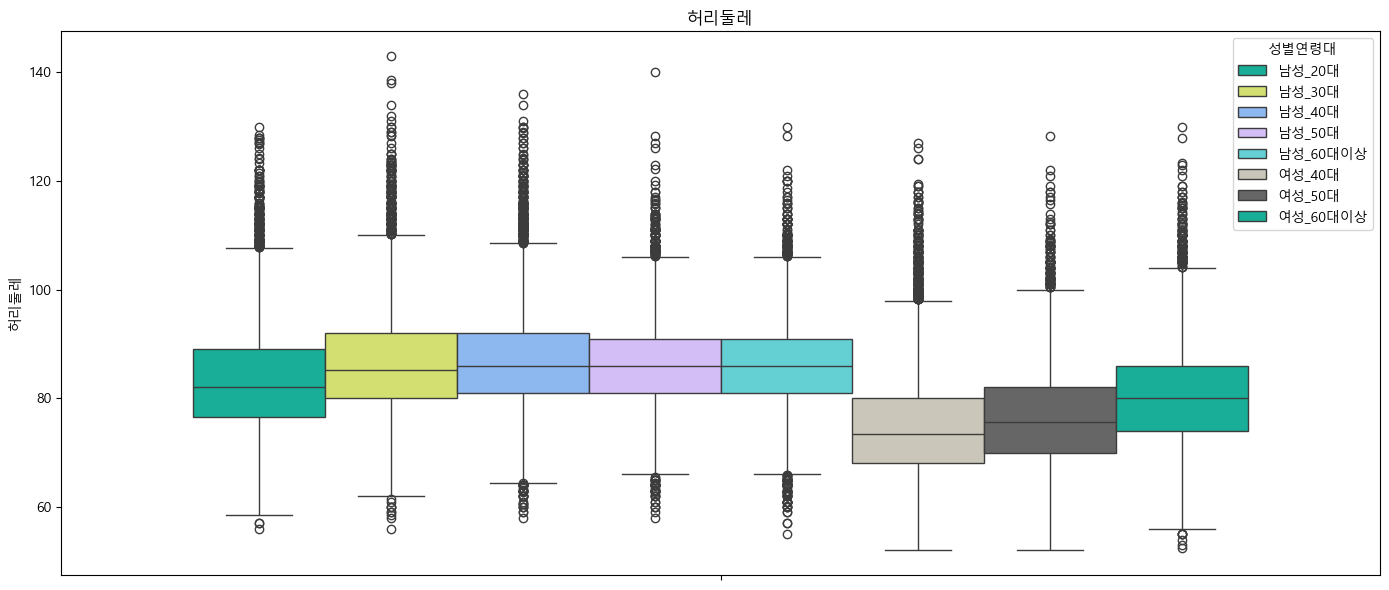

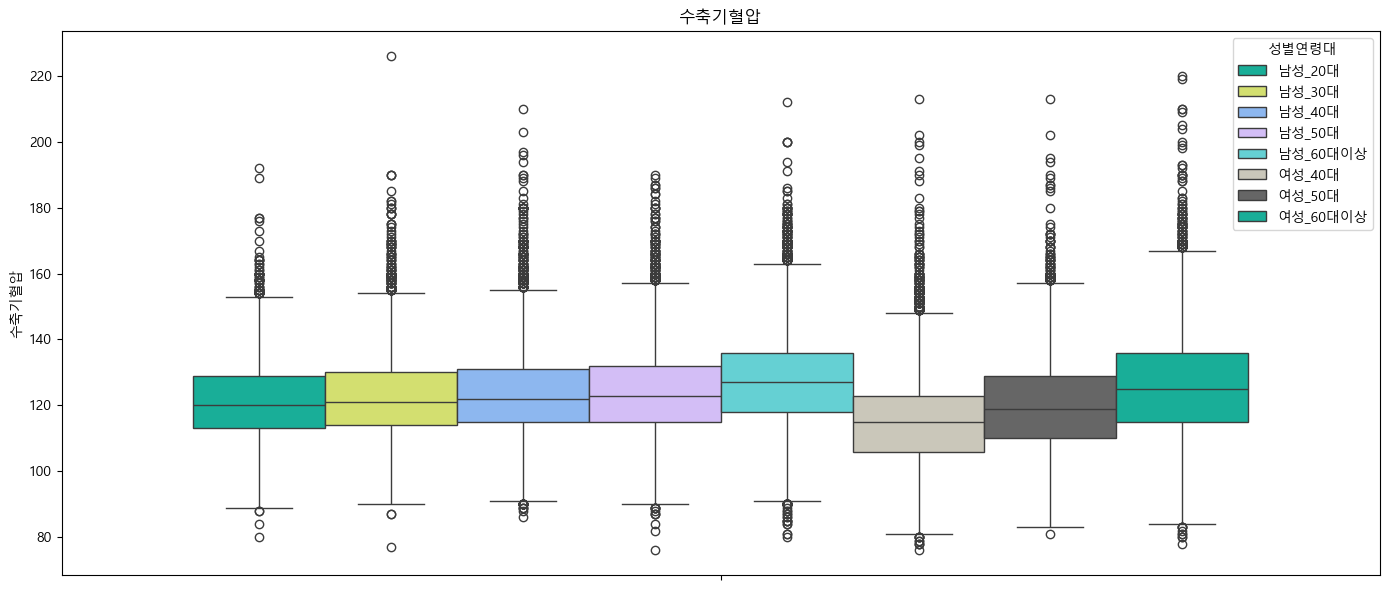

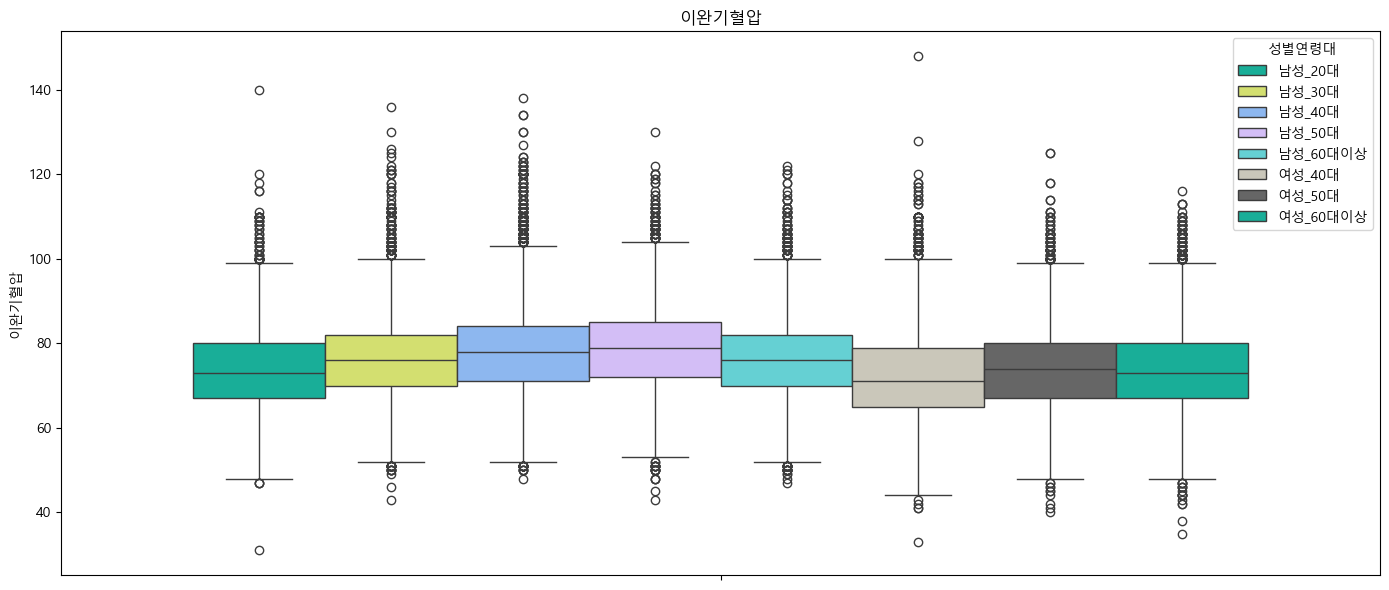

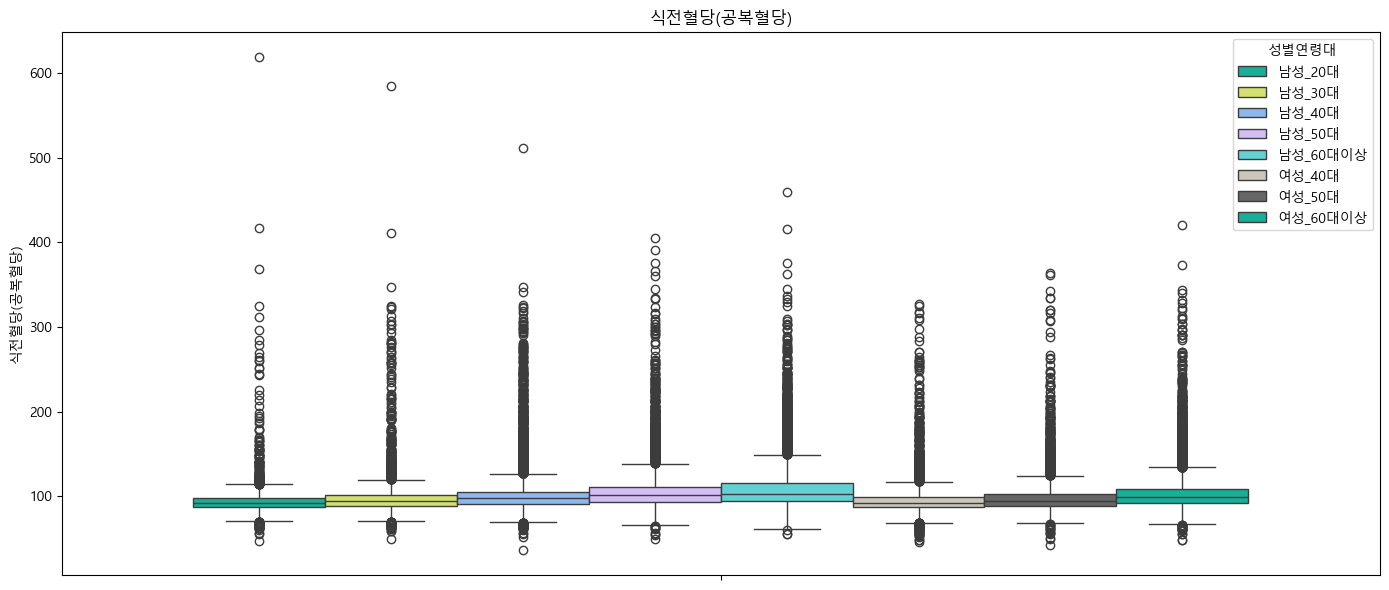

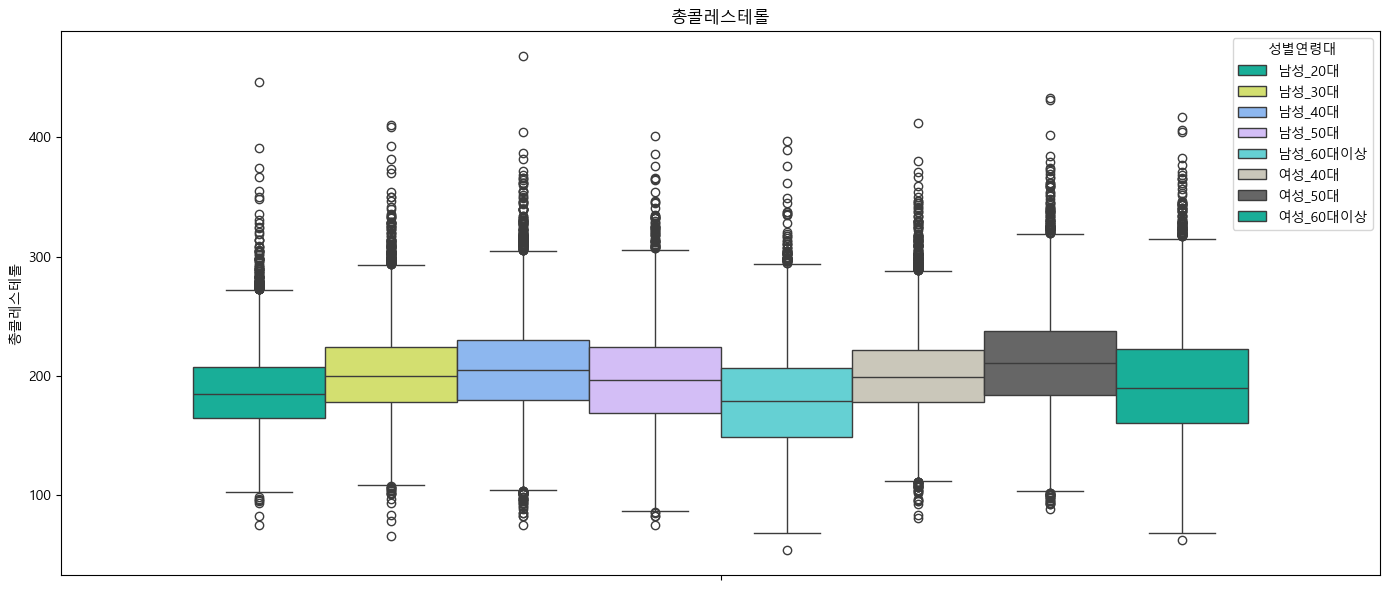

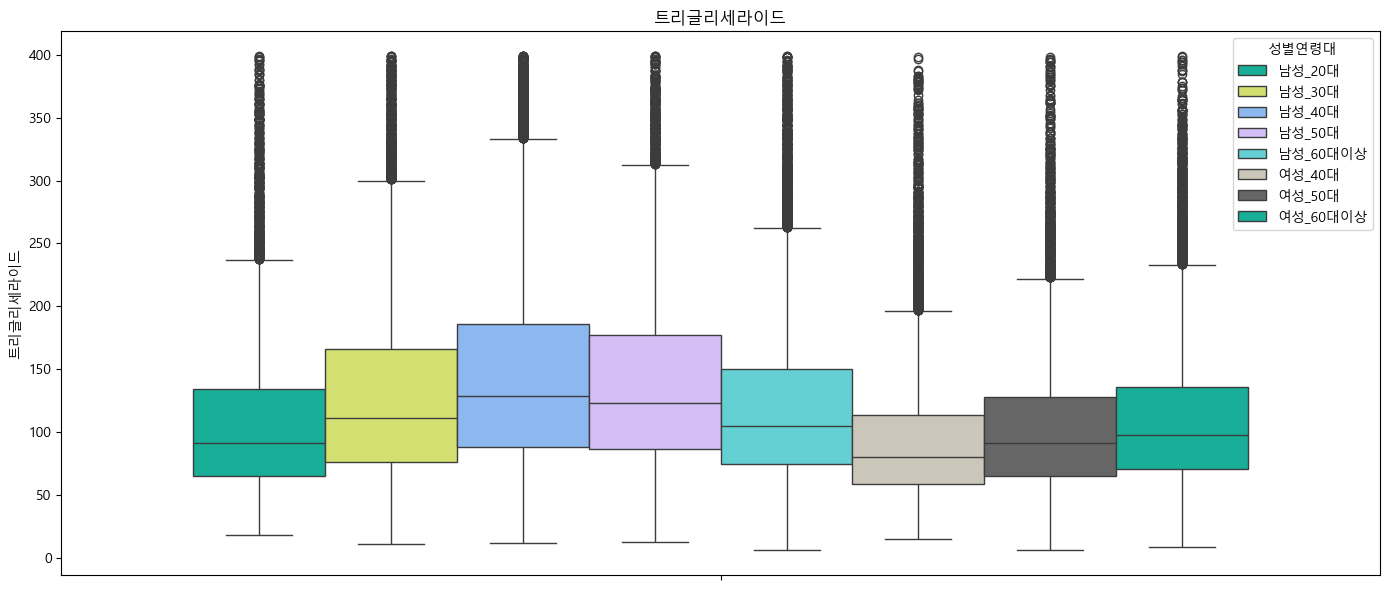

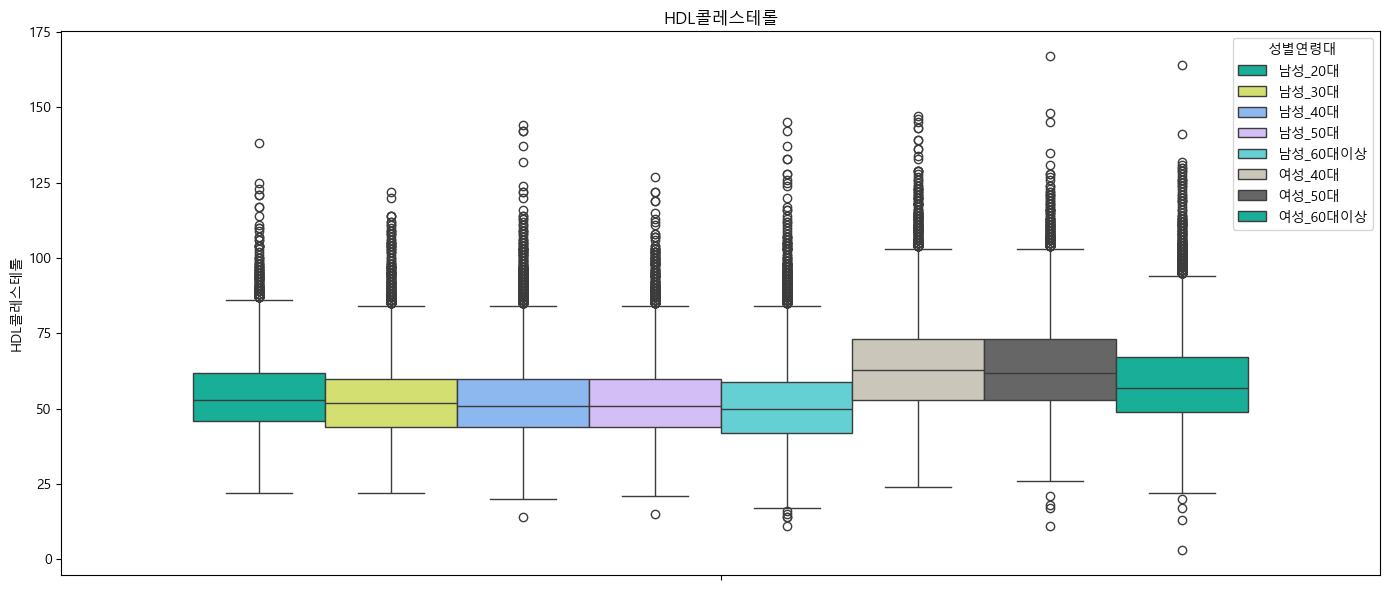

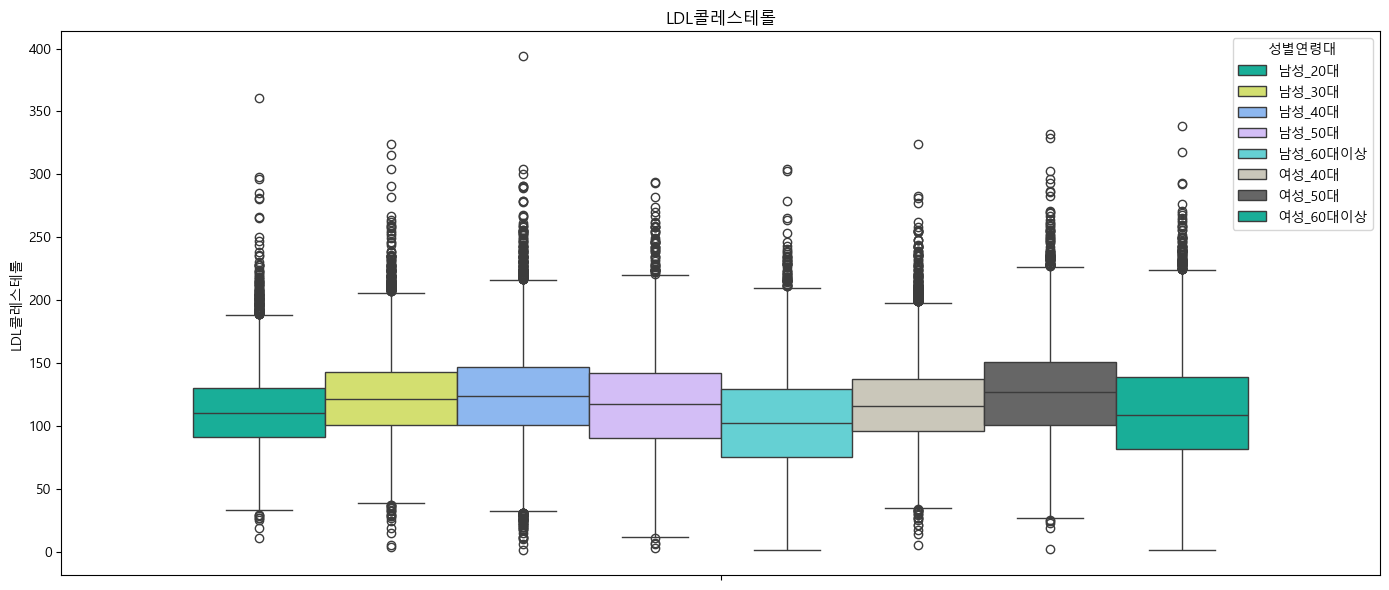

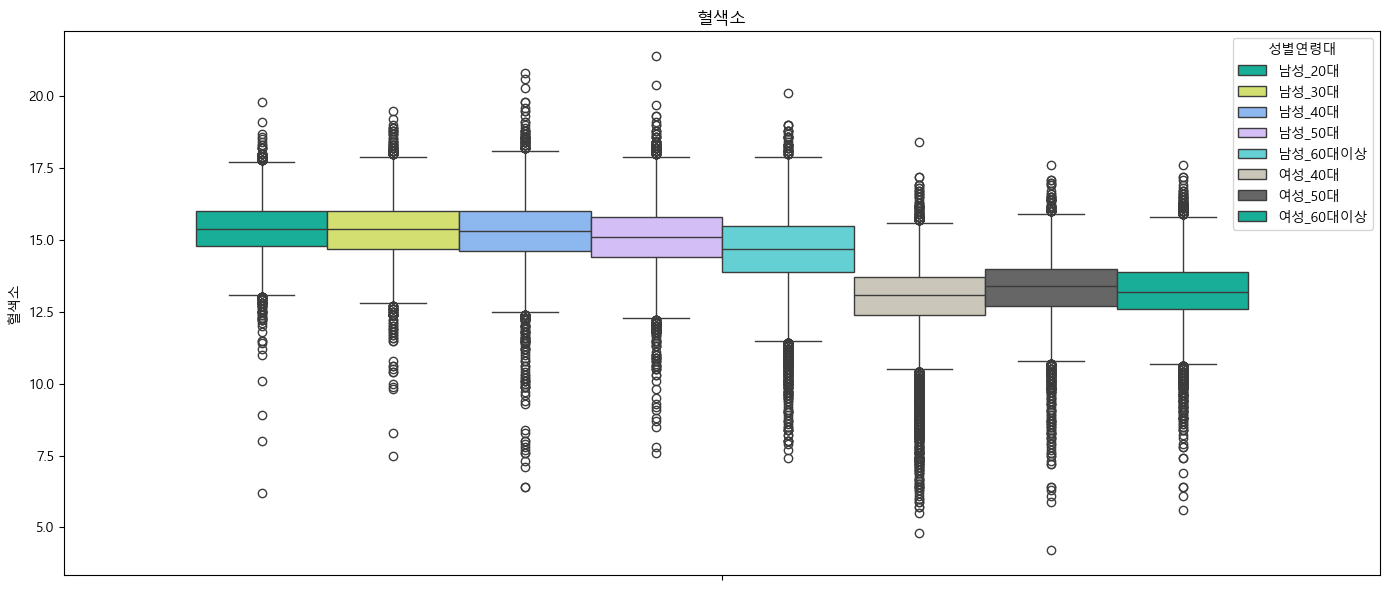

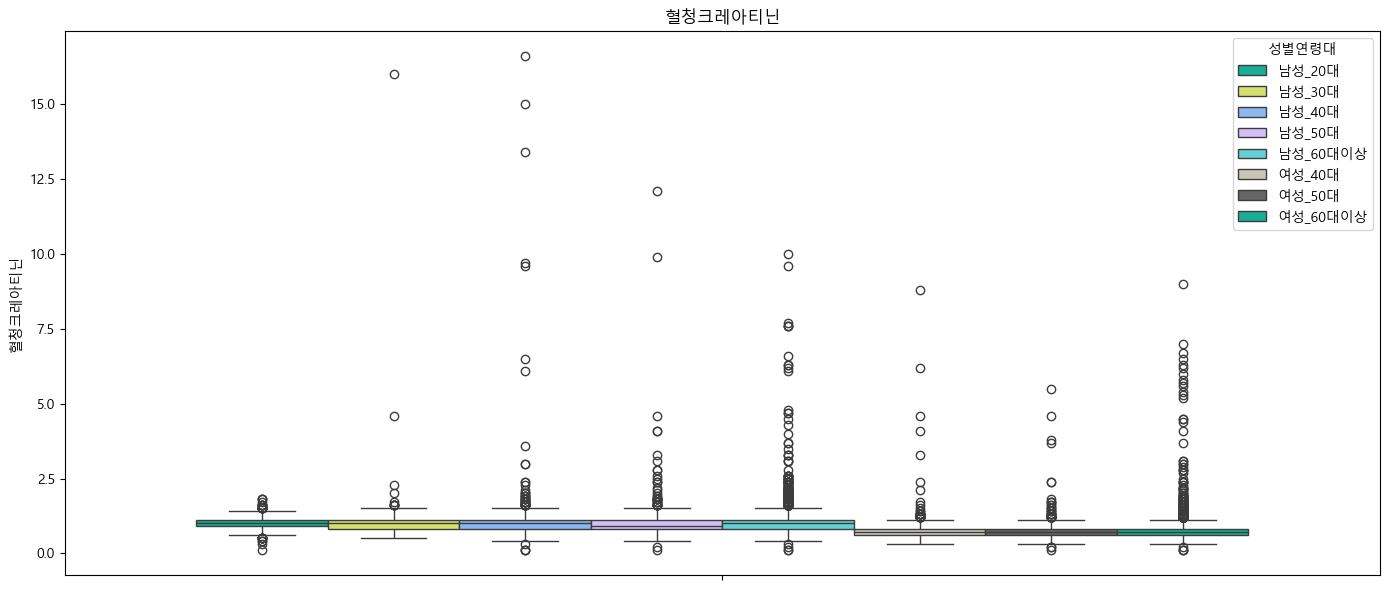

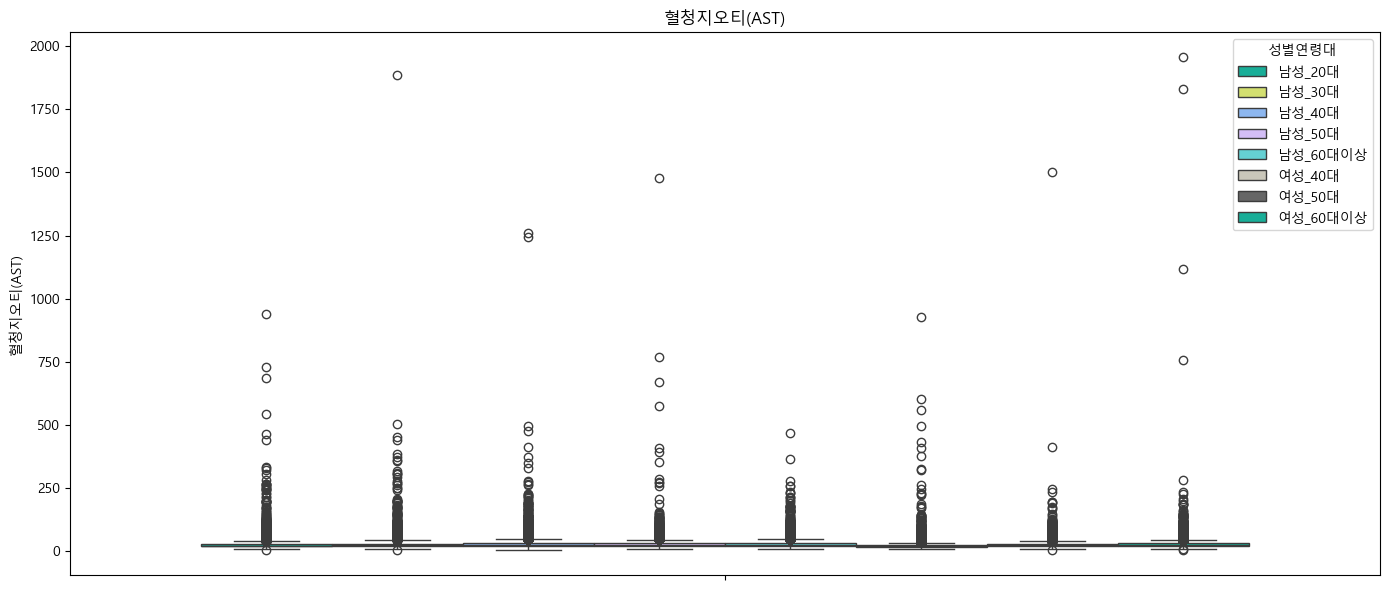

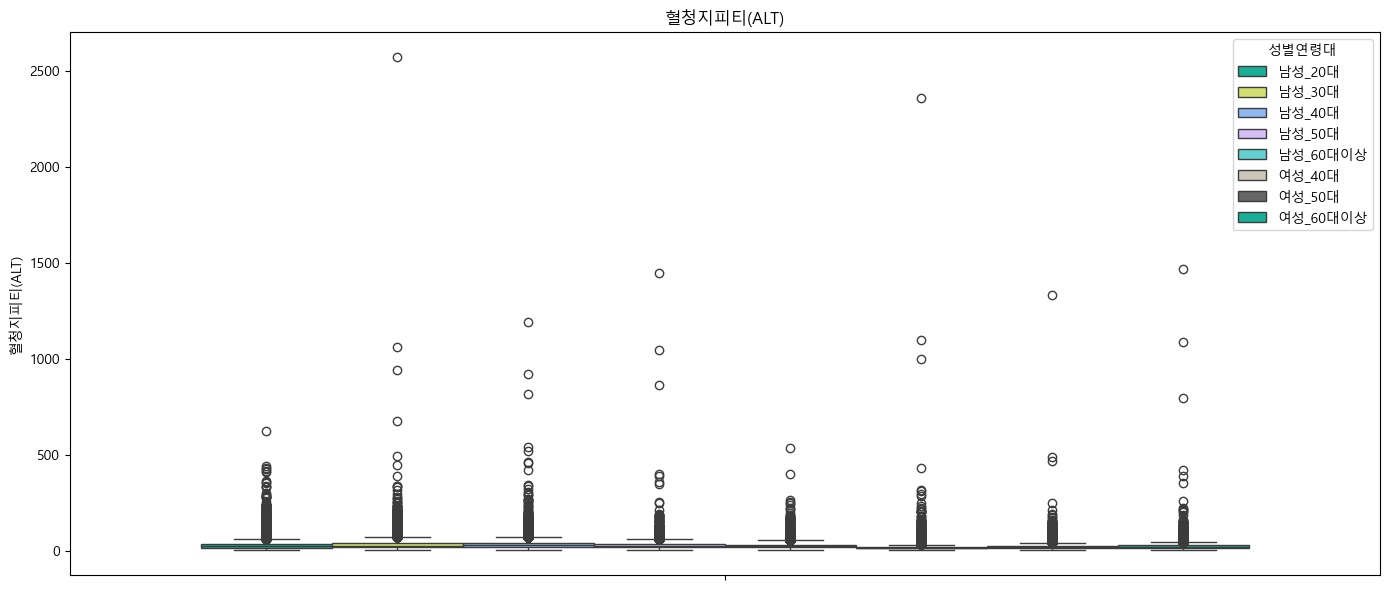

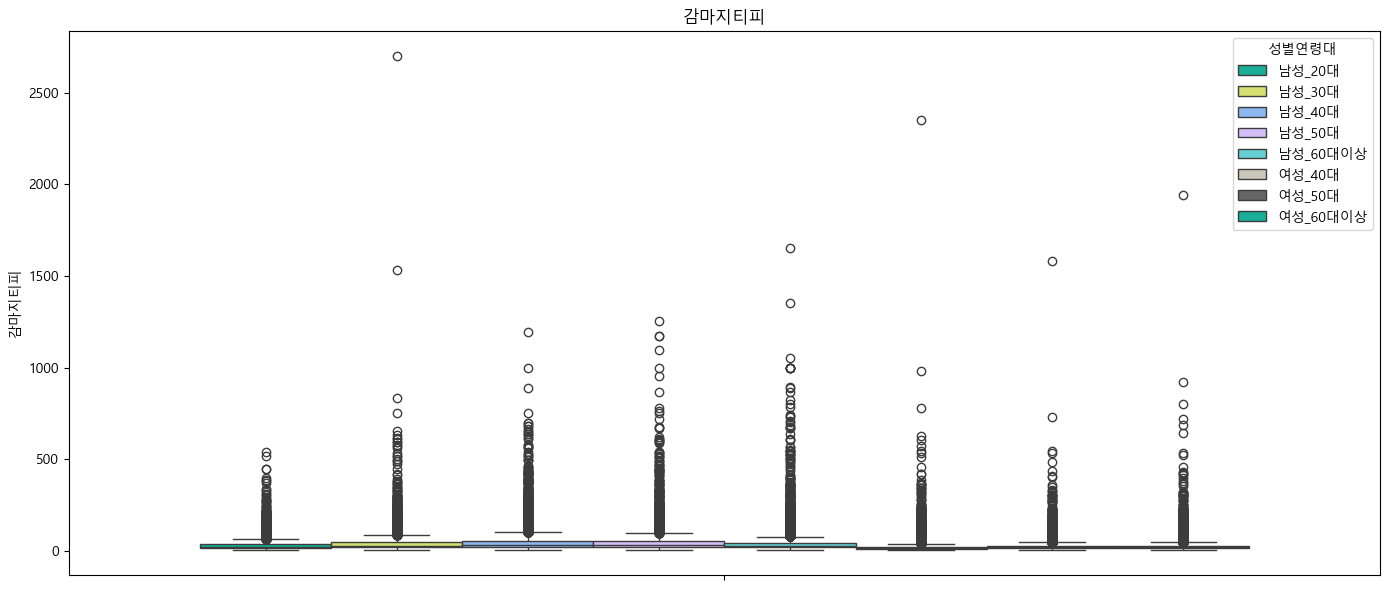

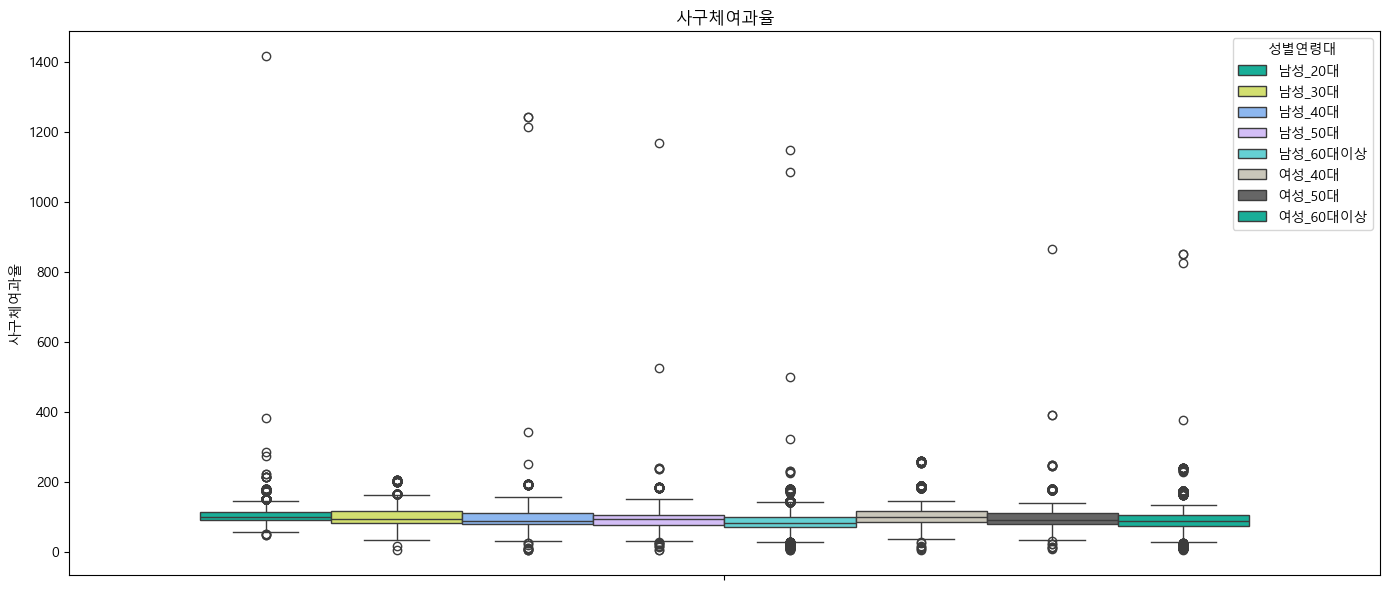

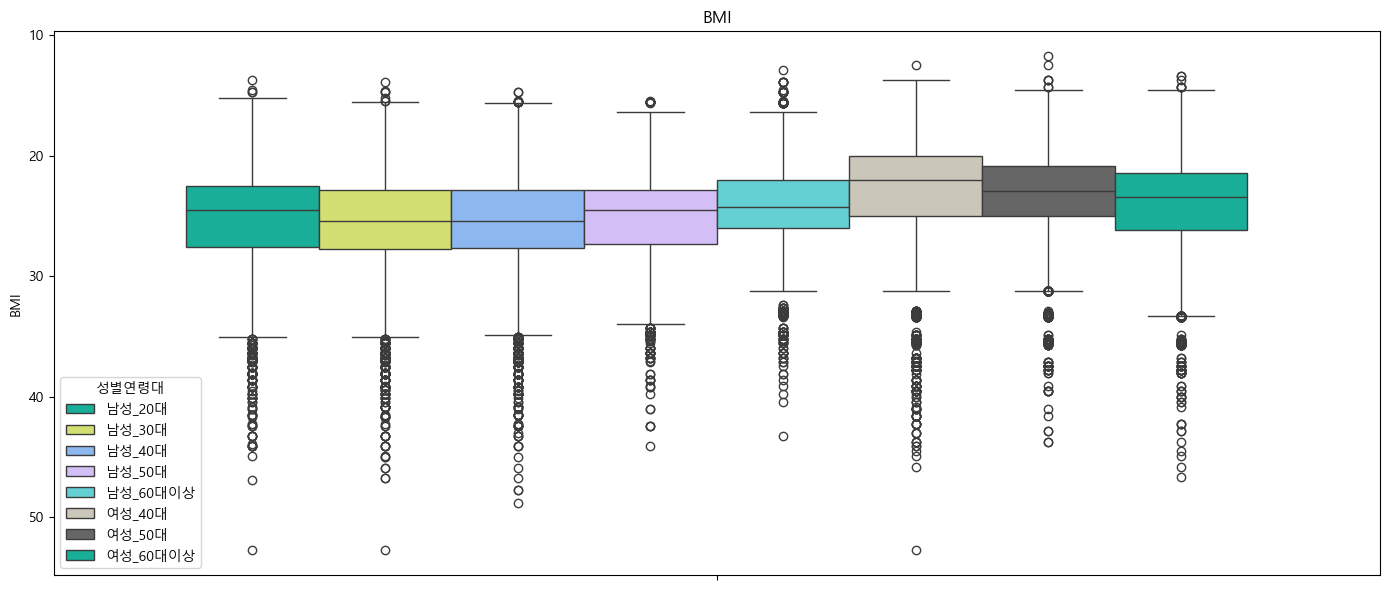

In [24]:
# iM 컬러 HEX 코드
im_palette = {
    '남성_20대': '#00C7A9',  # iM Mint
    '남성_30대': '#E2F15E',  # iM Lime
    '남성_40대': '#7DB5FF',  # iM Blue
    '남성_50대': '#D1B5FF',  # iM Purple
    '남성_60대이상': '#53E1E5',  # iM Light Blue
    '여성_40대': '#CDC9B7',  # iM Beige
    '여성_50대': '#666666',  # iM Gray
    '여성_60대이상': '#00C7A9'  # 중복 시 다른 색 지정 가능
}

for col in cont_col:
    if col=='요단백':continue
    plt.figure(figsize=(14, 6))
    plt.title(col)
    sns.boxplot(data=df1, y=col, hue='성별연령대', palette=im_palette)
    plt.tight_layout()
    plt.show()

## cluster

- 군집 1은 군집 0에 비해 여성 비율이 더 높음
- 군집 1은 군집 0보다 음주 비율지 10%가량 낮음
- 군집 1이 군집 0보다 치아우식증, 치석이 2.5%, 3%가량 더 낮음
- 군집 1의 간질환여부가 월등히 약 30%가량 낮음
- 군집 1이 군집 0보다 빈혈군이 2%가량 낮음
- 군집 0의 경우, 1%를 제외한 모두가 이상지질혈증군임

신장질환군


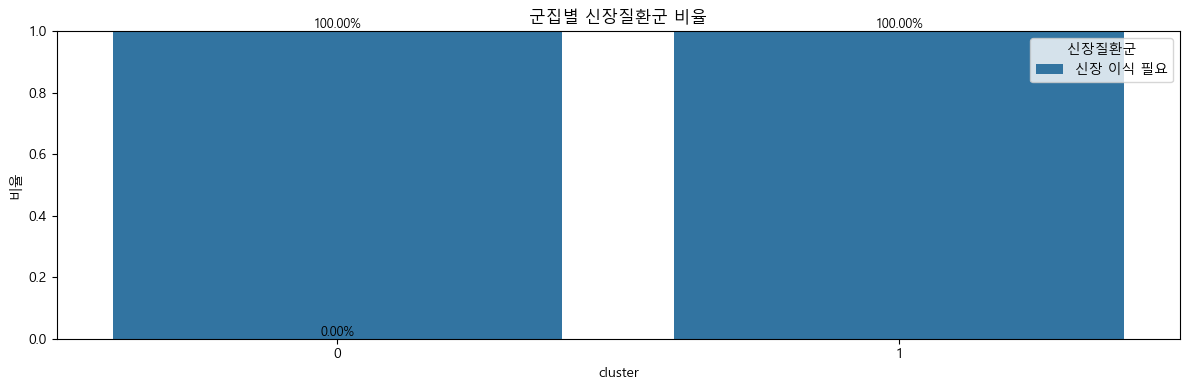

간질환군


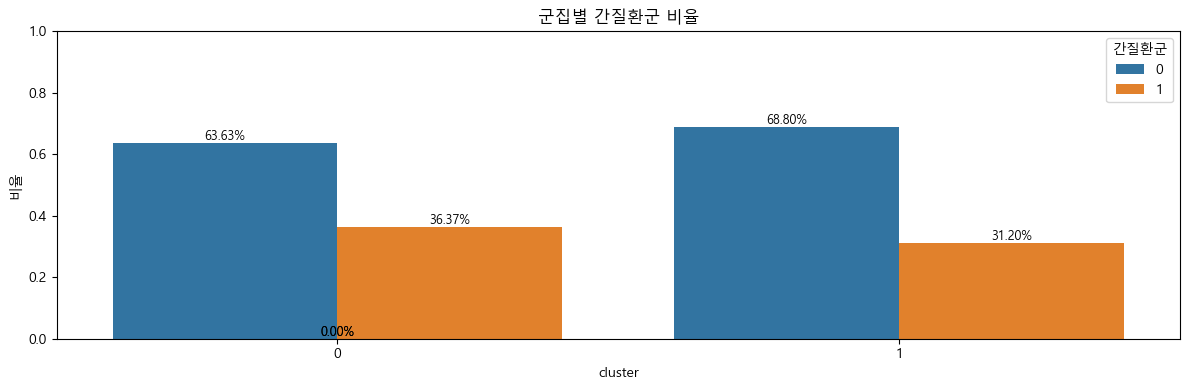

고혈압군


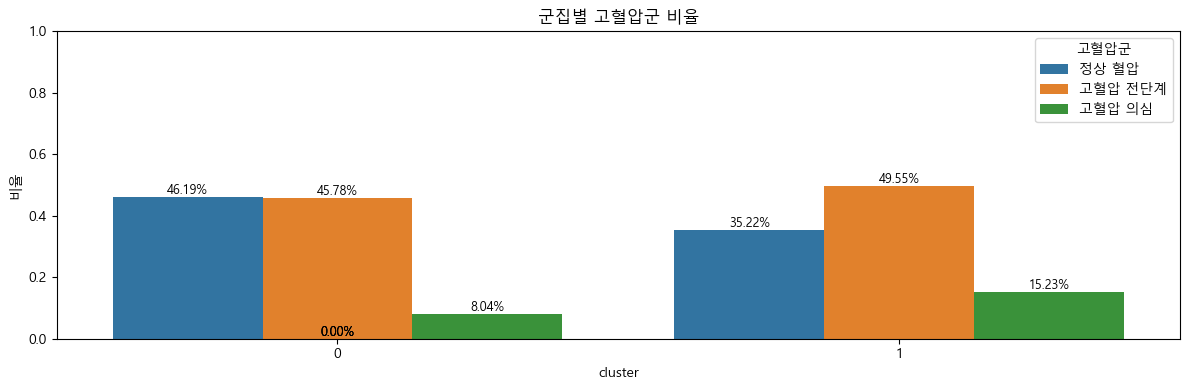

빈혈군


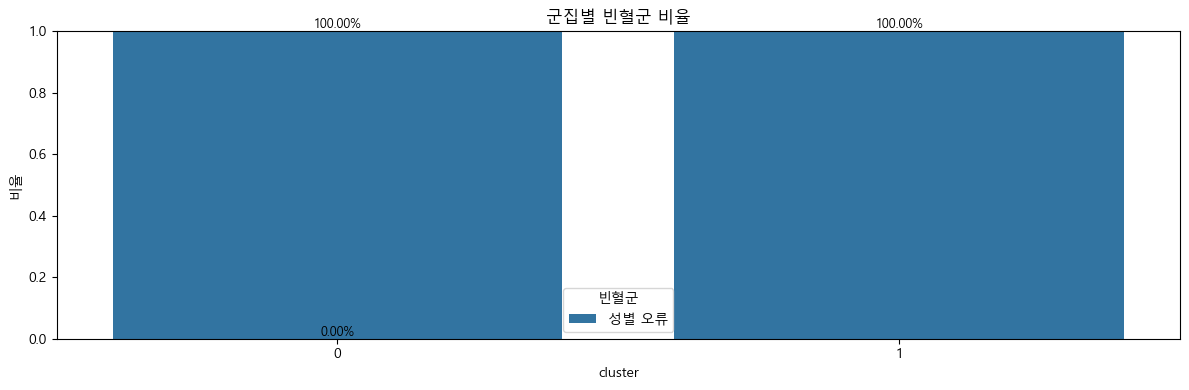

당뇨군


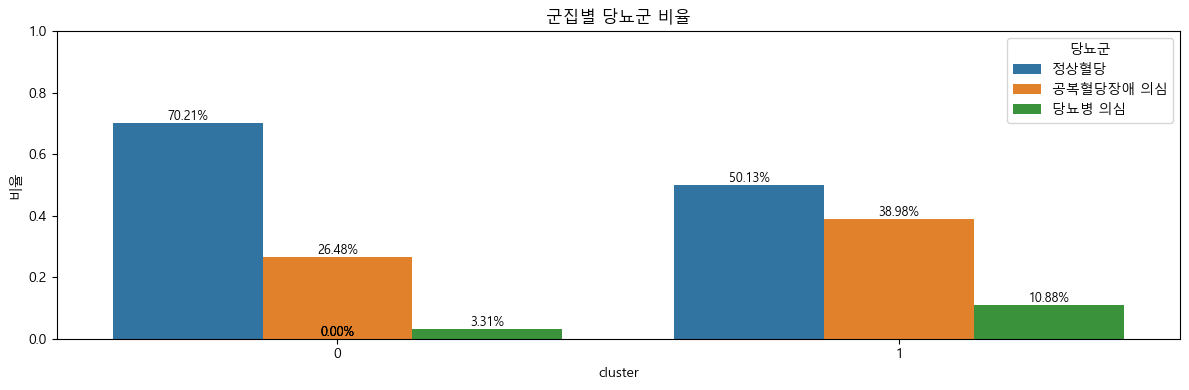

In [32]:
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.family']='Malgun Gothic'

for col in ['신장질환군', '간질환군', '고혈압군', '빈혈군', '당뇨군']:
    print(col)
    
    # 군집별 범주 비율 테이블 생성
    ratio = (
        df1.groupby('cluster')[col]
        .value_counts(normalize=True)
        .rename('비율')
        .reset_index()
    )

    # 시각화
    plt.figure(figsize=(12, 4))
    ax = sns.barplot(data=ratio, x='cluster', y='비율', hue=col)
    plt.title(f'군집별 {col} 비율')
    
    # 막대 위에 비율 표시
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2., height,
                f'{height:.2%}', ha='center', va='bottom', fontsize=9)
    
    plt.legend(title=col)
    plt.ylim(0, 1)  # 비율은 0~1
    plt.tight_layout()
    plt.show()

성별


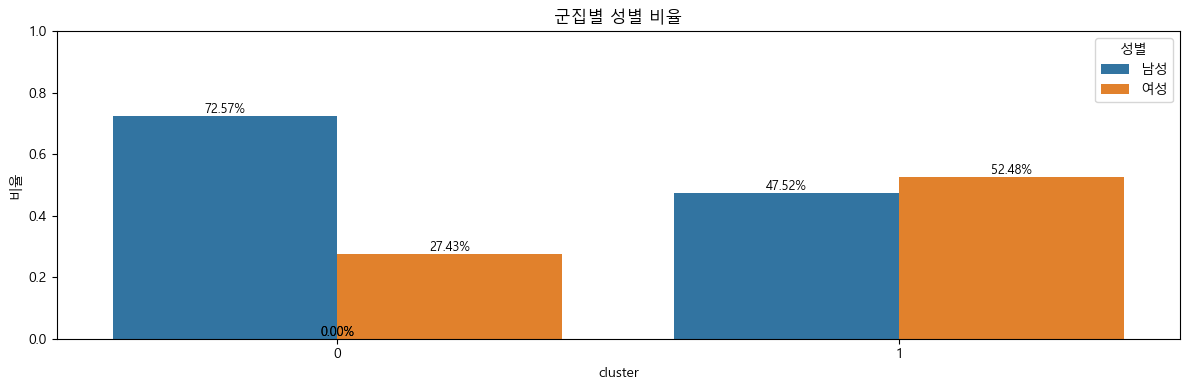

연령대


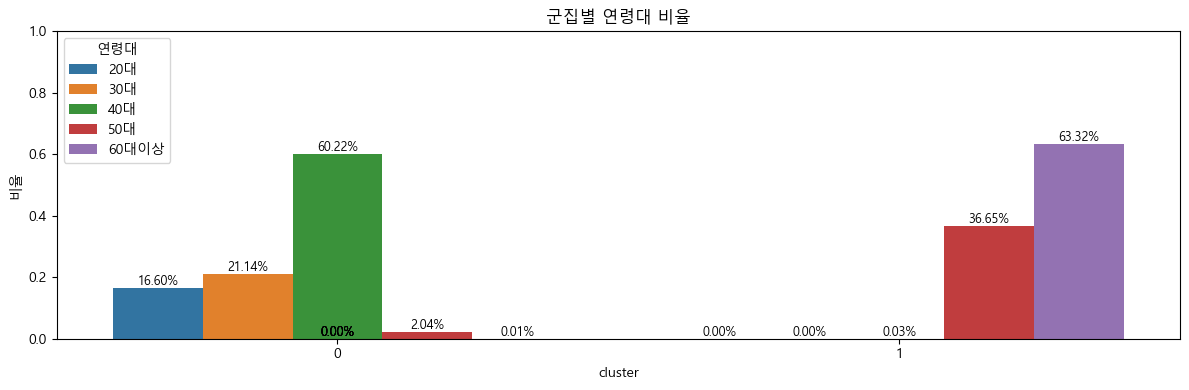

키


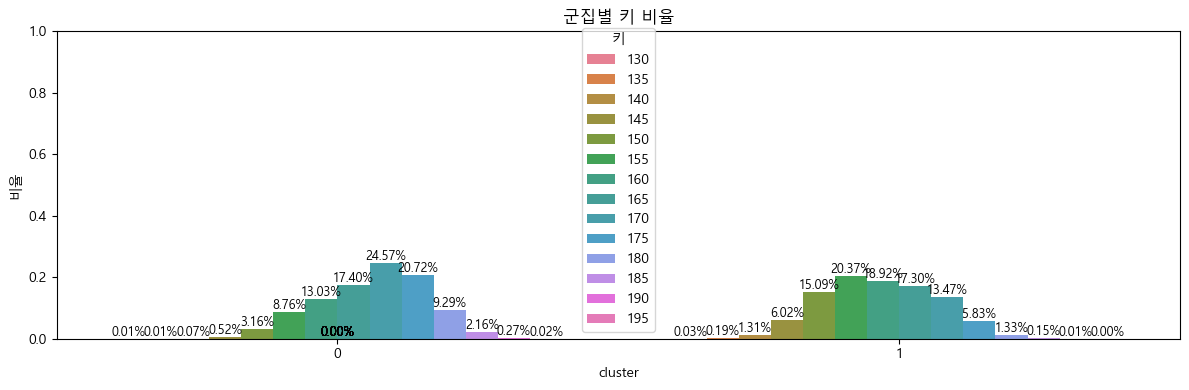

시력(좌)


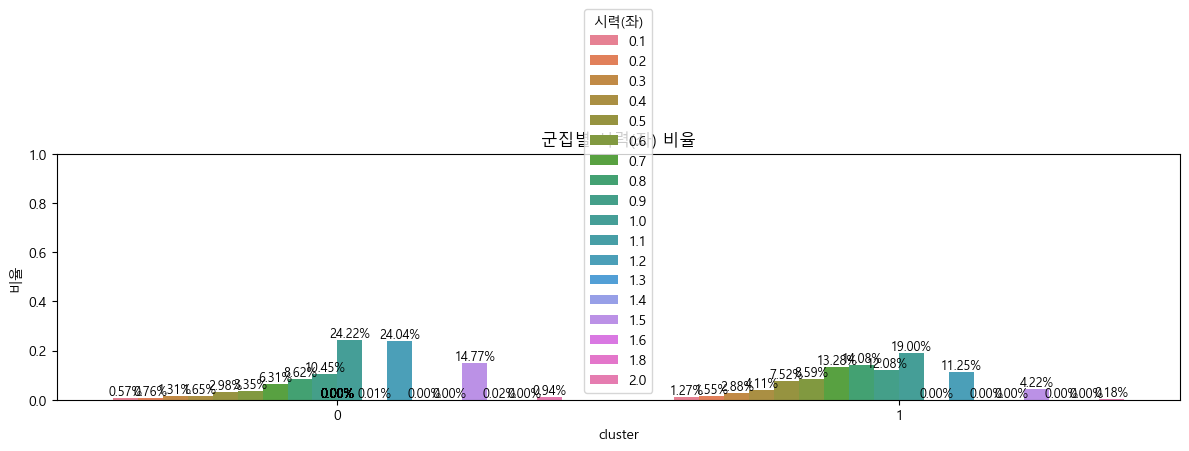

시력(우)


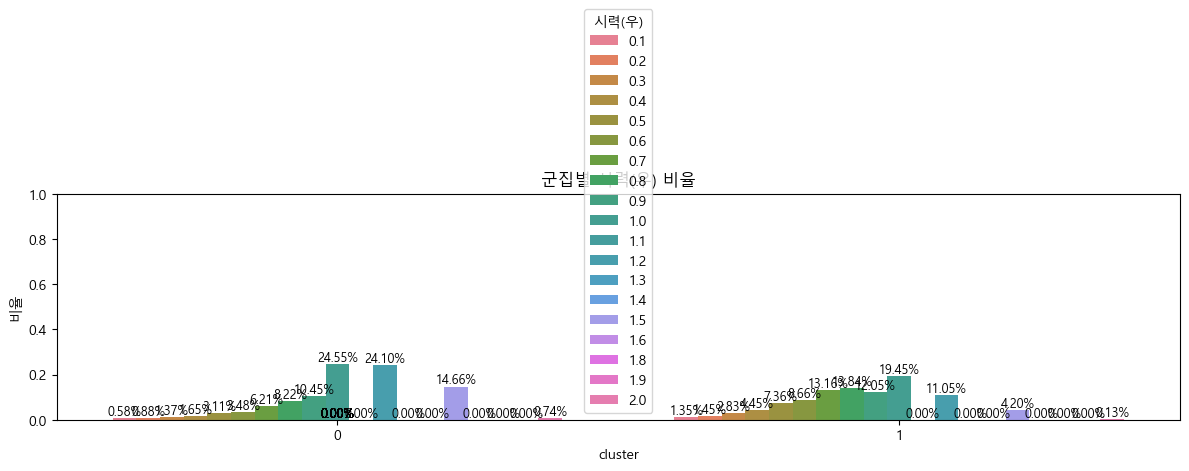

청력(좌)


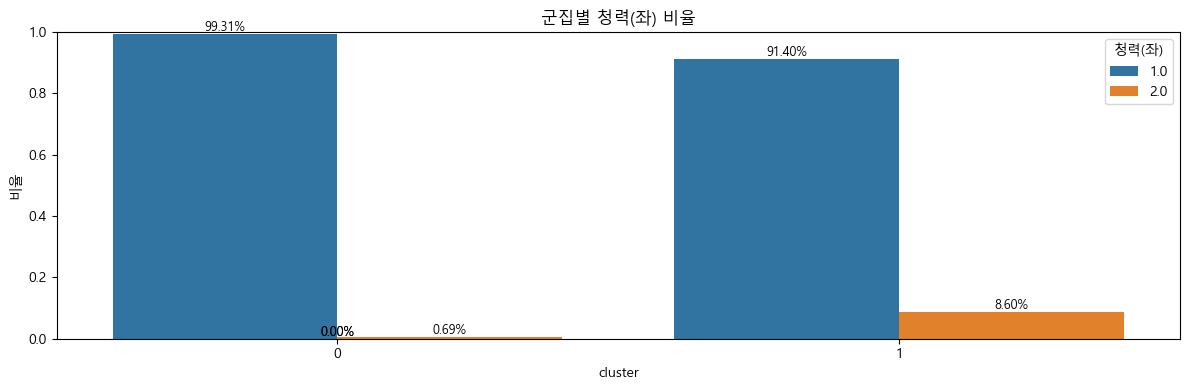

청력(우)


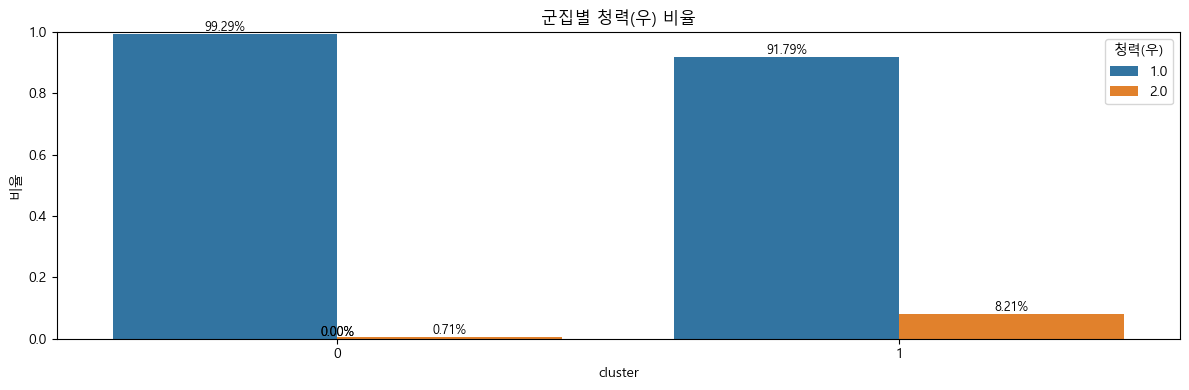

흡연상태


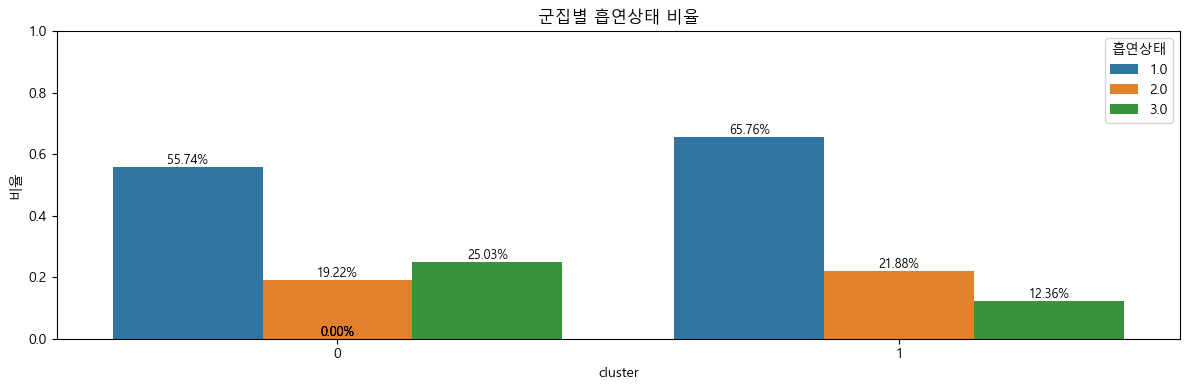

음주여부


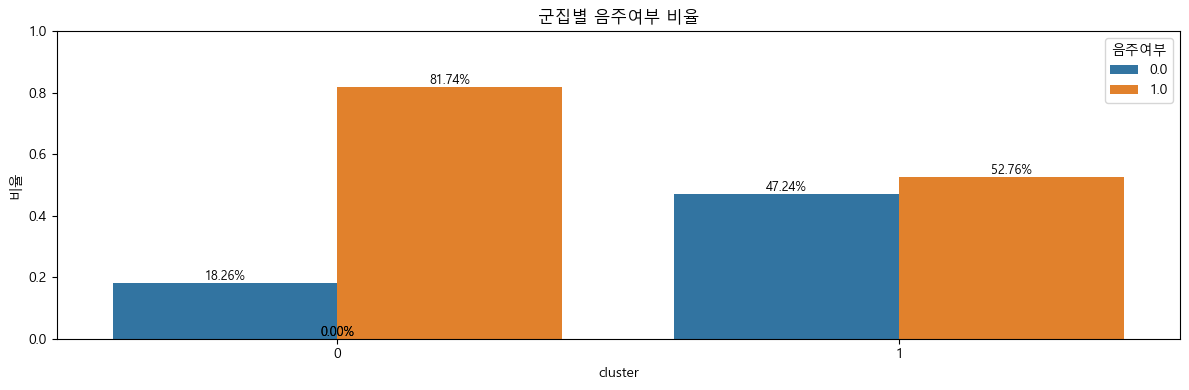

구강검진수검여부


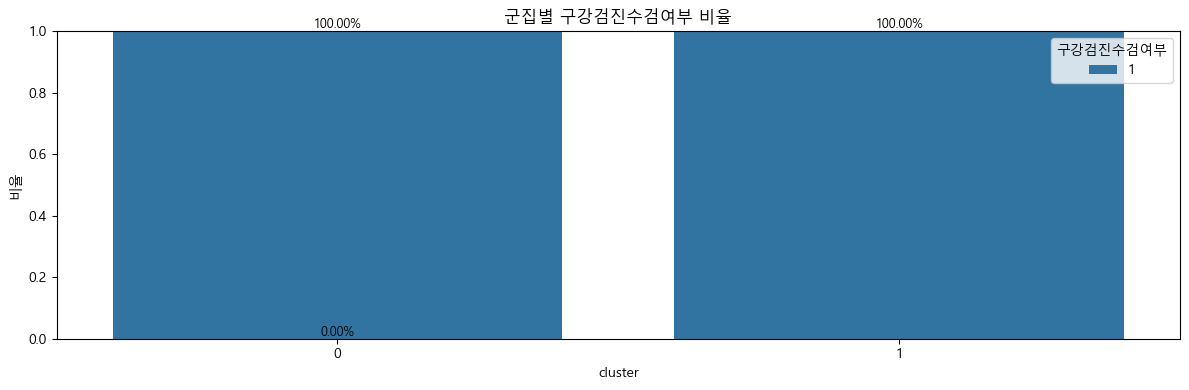

치아우식증유무


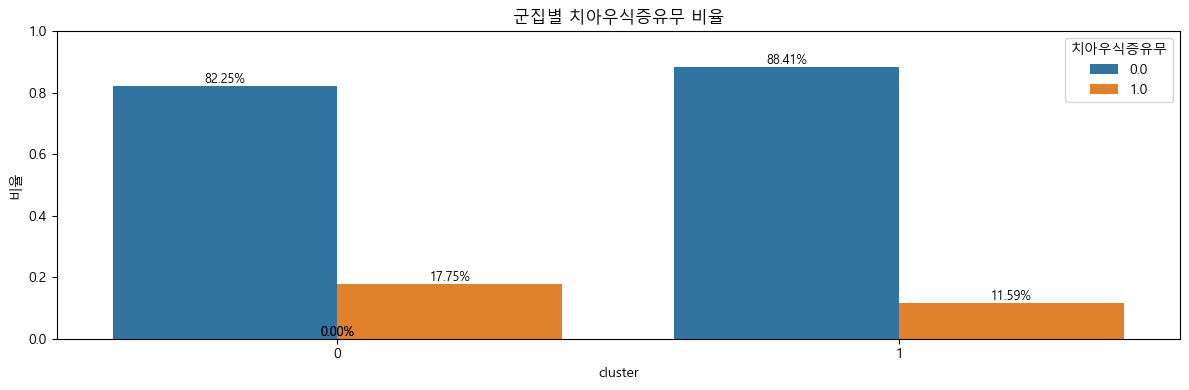

치석


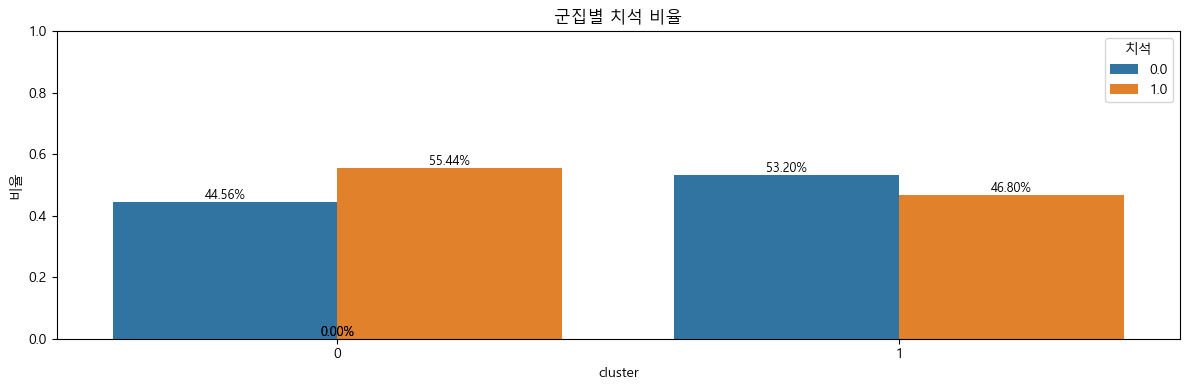

청력


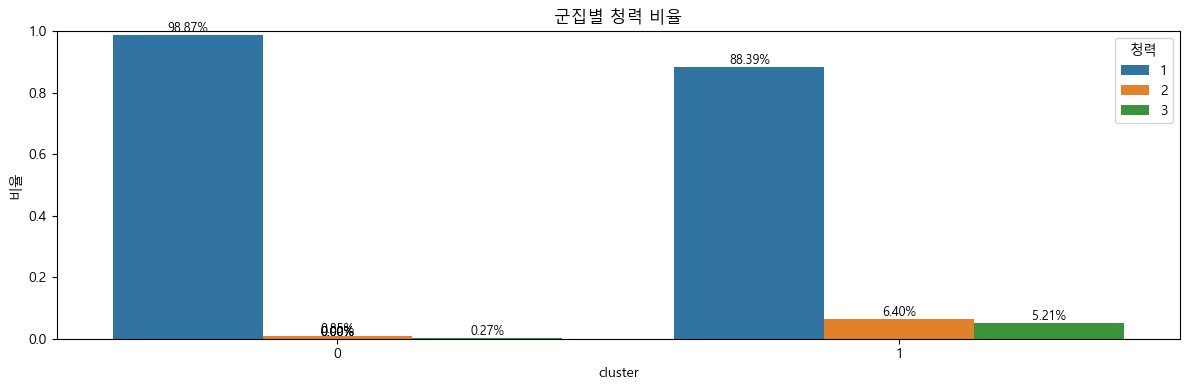

평균시력


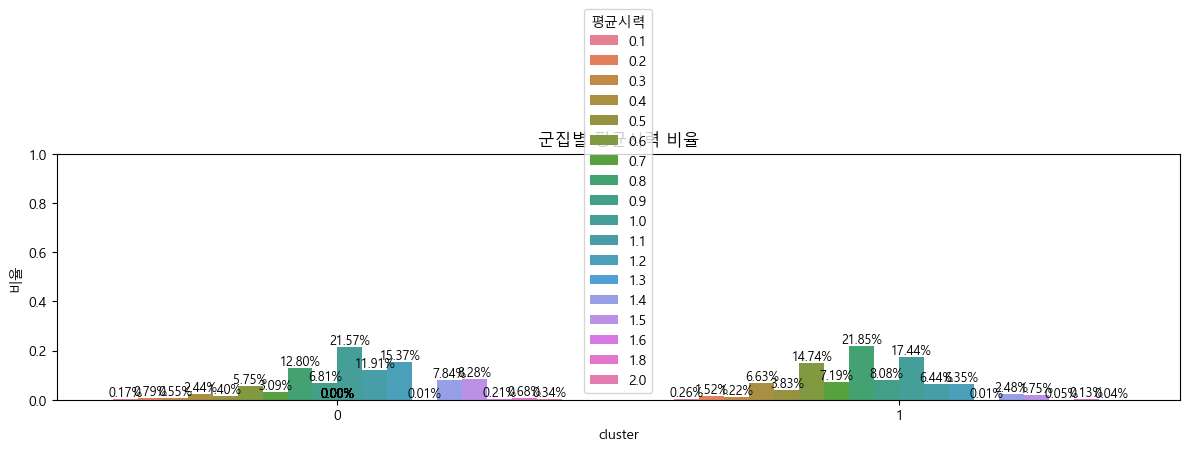

cluster


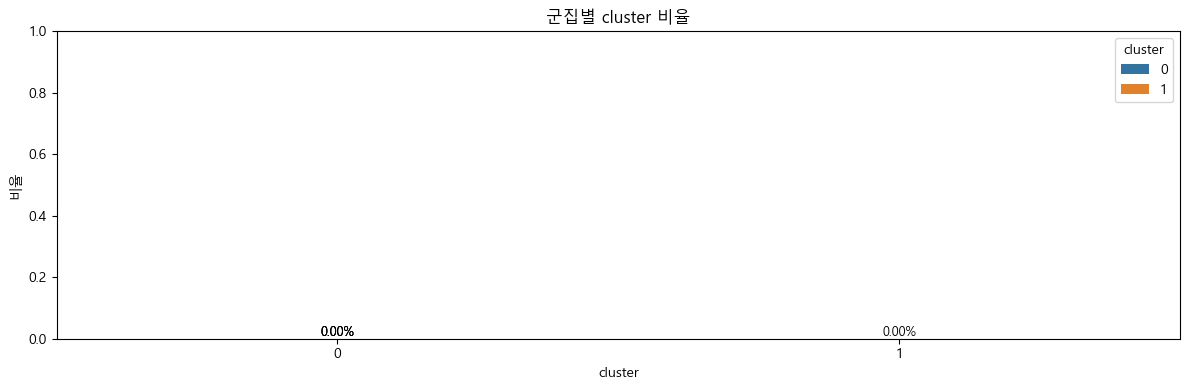

성별연령대


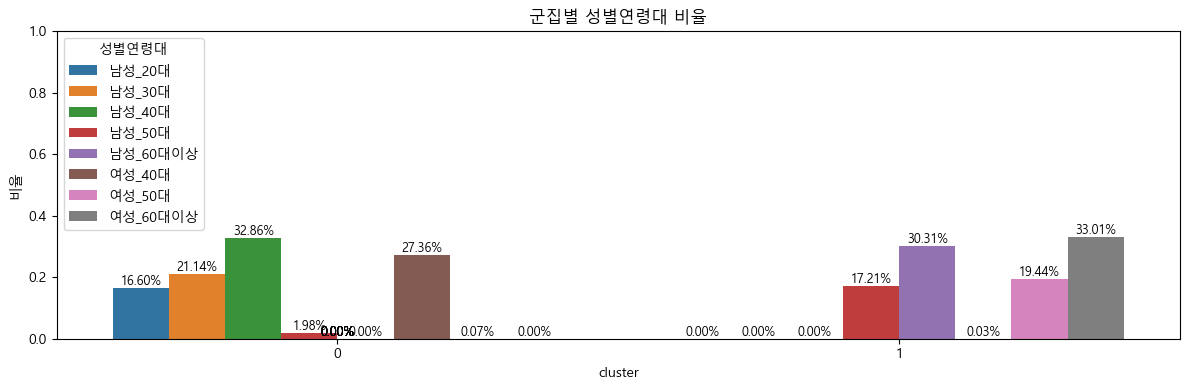

In [25]:
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.family']='Malgun Gothic'

for col in two_up:
    print(col)
    
    # 군집별 범주 비율 테이블 생성
    ratio = (
        df1.groupby('cluster')[col]
        .value_counts(normalize=True)
        .rename('비율')
        .reset_index()
    )

    # 시각화
    plt.figure(figsize=(12, 4))
    ax = sns.barplot(data=ratio, x='cluster', y='비율', hue=col)
    plt.title(f'군집별 {col} 비율')
    
    # 막대 위에 비율 표시
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2., height,
                f'{height:.2%}', ha='center', va='bottom', fontsize=9)
    
    plt.legend(title=col)
    plt.ylim(0, 1)  # 비율은 0~1
    plt.tight_layout()
    plt.show()

치석


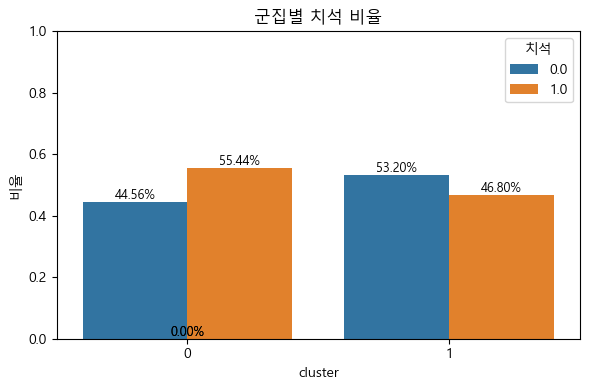

cluster


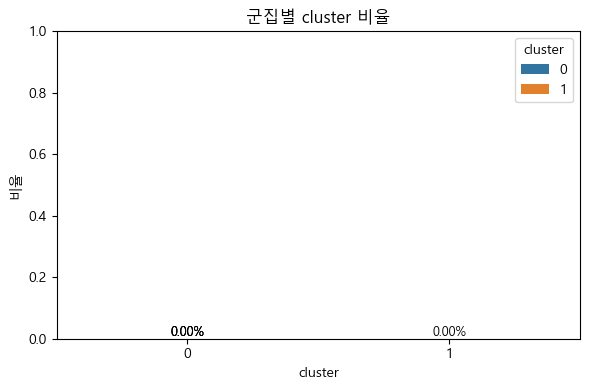

성별


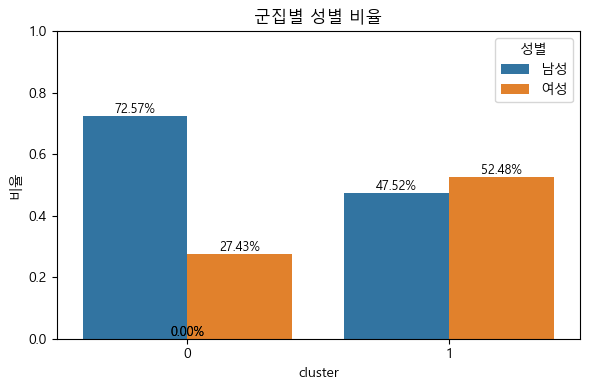

체중


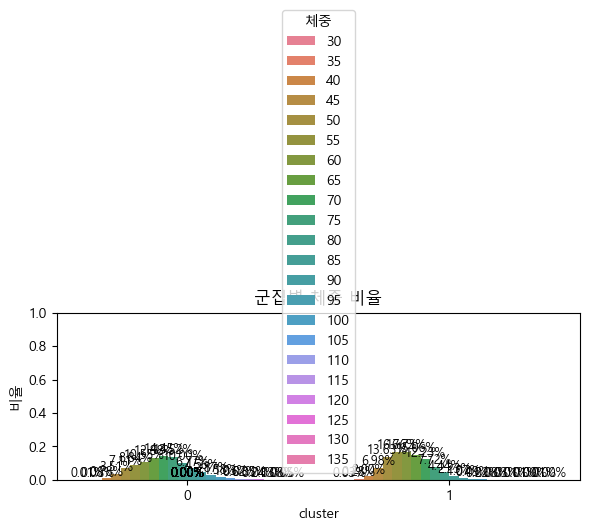

치아우식증유무


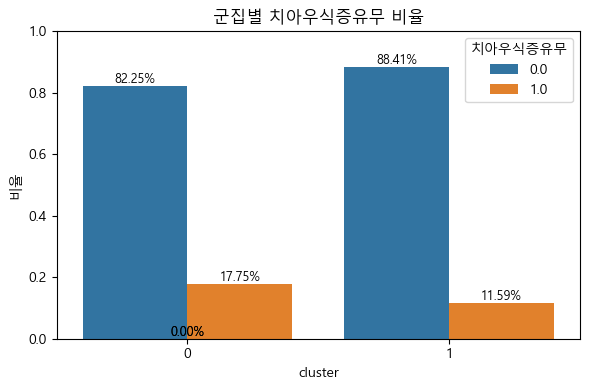

키


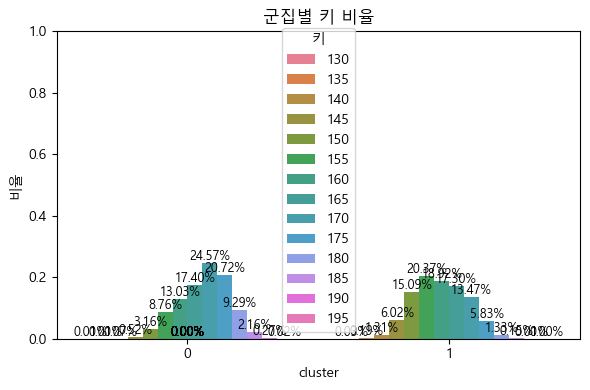

청력(좌)


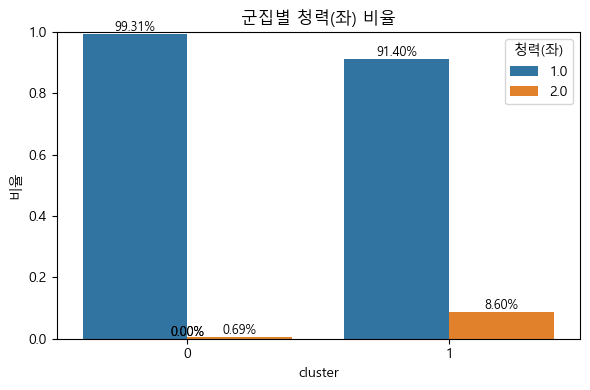

흡연상태


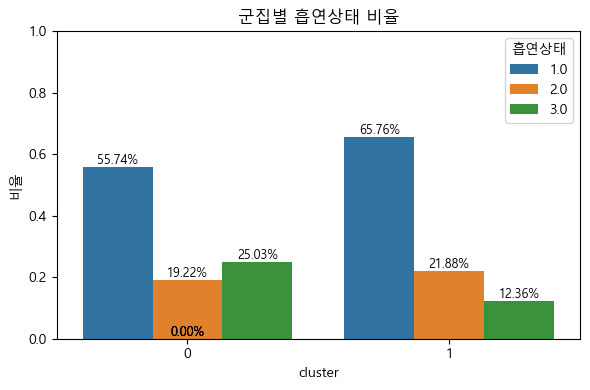

평균시력


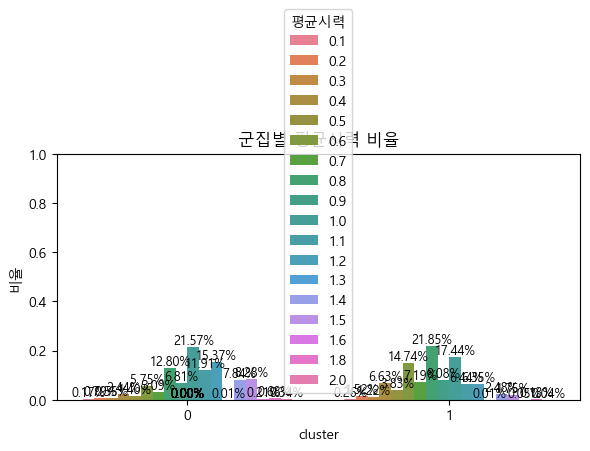

시력(좌)


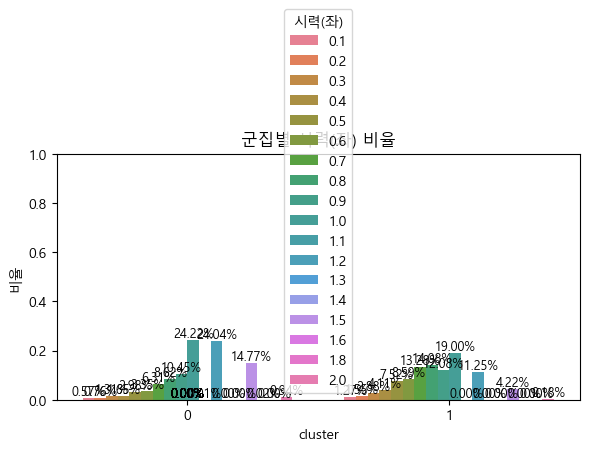

연령대


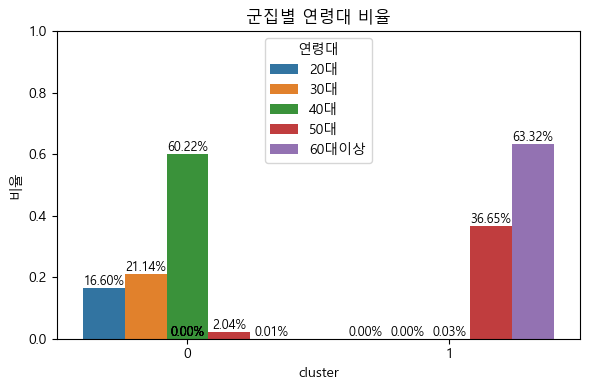

성별연령대


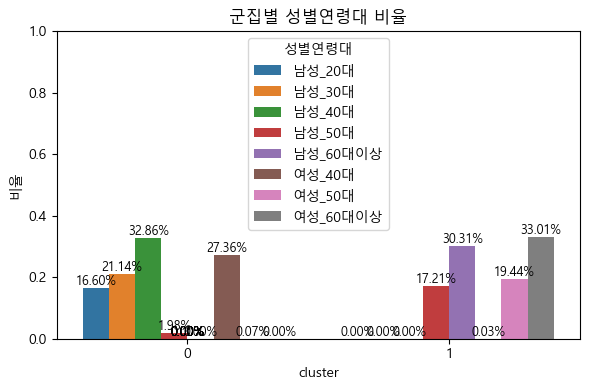

구강검진수검여부


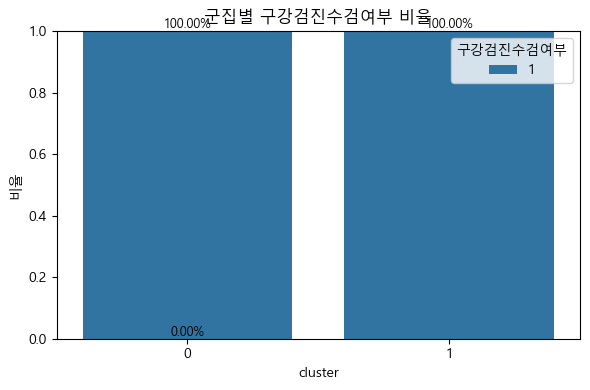

청력


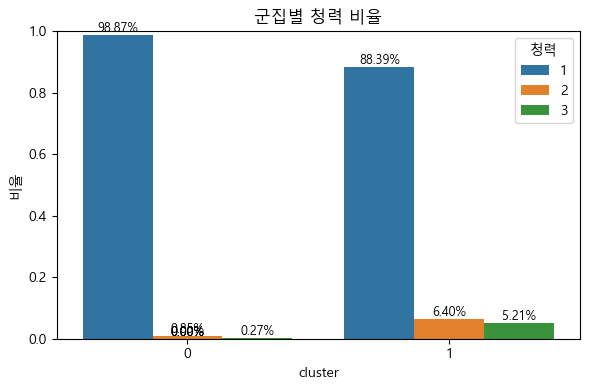

시력(우)


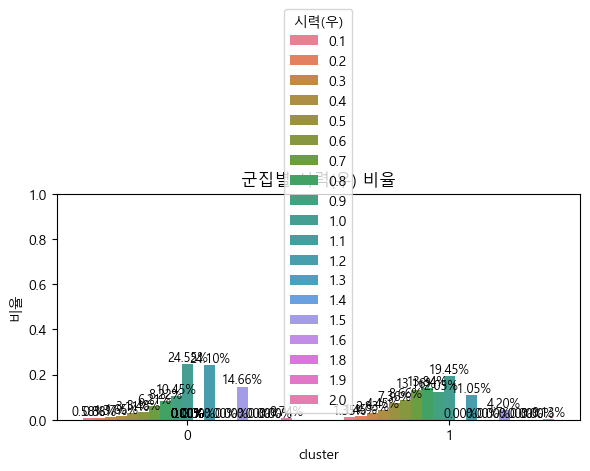

음주여부


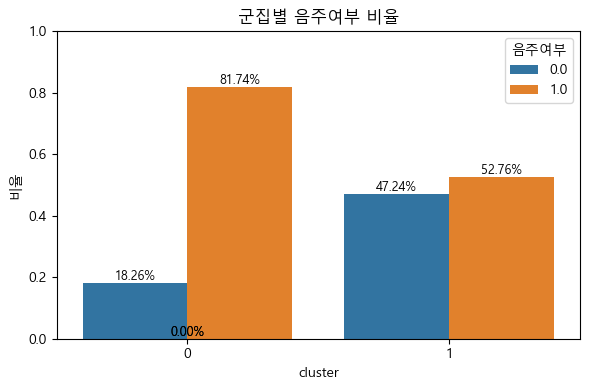

청력(우)


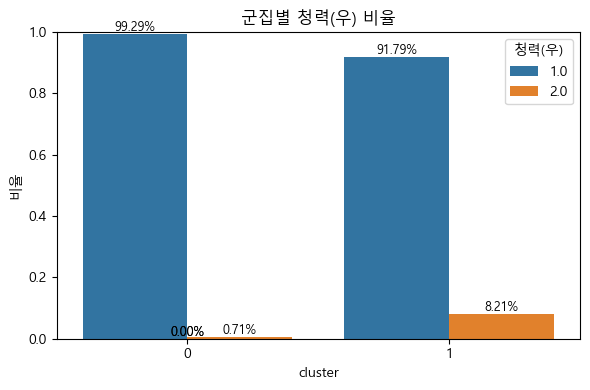

In [26]:
for col in cat_col:
    print(col)
    
    # 군집별 범주 비율 테이블 생성
    ratio = (
        df1.groupby('cluster')[col]
        .value_counts(normalize=True)
        .rename('비율')
        .reset_index()
    )

    # 시각화
    plt.figure(figsize=(6, 4))
    ax = sns.barplot(data=ratio, x='cluster', y='비율', hue=col)
    plt.title(f'군집별 {col} 비율')
    
    # 막대 위에 비율 표시
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2., height,
                f'{height:.2%}', ha='center', va='bottom', fontsize=9)
    
    plt.legend(title=col)
    plt.ylim(0, 1)  # 비율은 0~1
    plt.tight_layout()
    plt.show()

In [27]:
from IPython.display import display

for col in cat_col:
    if col=='cluster':continue
    print(f"\n[ 군집별 {col} 비율 테이블 ]")
    
    ratio = (
        df1.groupby('cluster')[col]
        .value_counts(normalize=True)
        .rename('비율')
        .reset_index()
        .pivot(index=col, columns='cluster', values='비율')
        .fillna(0)  # 비어 있는 값은 0으로
    )
    
    # 퍼센트 형식으로 표시
    styled_ratio = ratio.style.format("{:.1%}").background_gradient(axis=0, cmap='Blues')
    display(styled_ratio)


[ 군집별 치석 비율 테이블 ]



[ 군집별 성별 비율 테이블 ]



[ 군집별 체중 비율 테이블 ]



[ 군집별 치아우식증유무 비율 테이블 ]



[ 군집별 키 비율 테이블 ]



[ 군집별 청력(좌) 비율 테이블 ]



[ 군집별 흡연상태 비율 테이블 ]



[ 군집별 평균시력 비율 테이블 ]



[ 군집별 시력(좌) 비율 테이블 ]



[ 군집별 연령대 비율 테이블 ]



[ 군집별 성별연령대 비율 테이블 ]



[ 군집별 구강검진수검여부 비율 테이블 ]



[ 군집별 청력 비율 테이블 ]



[ 군집별 시력(우) 비율 테이블 ]



[ 군집별 음주여부 비율 테이블 ]



[ 군집별 청력(우) 비율 테이블 ]


In [131]:
use_col = ['허리둘레',
 '수축기혈압',
 '이완기혈압',
 '식전혈당(공복혈당)',
 '총콜레스테롤']

In [132]:
from IPython.display import display
import pandas as pd

for col in use_col:
    if col == 'cluster':
        continue

    print(f"\n[ 군집별 {col} 분포 테이블 (최소~최대 기준 5구간) ]")

    # 최소~최대 기준 5개 구간으로 나누기 (등간격 구간화)
    df1[f'{col}_bin'] = pd.cut(df1[col], bins=10)

    ratio = (
        df1.groupby('cluster')[f'{col}_bin']
        .value_counts(normalize=True)
        .rename('비율')
        .reset_index()
        .pivot(index=f'{col}_bin', columns='cluster', values='비율')
        .fillna(0)
    )

    styled_ratio = ratio.style.format("{:.1%}").background_gradient(axis=0, cmap='Blues')
    display(styled_ratio)


[ 군집별 허리둘레 분포 테이블 (최소~최대 기준 5구간) ]



[ 군집별 수축기혈압 분포 테이블 (최소~최대 기준 5구간) ]



[ 군집별 이완기혈압 분포 테이블 (최소~최대 기준 5구간) ]



[ 군집별 식전혈당(공복혈당) 분포 테이블 (최소~최대 기준 5구간) ]



[ 군집별 총콜레스테롤 분포 테이블 (최소~최대 기준 5구간) ]


- 음주 비율은 차이가 없는 걸 봐서, 단순히 음주 여부보다 음주의 강도와 잦은 빈도가 더 연관성이 클 듯-> 현재는 확인 불가

In [118]:
for col in cont_col:
    print(col)
    print(df1.groupby('cluster')[col].mean())

허리둘레
cluster
0    87.842944
1    80.945100
Name: 허리둘레, dtype: float64
수축기혈압
cluster
0    126.188312
1    121.408252
Name: 수축기혈압, dtype: float64
이완기혈압
cluster
0    78.571784
1    74.199937
Name: 이완기혈압, dtype: float64
식전혈당(공복혈당)
cluster
0    106.690004
1     98.958530
Name: 식전혈당(공복혈당), dtype: float64
총콜레스테롤
cluster
0    213.444109
1    191.421750
Name: 총콜레스테롤, dtype: float64
트리글리세라이드
cluster
0    213.633644
1     89.295518
Name: 트리글리세라이드, dtype: float64
HDL콜레스테롤
cluster
0    48.521782
1    58.888044
Name: HDL콜레스테롤, dtype: float64
LDL콜레스테롤
cluster
0    122.627817
1    114.726227
Name: LDL콜레스테롤, dtype: float64
혈색소
cluster
0    14.937178
1    14.133451
Name: 혈색소, dtype: float64
요단백
cluster
0    1.152451
1    1.110794
Name: 요단백, dtype: float64
혈청크레아티닌
cluster
0    0.913236
1    0.862958
Name: 혈청크레아티닌, dtype: float64
혈청지오티(AST)
cluster
0    32.105913
1    25.841112
Name: 혈청지오티(AST), dtype: float64
혈청지피티(ALT)
cluster
0    38.654998
1    23.967898
Name: 혈청지피티(ALT), dtype: float64
감마지티피
cluster


In [133]:
for col in cont_col:
    print(col)
    print(df1.groupby('cluster')[col].median())

허리둘레
cluster
0    87.0
1    81.0
Name: 허리둘레, dtype: float64
수축기혈압
cluster
0    126.0
1    120.0
Name: 수축기혈압, dtype: float64
이완기혈압
cluster
0    79.0
1    74.0
Name: 이완기혈압, dtype: float64
식전혈당(공복혈당)
cluster
0    100.0
1     96.0
Name: 식전혈당(공복혈당), dtype: float64
총콜레스테롤
cluster
0    213.0
1    191.0
Name: 총콜레스테롤, dtype: float64
트리글리세라이드
cluster
0    197.0
1     87.0
Name: 트리글리세라이드, dtype: float64
HDL콜레스테롤
cluster
0    47.0
1    57.0
Name: HDL콜레스테롤, dtype: float64
LDL콜레스테롤
cluster
0    122.0
1    114.0
Name: LDL콜레스테롤, dtype: float64
혈색소
cluster
0    15.1
1    14.2
Name: 혈색소, dtype: float64
요단백
cluster
0    1.0
1    1.0
Name: 요단백, dtype: float64
혈청크레아티닌
cluster
0    0.9
1    0.8
Name: 혈청크레아티닌, dtype: float64
혈청지오티(AST)
cluster
0    26.0
1    23.0
Name: 혈청지오티(AST), dtype: float64
혈청지피티(ALT)
cluster
0    29.0
1    20.0
Name: 혈청지피티(ALT), dtype: float64
감마지티피
cluster
0    39.0
1    21.0
Name: 감마지티피, dtype: float64
사구체여과율
cluster
0    90.878589
1    90.878589
Name: 사구체여과율, dtype: float64


# 2030여성


In [33]:
df1 = df2.copy()

In [34]:
two=[]
two_up=[]
cont_col=[]
for col in df1.columns:
    if df1[col].nunique()==2: two.append(col)
    if df1[col].nunique()<20: print(col,df1[col].unique()); two_up.append(col)
    else: cont_col.append(col)

성별 ['여성']
연령대 ['60대이상']
요단백 [1. 2. 3. 4. 5. 6.]
흡연상태 [1. 3. 2.]
음주여부 [1. 0.]
BMI구분 [1 2 4 3 6 5]
청력 [1 2 3]
평균시력 [1.1 1.2 0.8 1.  0.9 1.5 0.7 1.4 0.6 0.3 1.8 0.2 0.4 0.5 0.1 1.6 2.  1.3
 1.7]
new_연령대 ['20대' '30대']
cluster [0 2 1]
사구체여과율 [nan]
신장질환군 ['신장 이식 필요']
간질환군 [0 1]
고혈압군 ['정상 혈압' '고혈압 전단계' '고혈압 의심']
빈혈군 ['성별 오류']
당뇨군 ['정상혈당' '공복혈당장애 의심' '당뇨병 의심']
성별연령대 ['여성_20대' '여성_30대']


In [35]:
df1.columns

Index(['성별', '연령대', '허리둘레', '수축기혈압', '이완기혈압', '식전혈당(공복혈당)', '혈색소', '요단백',
       '혈청크레아티닌', '혈청지오티(AST)', '혈청지피티(ALT)', '감마지티피', '흡연상태', '음주여부', 'BMI구분',
       '청력', '평균시력', 'new_연령대', 'cluster', '사구체여과율', '신장질환군', '간질환군', '고혈압군',
       '빈혈군', '당뇨군', '성별연령대'],
      dtype='object')

In [36]:
cont_col=['허리둘레', '수축기혈압', '이완기혈압', '식전혈당(공복혈당)', '혈색소', '요단백',
       '혈청크레아티닌', '혈청지오티(AST)', '혈청지피티(ALT)', '감마지티피',
       '청력', '평균시력', '사구체여과율']
cat_col = set(df1.columns)-set(cont_col)
cat_col=list(cat_col)
for col in cat_col:
    df1[col]= pd.Categorical(df1[col])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121307 entries, 0 to 121306
Data columns (total 26 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   성별          121307 non-null  category
 1   연령대         121307 non-null  category
 2   허리둘레        121307 non-null  float64 
 3   수축기혈압       121307 non-null  float64 
 4   이완기혈압       121307 non-null  float64 
 5   식전혈당(공복혈당)  121307 non-null  float64 
 6   혈색소         121307 non-null  float64 
 7   요단백         121307 non-null  float64 
 8   혈청크레아티닌     121307 non-null  float64 
 9   혈청지오티(AST)  121307 non-null  float64 
 10  혈청지피티(ALT)  121307 non-null  float64 
 11  감마지티피       121307 non-null  float64 
 12  흡연상태        121307 non-null  category
 13  음주여부        121307 non-null  category
 14  BMI구분       121307 non-null  category
 15  청력          121307 non-null  int64   
 16  평균시력        121307 non-null  float64 
 17  new_연령대     121307 non-null  category
 18  cluster     121307 non-null  

## 성별&연령대

In [58]:
from IPython.display import display

for col in cat_col:
    print(f"\n[ {col} vs 성별연령대 교차비율 (%)]")
    ctab = pd.crosstab(index=df1['cluster'], columns=df1[col], normalize='index') * 100
    styled = ctab.style.background_gradient(axis=0, cmap='Blues').format("{:.1f}%")
    display(styled)


[ cluster vs 성별연령대 교차비율 (%)]



[ new_연령대 vs 성별연령대 교차비율 (%)]



[ 성별 vs 성별연령대 교차비율 (%)]



[ 당뇨군 vs 성별연령대 교차비율 (%)]



[ 간질환군 vs 성별연령대 교차비율 (%)]



[ BMI구분 vs 성별연령대 교차비율 (%)]



[ 신장질환군 vs 성별연령대 교차비율 (%)]



[ 흡연상태 vs 성별연령대 교차비율 (%)]



[ 연령대 vs 성별연령대 교차비율 (%)]



[ 빈혈군 vs 성별연령대 교차비율 (%)]



[ 성별연령대 vs 성별연령대 교차비율 (%)]



[ 고혈압군 vs 성별연령대 교차비율 (%)]



[ 음주여부 vs 성별연령대 교차비율 (%)]


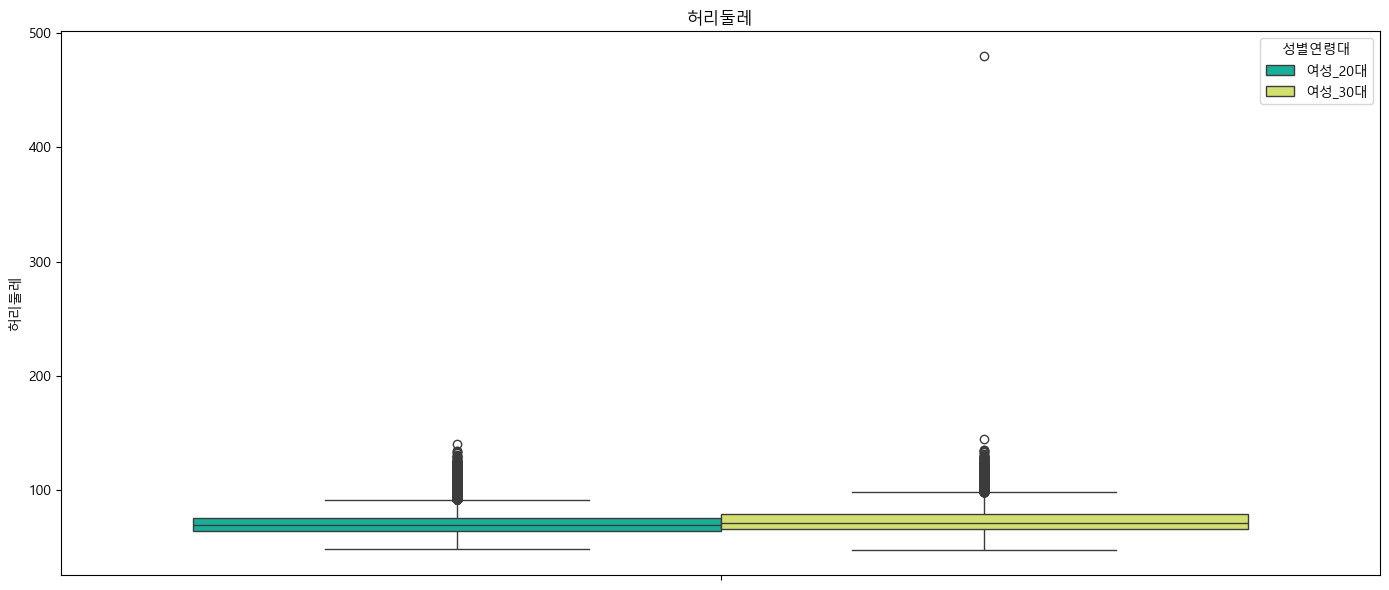

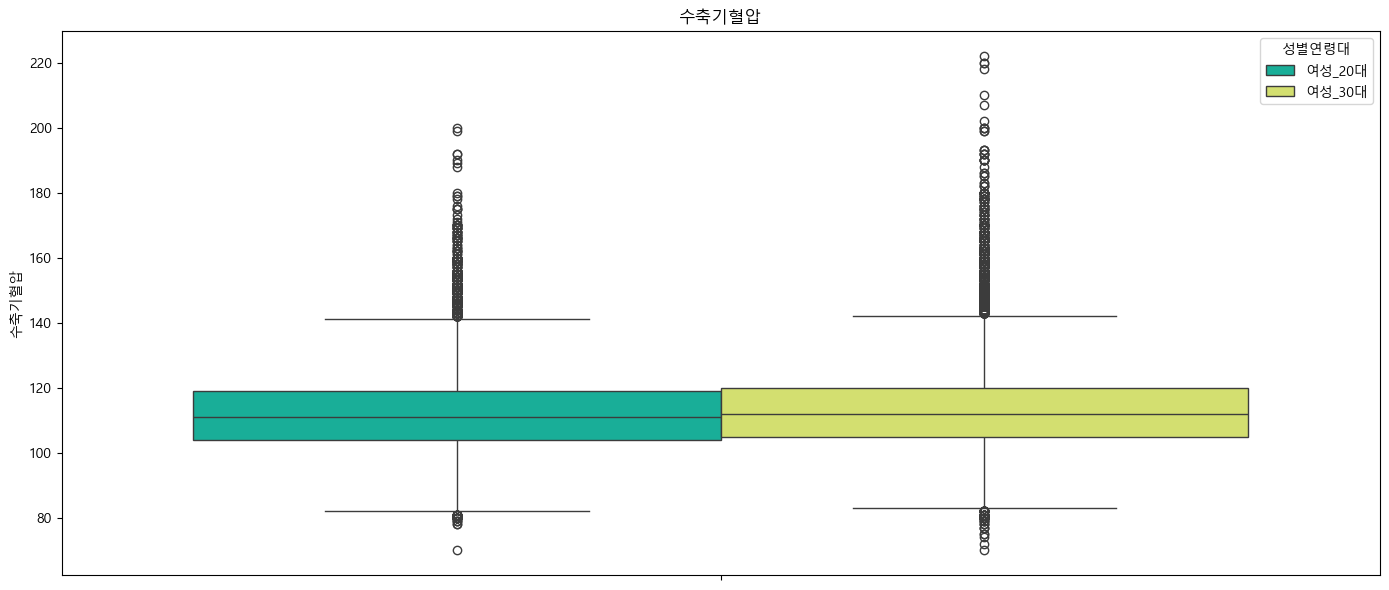

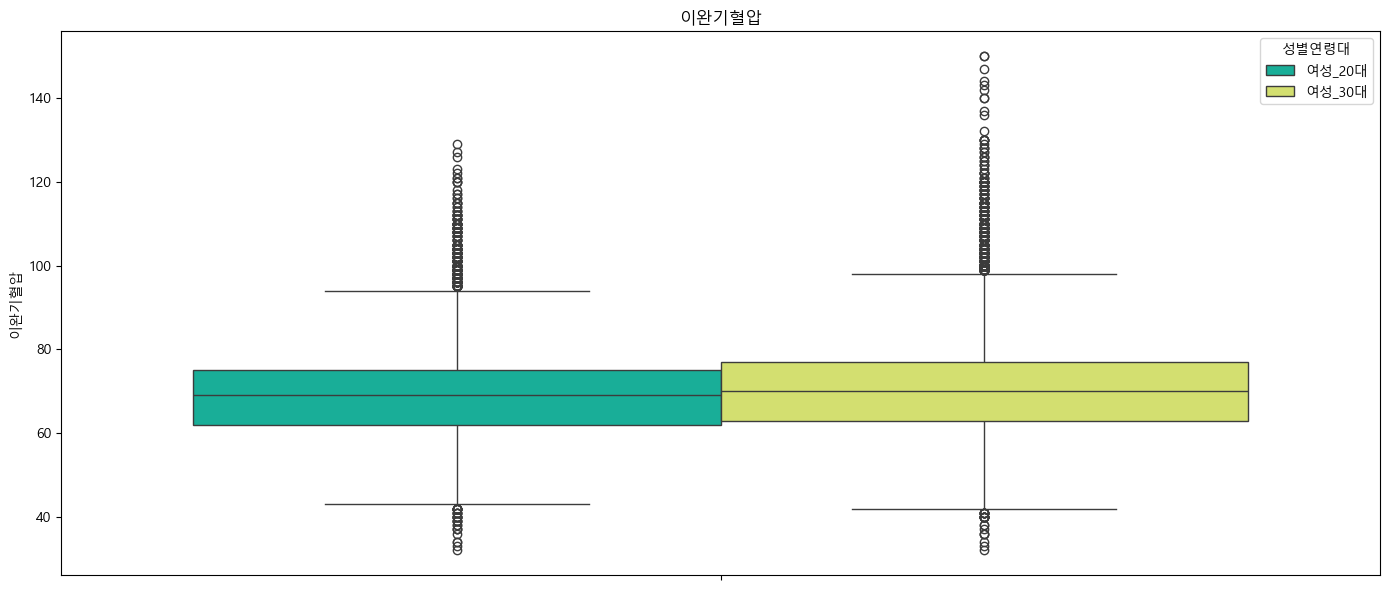

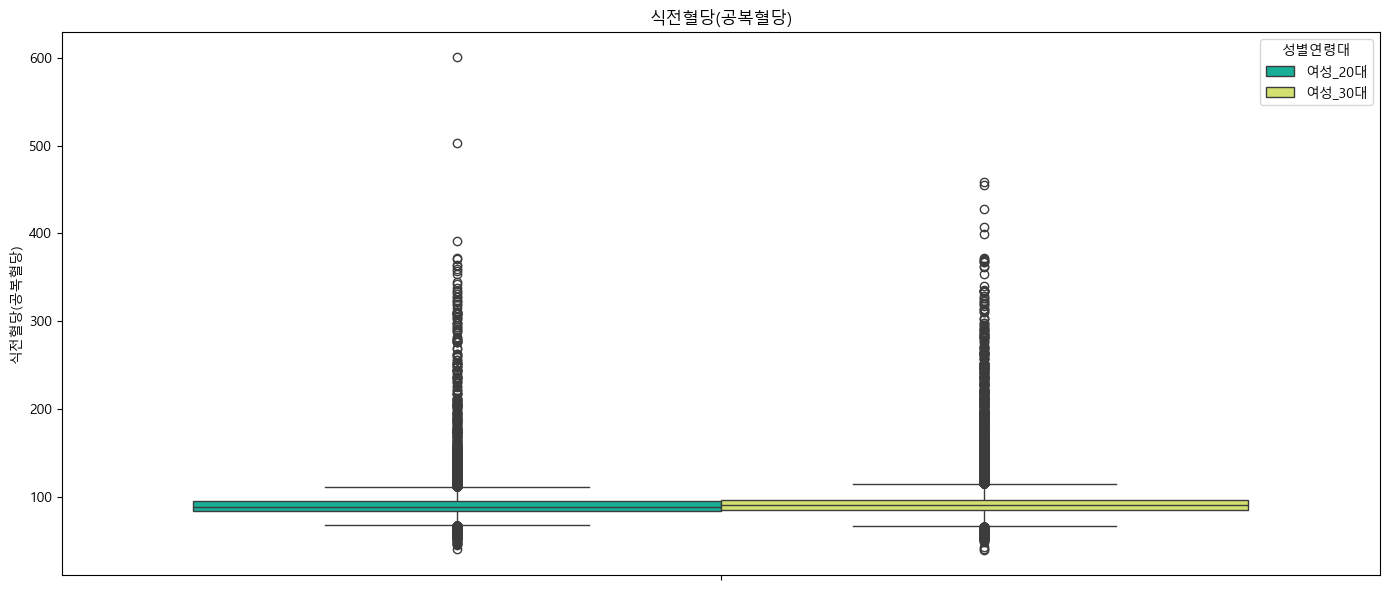

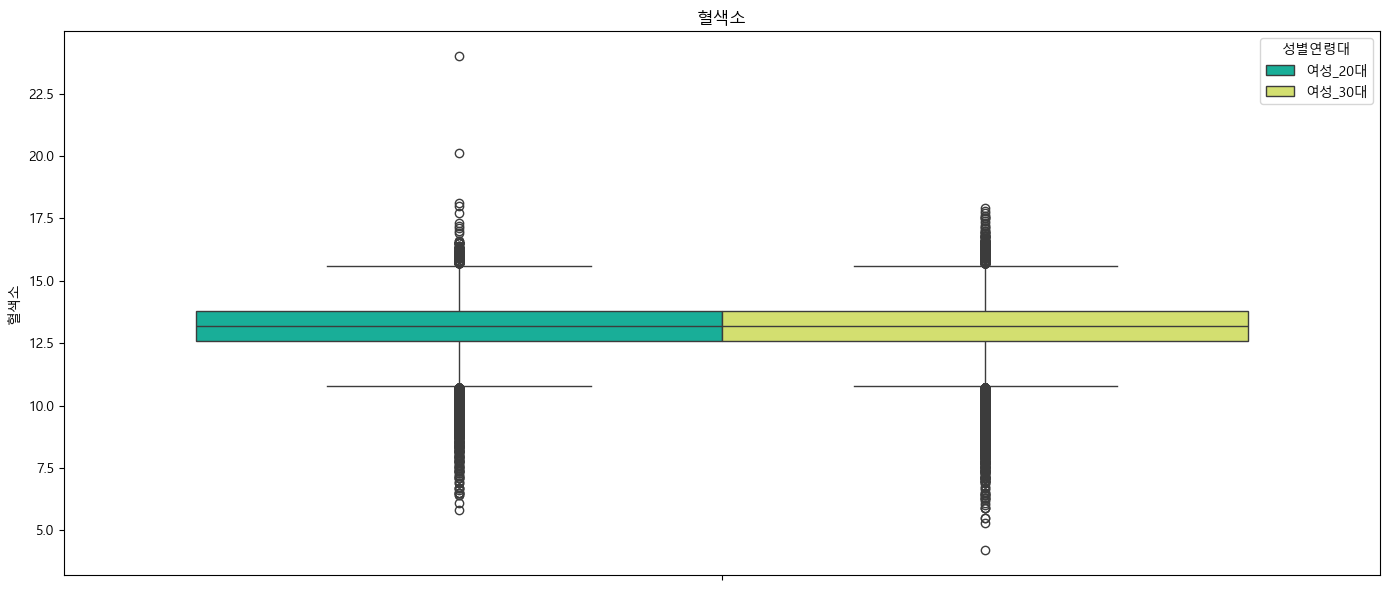

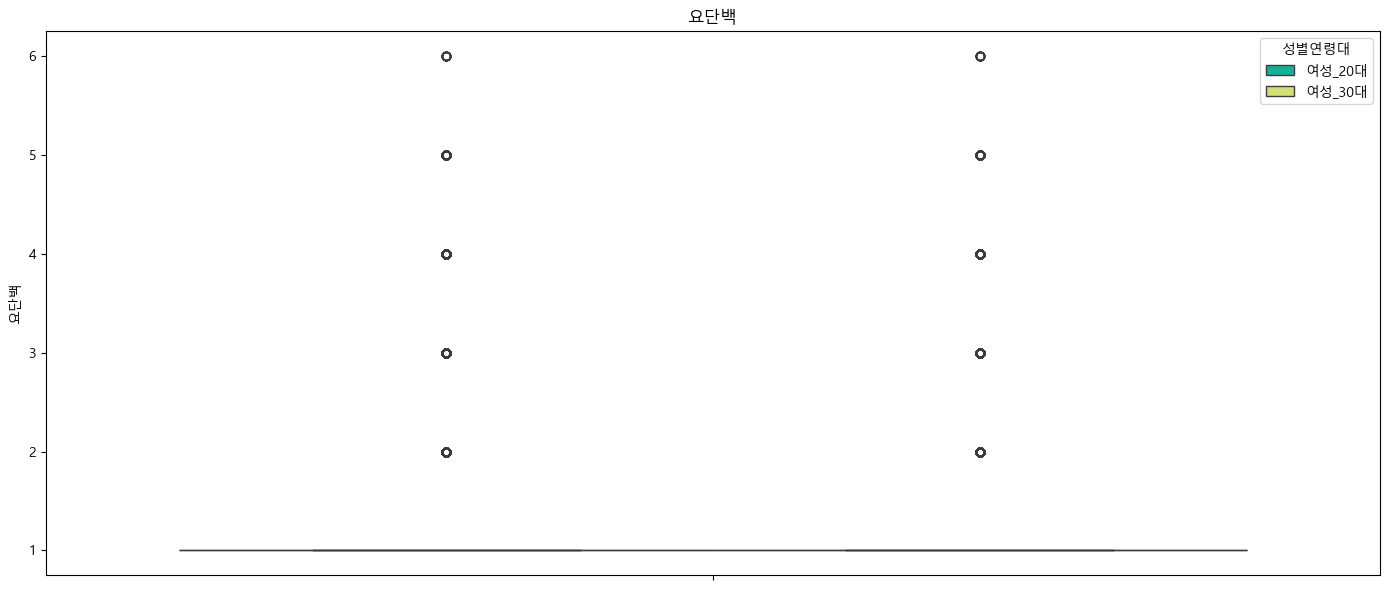

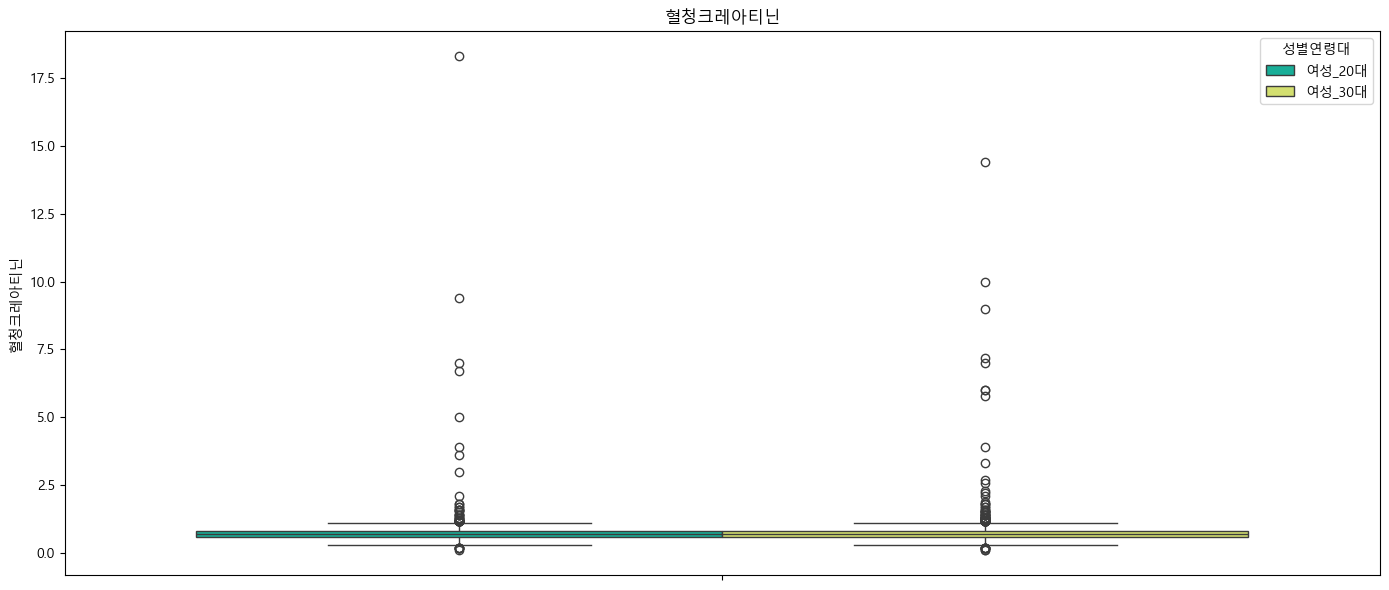

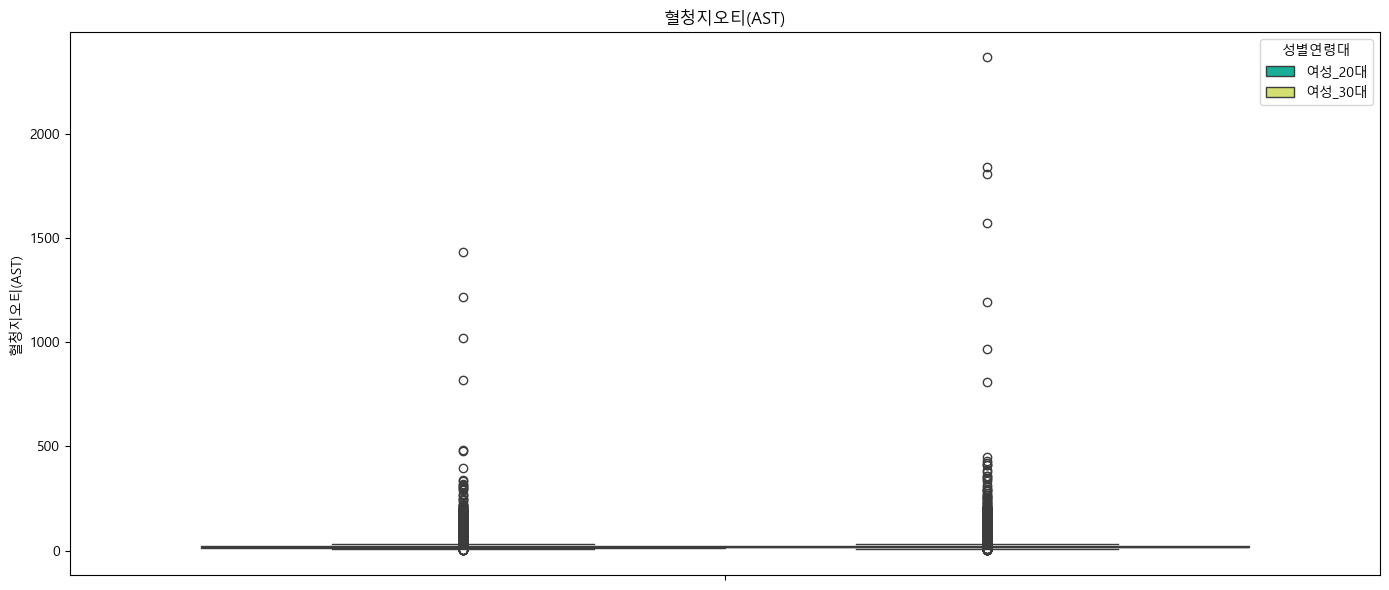

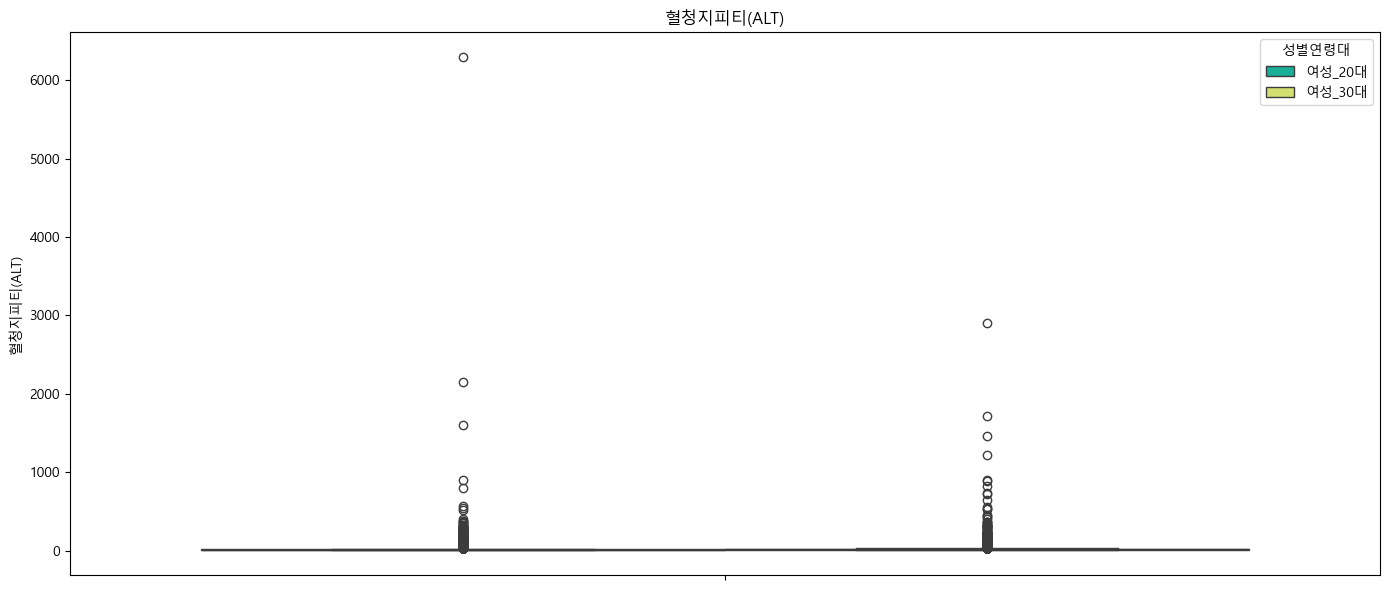

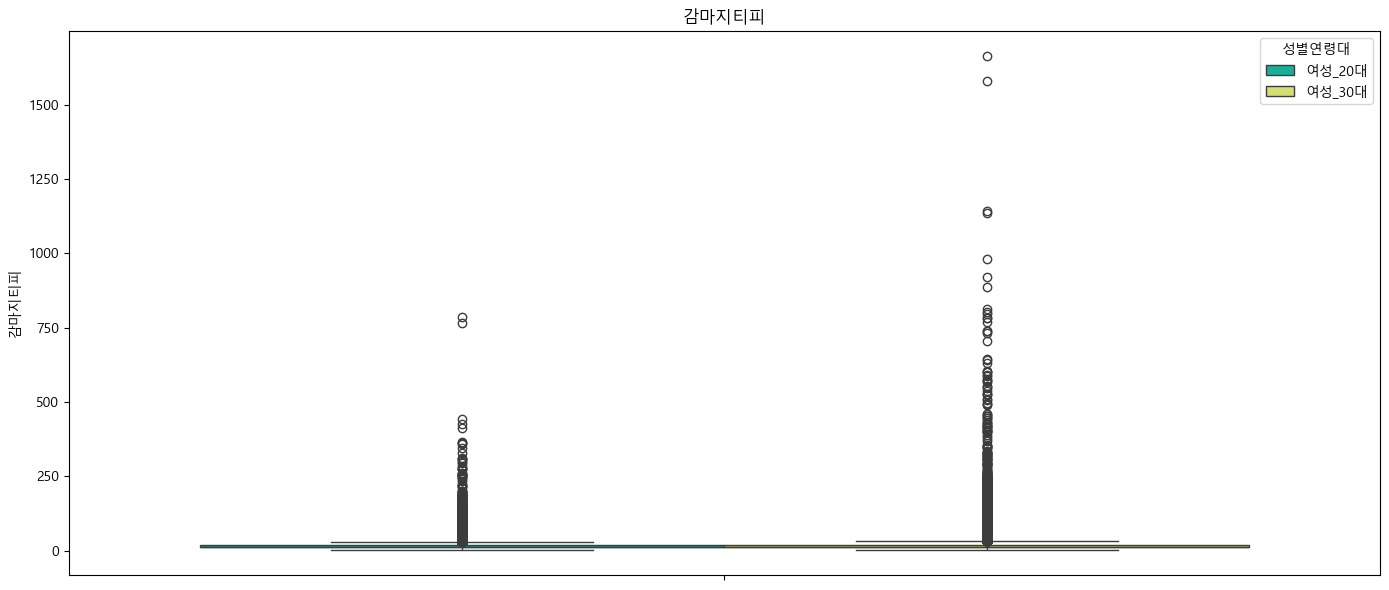

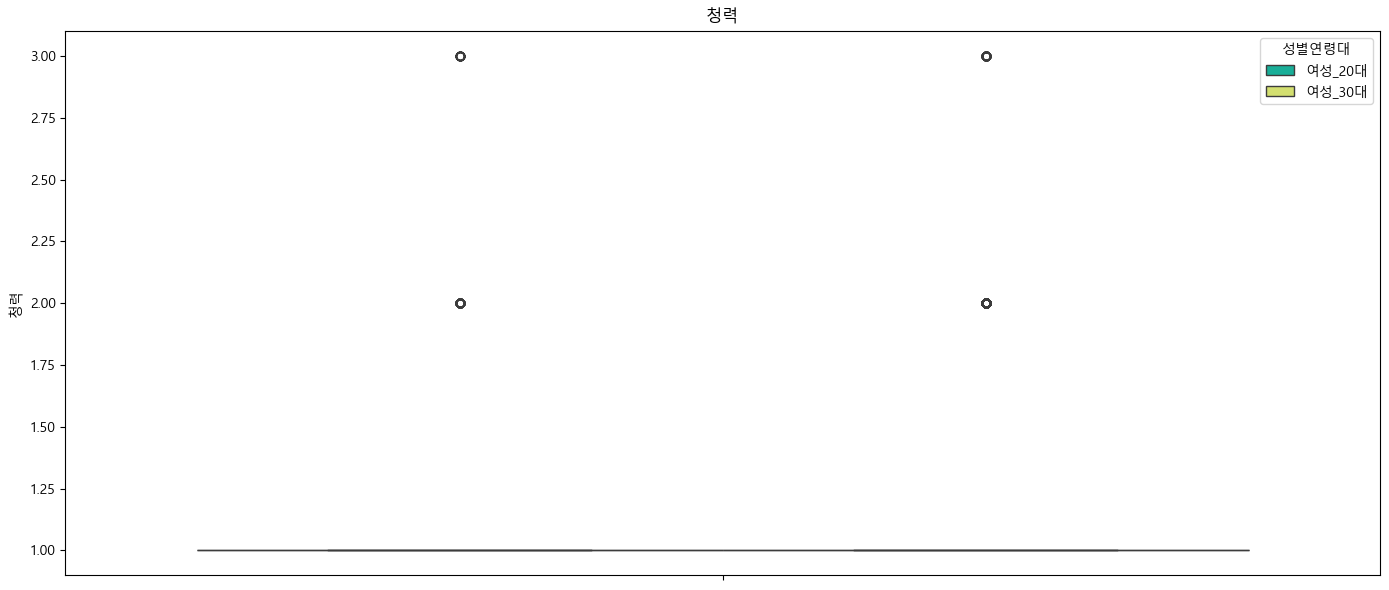

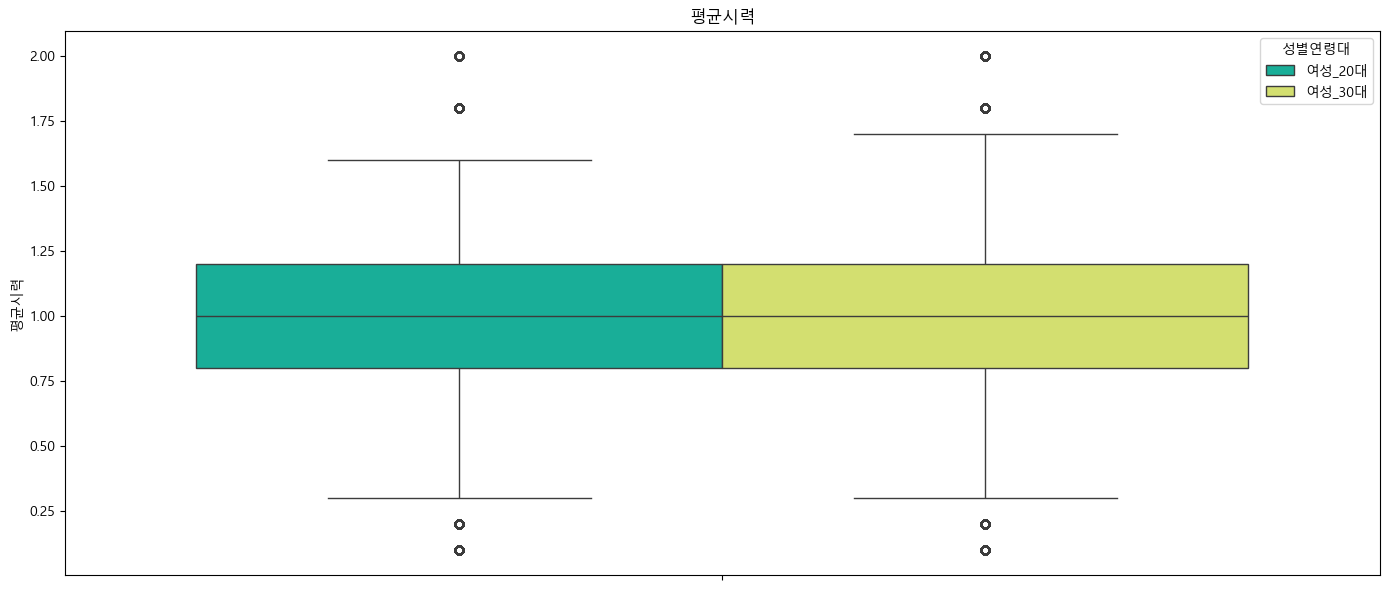

UnboundLocalError: cannot access local variable 'boxprops' where it is not associated with a value

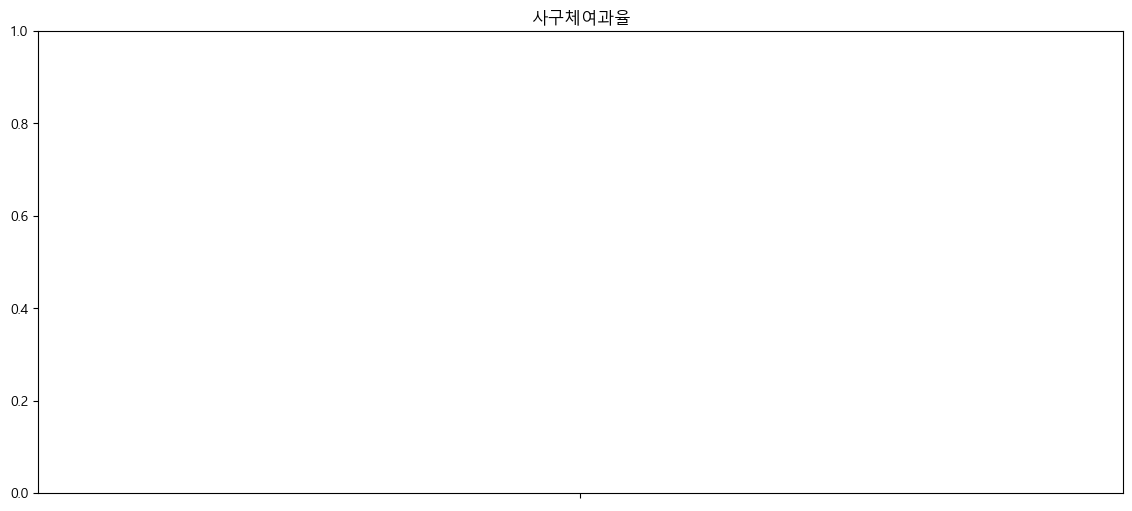

In [38]:
# iM 컬러 HEX 코드
im_palette = {
    '여성_20대': '#00C7A9',  # iM Mint
    '여성_30대': '#E2F15E',  # iM Lime
}

for col in cont_col:
    plt.figure(figsize=(14, 6))
    plt.title(col)
    sns.boxplot(data=df1, y=col, hue='성별연령대', palette=im_palette)
    plt.tight_layout()
    plt.show()

## cluster

In [ ]:
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.family']='Malgun Gothic'

for col in two_up:
    print(col)
    
    # 군집별 범주 비율 테이블 생성
    ratio = (
        df1.groupby('cluster')[col]
        .value_counts(normalize=True)
        .rename('비율')
        .reset_index()
    )

    # 시각화
    plt.figure(figsize=(12, 4))
    ax = sns.barplot(data=ratio, x='cluster', y='비율', hue=col)
    plt.title(f'군집별 {col} 비율')
    
    # 막대 위에 비율 표시
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2., height,
                f'{height:.2%}', ha='center', va='bottom', fontsize=9)
    
    plt.legend(title=col)
    plt.ylim(0, 1)  # 비율은 0~1
    plt.tight_layout()
    plt.show()

In [ ]:
for col in cat_col:
    print(col)
    
    # 군집별 범주 비율 테이블 생성
    ratio = (
        df1.groupby('cluster')[col]
        .value_counts(normalize=True)
        .rename('비율')
        .reset_index()
    )

    # 시각화
    plt.figure(figsize=(6, 4))
    ax = sns.barplot(data=ratio, x='cluster', y='비율', hue=col)
    plt.title(f'군집별 {col} 비율')
    
    # 막대 위에 비율 표시
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2., height,
                f'{height:.2%}', ha='center', va='bottom', fontsize=9)
    
    plt.legend(title=col)
    plt.ylim(0, 1)  # 비율은 0~1
    plt.tight_layout()
    plt.show()

In [ ]:
from IPython.display import display

for col in cat_col:
    if col=='cluster':continue
    print(f"\n[ 군집별 {col} 비율 테이블 ]")
    
    ratio = (
        df1.groupby('cluster')[col]
        .value_counts(normalize=True)
        .rename('비율')
        .reset_index()
        .pivot(index=col, columns='cluster', values='비율')
        .fillna(0)  # 비어 있는 값은 0으로
    )
    
    # 퍼센트 형식으로 표시
    styled_ratio = ratio.style.format("{:.1%}").background_gradient(axis=0, cmap='Blues')
    display(styled_ratio)

In [ ]:
use_col = ['허리둘레',
 '수축기혈압',
 '이완기혈압',
 '식전혈당(공복혈당)',
]

In [ ]:
from IPython.display import display
import pandas as pd

for col in use_col:
    if col == 'cluster':
        continue

    print(f"\n[ 군집별 {col} 분포 테이블 (최소~최대 기준 5구간) ]")

    # 최소~최대 기준 5개 구간으로 나누기 (등간격 구간화)
    df1[f'{col}_bin'] = pd.cut(df1[col], bins=10)

    ratio = (
        df1.groupby('cluster')[f'{col}_bin']
        .value_counts(normalize=True)
        .rename('비율')
        .reset_index()
        .pivot(index=f'{col}_bin', columns='cluster', values='비율')
        .fillna(0)
    )

    styled_ratio = ratio.style.format("{:.1%}").background_gradient(axis=0, cmap='Blues')
    display(styled_ratio)

In [ ]:
use_col= ['허리둘레',
 '수축기혈압',
 '이완기혈압',
 '식전혈당(공복혈당)',
 '혈색소',
 '요단백',
 '혈청크레아티닌',
 '혈청지오티(AST)',
 '혈청지피티(ALT)',
 '감마지티피',
 '사구체여과율']

In [ ]:
for col in use_col:
    print(col)
    print(df1.groupby('cluster')[col].mean())

In [ ]:
for col in use_col:
    print(col)
    print(df1.groupby('cluster')[col].median())

In [40]:
df1.groupby('cluster')['신장질환군'].value_counts()

cluster  신장질환군   
0        신장 이식 필요    47073
1        신장 이식 필요    54409
2        신장 이식 필요    19825
Name: count, dtype: int64

신장질환군


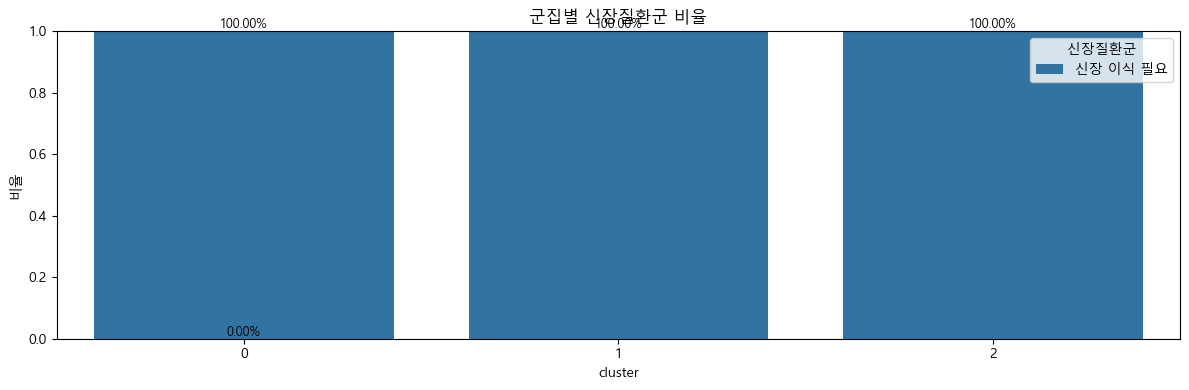

간질환군


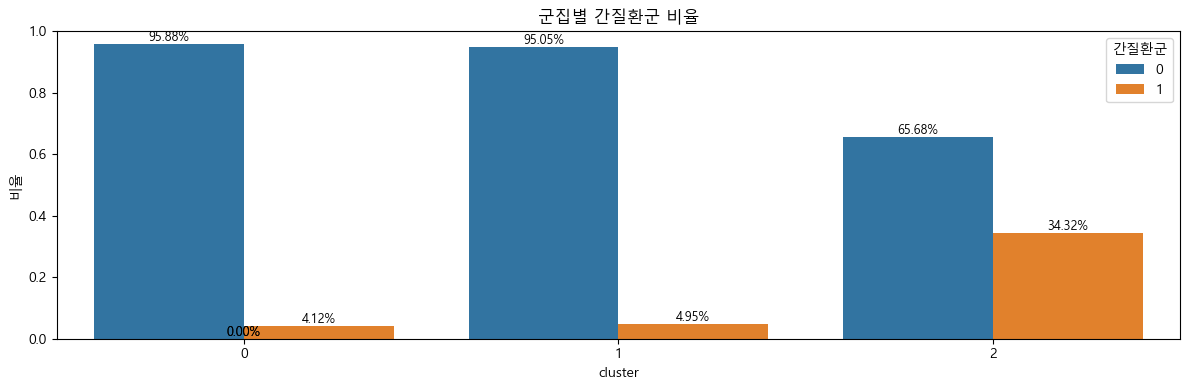

고혈압군


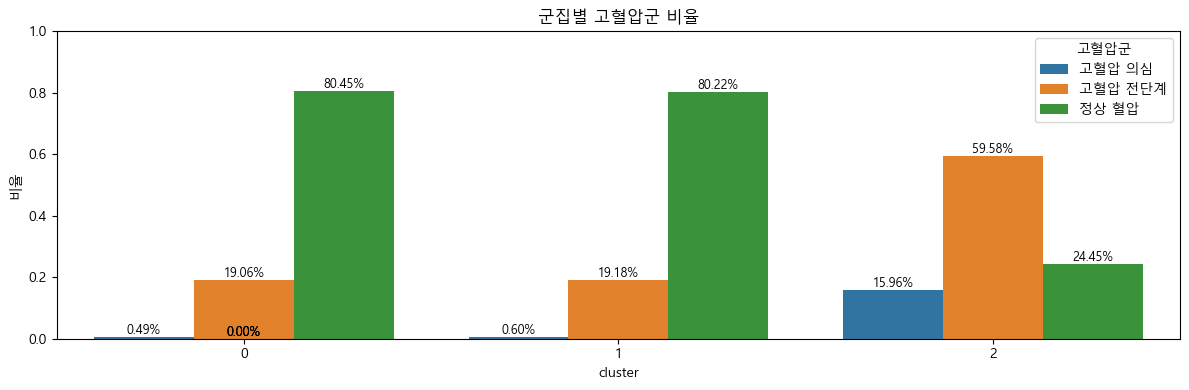

빈혈군


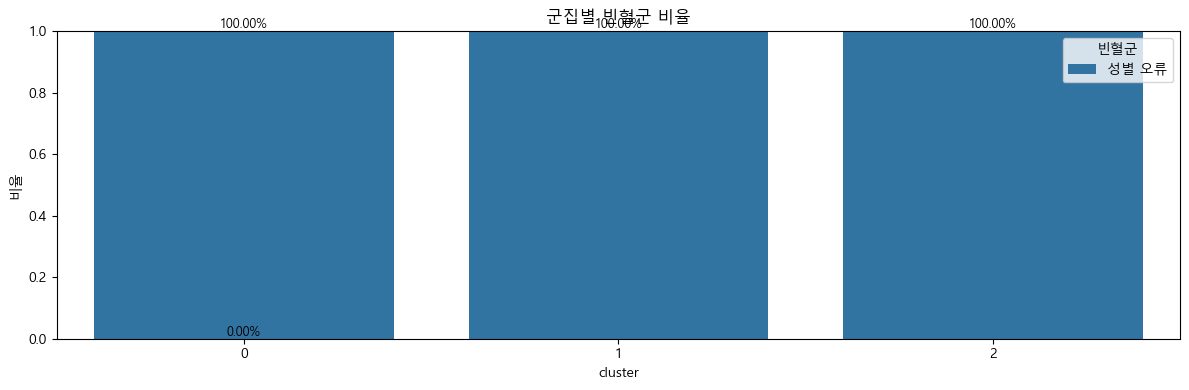

당뇨군


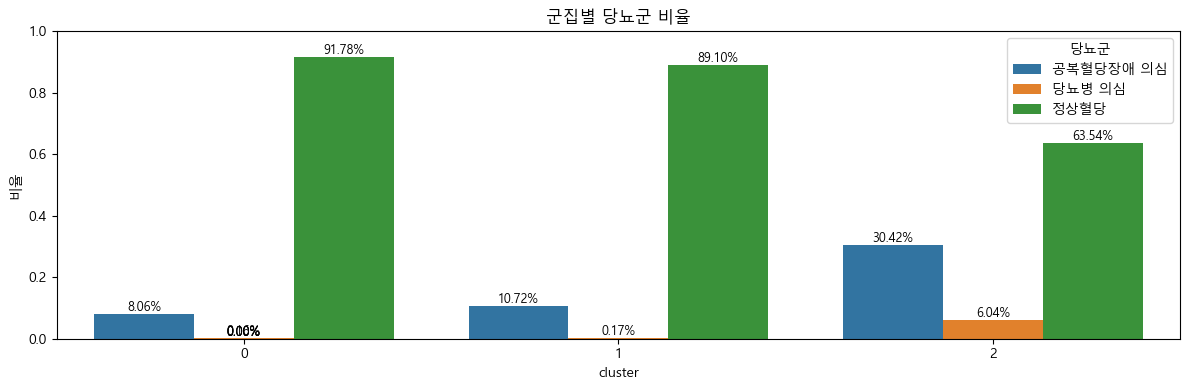

In [39]:
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.family']='Malgun Gothic'

for col in ['신장질환군', '간질환군', '고혈압군', '빈혈군', '당뇨군']:
    print(col)
    
    # 군집별 범주 비율 테이블 생성
    ratio = (
        df1.groupby('cluster')[col]
        .value_counts(normalize=True)
        .rename('비율')
        .reset_index()
    )

    # 시각화
    plt.figure(figsize=(12, 4))
    ax = sns.barplot(data=ratio, x='cluster', y='비율', hue=col)
    plt.title(f'군집별 {col} 비율')
    
    # 막대 위에 비율 표시
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2., height,
                f'{height:.2%}', ha='center', va='bottom', fontsize=9)
    
    plt.legend(title=col)
    plt.ylim(0, 1)  # 비율은 0~1
    plt.tight_layout()
    plt.show()

In [43]:
df2=df2.drop(columns='new_연령대')

In [47]:
pd.DataFrame(df2.groupby('신장질환군')['cluster'].value_counts())

count
신장질환군       cluster       
생명만 유지할 수준  1            5
            2            2
            0            1
신장 이식 필요    1            6
            2            5
            0            4
신장기능 감소 시작  1        16129
            0         5113
            2         4776
신장기능이 더욱 감소 1          173
            2           72
            0           56
정상          0        41899
            1        38096
            2        14970

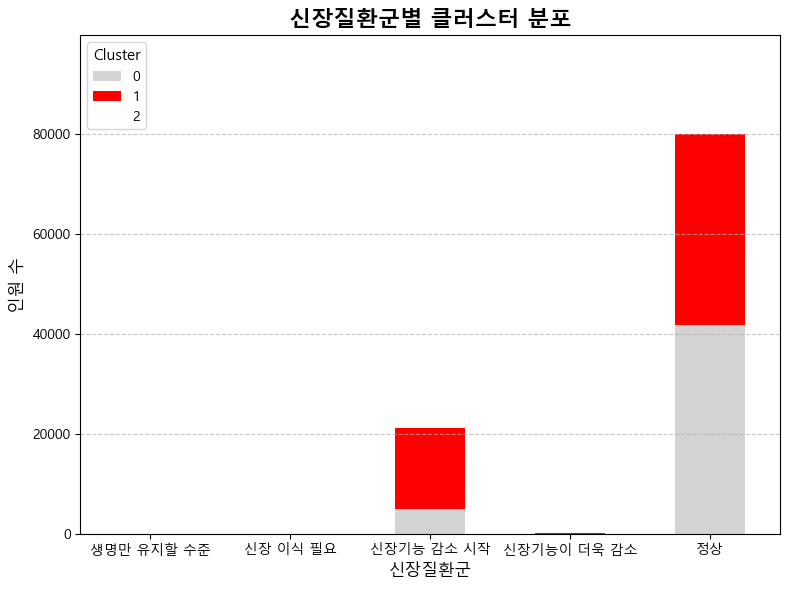

In [55]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd
import seaborn as sns

# 폰트 설정 (Windows용)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# ▶ 집계 및 피벗 변환
pivot = (
    df2.groupby(['신장질환군', 'cluster'])
    .size()
    .unstack(fill_value=0)  # cluster가 column으로 감
)

# ▶ 색상 테마 설정
colors = ['lightgrey']+['red']+ ['white']

# ▶ 시각화
pivot.plot(kind='bar', stacked=True, color=colors, figsize=(8, 6))

# ▶ 스타일 개선
plt.title('신장질환군별 클러스터 분포', fontsize=16, weight='bold')
plt.xlabel('신장질환군', fontsize=12)
plt.ylabel('인원 수', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Cluster', title_fontsize=11, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
